### Social Media Data for DSBA

# Context:


* An aviation company that provides domestic as well as international trips to the customers now wants to apply a targeted approach instead of reaching out to each of the customers.

* This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product.

* Propensity of buying tickets is different for different login devices. Hence, you have to create 2 models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as mobile phone usage.]


# Objective:
* To harness the available data of existing and potential customers and improve marketing expenditure, thus avoiding high costs

* To Predict social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product

# Key Questions:
1. What key variables are important in identifying potential purchasing customers?
2. What are the different characteristics of the Customers who bought the packages ?
3. What's the important performance metric for the model and how can it be improved?

# Dataset Attributes:

## Customer details:



1. UserID: Unique ID of user
2. Buy_ticket: Buy ticket in next month
3. Yearly_avg_view_on_travel_page: Average yearly views on any travel related page by user
4. preferred_device: Through which device user preferred to do login
5. total_likes_on_outstation_checkin_given : Total number of likes given by a user on out of station checkings in last year 
6. yearly_avg_Outstation_checkins : Average number of out of station check-in done by user 
7. member_in_family :Total number of relationship mentioned by user in the account
8. preferred_location_type : Preferred type of the location for travelling of user 
9. Yearly_avg_comment_on_travel_page : Average yearly comments on any travel related page by user
10. total_likes_on_outofstation_checkin_received : Total number of likes received by a user on out of station checkings in last year
11. week_since_last_outstation_checkin : Number of weeks since last out of station check-in update by user
12. following_company_page : Weather the customer is following company page (Yes or No)
13. montly_avg_comment_on_company_page :Average monthly comments on company page by user
14. working_flag : Weather the customer is working or not
15. travelling_network_rating : Does user have close friends who also like travelling. 1 is highs and 4 is lowest
16. Adult_flag: Weather the customer is adult or not
17. Daily_Avg_mins_spend_on_traveling_page: Average time spend on the company page by user on daily basis

                              

 ## Importing Necessary Libraries

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

## Load and Explore the Data

In [2]:
df = pd.read_csv("Social Media Data for DSBA.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 11760 rows and 17 columns.


In [3]:
df.head()

UserID Taken_product  ...  Adult_flag Daily_Avg_mins_spend_on_traveling_page
0  1000001           Yes  ...           0                                      8
1  1000002            No  ...           1                                     10
2  1000003           Yes  ...           0                                      7
3  1000004            No  ...           0                                      8
4  1000005            No  ...           1                                      6

[5 rows x 17 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [5]:
df.isnull().any()

UserID                                          False
Taken_product                                   False
Yearly_avg_view_on_travel_page                   True
preferred_device                                 True
total_likes_on_outstation_checkin_given          True
yearly_avg_Outstation_checkins                   True
member_in_family                                False
preferred_location_type                          True
Yearly_avg_comment_on_travel_page                True
total_likes_on_outofstation_checkin_received    False
week_since_last_outstation_checkin              False
following_company_page                           True
montly_avg_comment_on_company_page              False
working_flag                                    False
travelling_network_rating                       False
Adult_flag                                      False
Daily_Avg_mins_spend_on_traveling_page          False
dtype: bool

In [6]:
df.isna().any()

UserID                                          False
Taken_product                                   False
Yearly_avg_view_on_travel_page                   True
preferred_device                                 True
total_likes_on_outstation_checkin_given          True
yearly_avg_Outstation_checkins                   True
member_in_family                                False
preferred_location_type                          True
Yearly_avg_comment_on_travel_page                True
total_likes_on_outofstation_checkin_received    False
week_since_last_outstation_checkin              False
following_company_page                           True
montly_avg_comment_on_company_page              False
working_flag                                    False
travelling_network_rating                       False
Adult_flag                                      False
Daily_Avg_mins_spend_on_traveling_page          False
dtype: bool

In [7]:
df.isna().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [8]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [9]:
df.describe()

UserID  ...  Daily_Avg_mins_spend_on_traveling_page
count  1.176000e+04  ...                            11760.000000
mean   1.005880e+06  ...                               13.817432
std    3.394964e+03  ...                                9.070657
min    1.000001e+06  ...                                0.000000
25%    1.002941e+06  ...                                8.000000
50%    1.005880e+06  ...                               12.000000
75%    1.008820e+06  ...                               18.000000
max    1.011760e+06  ...                              270.000000

[8 rows x 10 columns]

In [10]:
df['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

## Data Pre-Processing:


## Fixing Datatypes

In [11]:
df.drop(['UserID'],axis=1,inplace=True) #dropping the unwanted columns

In [12]:
cat_cols = ['Taken_product','preferred_device','yearly_avg_Outstation_checkins','member_in_family','preferred_location_type','following_company_page','working_flag']
df[cat_cols] = df[cat_cols].astype('category')

cols = df.select_dtypes(['object']) #selecting all object datatypes and converting to category
for i in cols.columns:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Taken_product                                 11760 non-null  category
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64 
 2   preferred_device                              11707 non-null  category
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64 
 4   yearly_avg_Outstation_checkins                11685 non-null  category
 5   member_in_family                              11760 non-null  category
 6   preferred_location_type                       11729 non-null  category
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64 
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64   
 9   week_since_last_outstation_checkin            1176

* The datatypes have been fixed and the memory reduced.

## Missing Value Treatment:

In [13]:
df.isna().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [14]:
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()
missing_numerical.remove('Yearly_avg_view_on_travel_page')
missing_numerical.remove('total_likes_on_outstation_checkin_given')
missing_numerical.remove('Yearly_avg_comment_on_travel_page')
missing_numerical

['total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [15]:
medianFiller = lambda x: x.fillna(x.median()) #replacing with the Median value of the attributes
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

In [16]:
#we will replace the missing values with median 
df["Yearly_avg_view_on_travel_page"]= df["Yearly_avg_view_on_travel_page"].transform(lambda x: x.fillna(x.median()))
df["total_likes_on_outstation_checkin_given"]= df["total_likes_on_outstation_checkin_given"].transform(lambda x: x.fillna(x.median()))
df["Yearly_avg_comment_on_travel_page"]= df["Yearly_avg_comment_on_travel_page"].transform(lambda x: x.fillna(x.median()))


### Summary of Numerical Columns

In [17]:
df.describe().T

count  ...       max
Yearly_avg_view_on_travel_page                11760.0  ...     464.0
total_likes_on_outstation_checkin_given       11760.0  ...  252430.0
Yearly_avg_comment_on_travel_page             11760.0  ...     815.0
total_likes_on_outofstation_checkin_received  11760.0  ...   20065.0
week_since_last_outstation_checkin            11760.0  ...      11.0
montly_avg_comment_on_company_page            11760.0  ...     500.0
travelling_network_rating                     11760.0  ...       4.0
Adult_flag                                    11760.0  ...       3.0
Daily_Avg_mins_spend_on_traveling_page        11760.0  ...     270.0

[9 rows x 8 columns]

In [18]:
cat_cols =  df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')


No     9864
Yes    1896
Name: Taken_product, dtype: int64
--------------------------------------------------


Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Others                2
Other                 2
Name: preferred_device, dtype: int64
--------------------------------------------------


1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64
--------------------------------------------------


3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dty

**Observations:**

* In the preferred_device column, there are multiple devices that falls in category of Mobile but given separately, and we required only two categories i.e. Laptops and Mobile.
* In the member_in_family column, there is a string value("three") is given, which have to be converted in numerical form.
* Hence we will replace the missing values in the above columns accordingly


In [19]:
#treating missing values in categorical variables

df['preferred_device'] = df['preferred_device'].fillna('Mobile')
df["Yearly_avg_comment_on_travel_page"] = df['Yearly_avg_comment_on_travel_page'].fillna(0)
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].fillna('*')
df['following_company_page'] = df['following_company_page'].fillna('1')
df["preferred_location_type"] = df['preferred_location_type'].fillna('Other')
df['preferred_device'] = np.where((df.preferred_device != 'Laptop'),'Mobile',df.preferred_device)
df['member_in_family']= df.member_in_family = df.member_in_family.replace('Three','3') #treating errors
df['yearly_avg_Outstation_checkins']= df.yearly_avg_Outstation_checkins.replace('*','0') #treating error

In [20]:
df['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [21]:
df['member_in_family'].unique()

['2', '1', '4', '3', '5', '10']
Categories (6, object): ['2', '1', '4', '3', '5', '10']

In [22]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

* All missing values are treated

### Summary of Categorical Variables

In [23]:
df.describe(include="category").T

count unique    top  freq
Taken_product                   11760      2     No  9864
yearly_avg_Outstation_checkins  11760     30      1  4543
member_in_family                11760      6      3  4576
preferred_location_type         11760     15  Beach  2424
following_company_page          11760      4     No  8355
working_flag                    11760      2     No  9952

**Observations:**
* Taken_product : There is heavy imnbalance in this column where atleast 83% of customers did not purchase any product
* yearly_avg_Outstation_checkins : there is atleast 1 outstation checkin happens
* member_in_family : Most customers have atleast 3 family members.
* preferred_location_type : Most customers prefer Beaches to travel.
* following_company_page : There is also heavy imnbalance in this column where atleast 83% of customers did not follow the company page.
* working_flag: Most customers are not working.


## Exploratory Data Analysis:

### Univariate Analysis - Numerical Columns:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f663914cb90>,
      dtype=object)

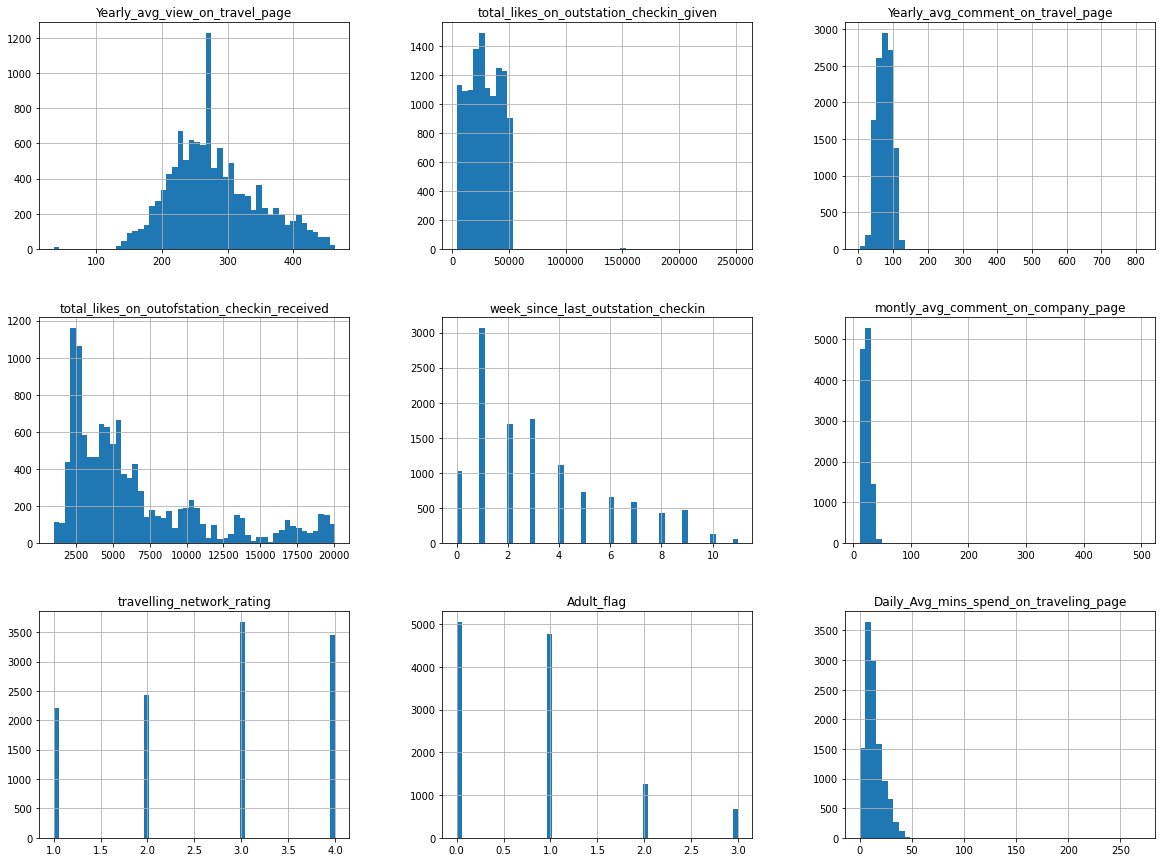

In [24]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
df.hist(bins=50, figsize=(20,15))

**Observations:**

* Yearly_avg_view_on_travel_page is slightly right-skewed. We also see few outliers from 0 to 40. 
* total_likes_on_outstation_checkin_given is left-skewed with few outliers at 150000. 
* Yearly_avg_comment_on_travel_page is heavly right-skwed.
* total_likes_on_outofstation_checkin_received is also right-skewed. However, we see that the majority of likes are between 2000 to 3000.
* montly_avg_comment_on_company_page is left skewed.
* Daily_Avg_mins_spend_on_traveling_page is left skewed.

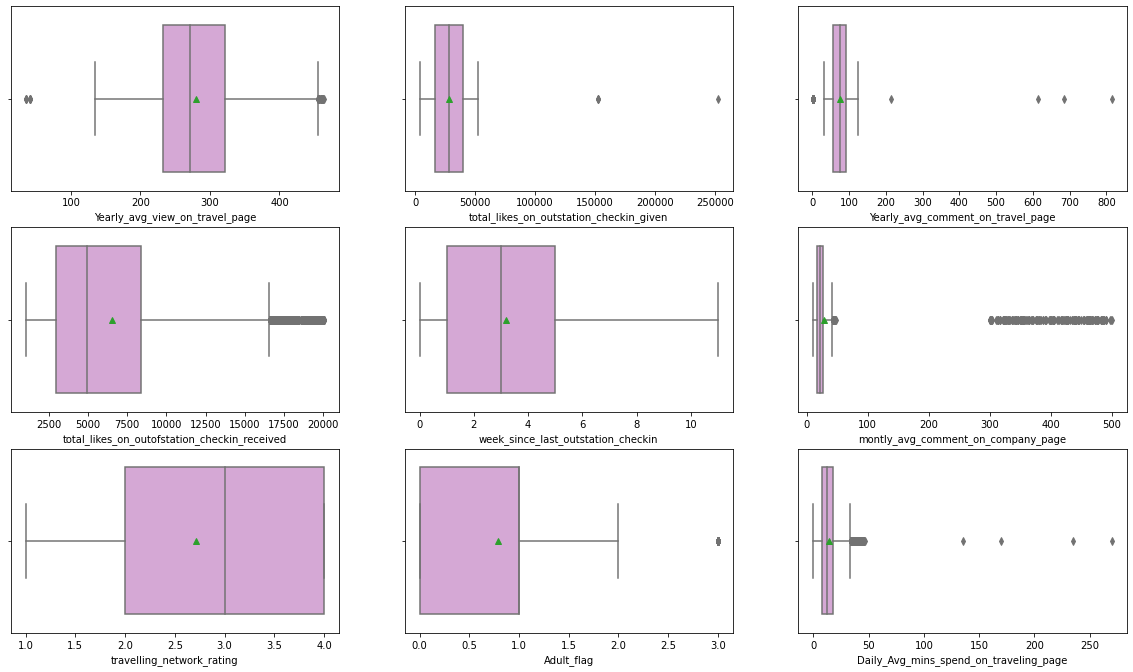

In [25]:
#distribution shown in boxplot
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,40))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color="plum")

plt.show()

### Univariate Analysis - Categorical Columns:

In [26]:
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()

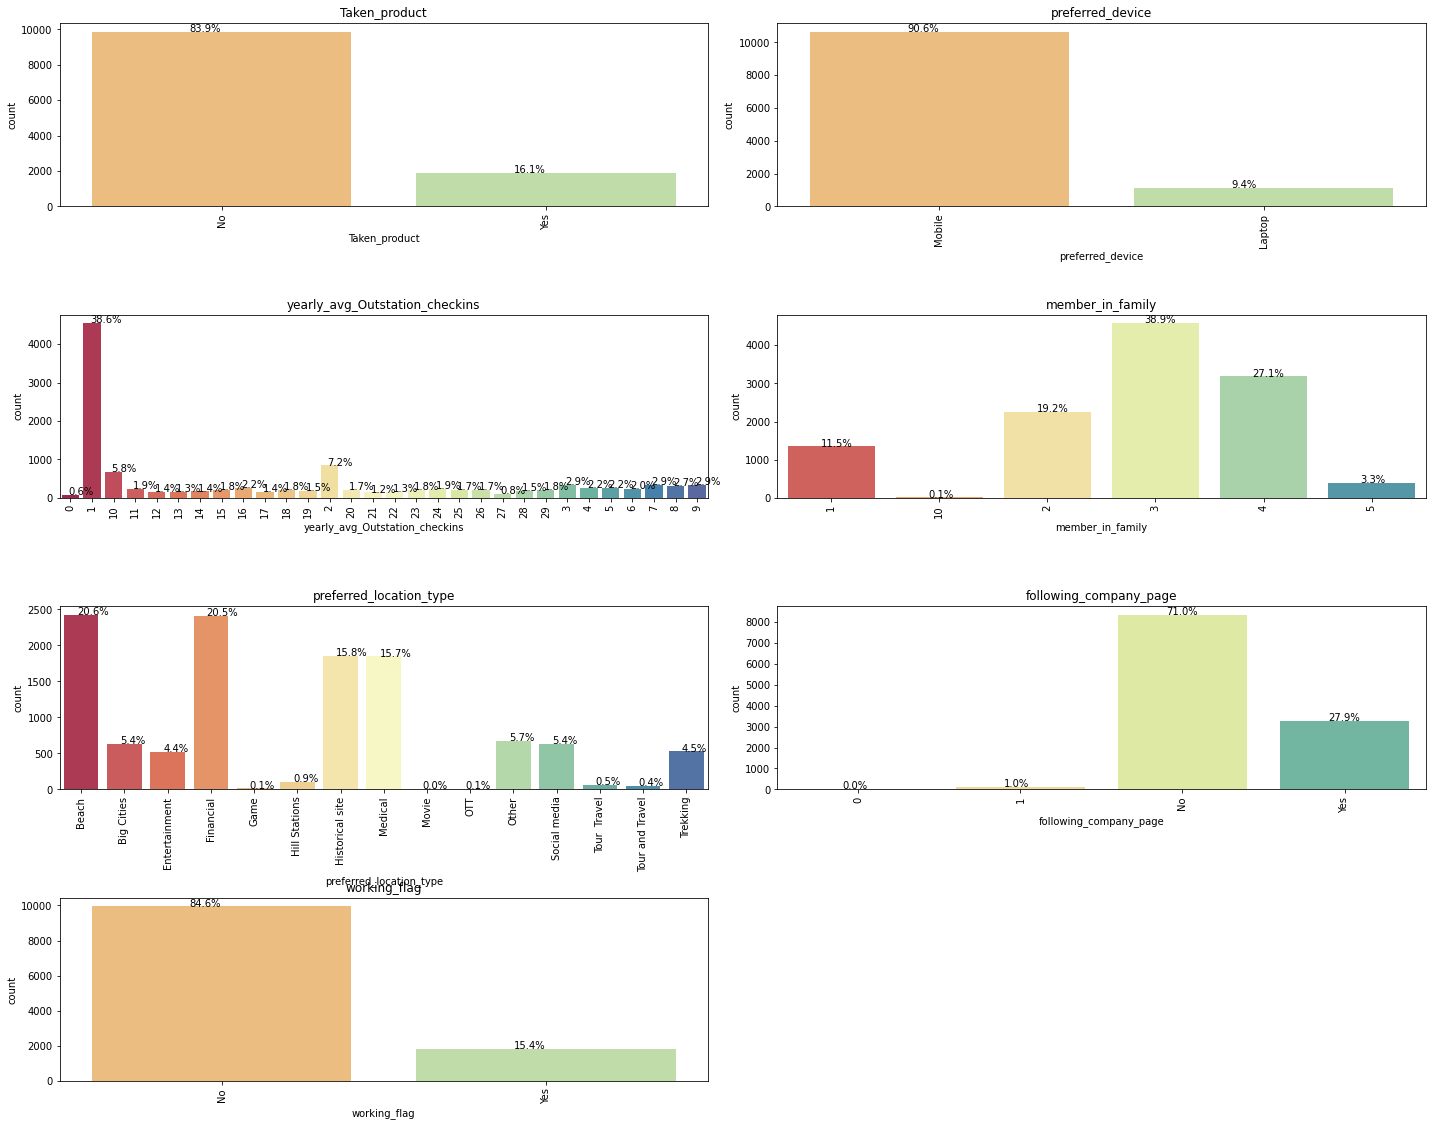

In [27]:
plt.figure(figsize=(20,80))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(20,2,i+1)
    ax=sns.countplot(df[categorical_val[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(categorical_val[i])
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 10,color='black') # To annonate
        plt.xticks(rotation=90)
plt.show()

**Observations:**
* Taken_product is the dependent variable. We that only 16.1% of the total customers purchased any of the travel package.The plot shows heavy imbalance in the dataset

* Mobile is the most preffered device by the customers at 90.6%. The plot shows heavy imbalance in the dataset

* 38.9% of customers registered 3 family members and family of 4 is in second place with 27.1%. 

* 84.6% of customers are not Working. 15.5% of customers are working.

* Beach(20.6%) is the most prefered location by the customers and Financial(20.5%) reason is the most prefered reason for taking the product by the customers.

* Only 27.9% of customers following the company page.


## Correlation Matrix

In [28]:
corr_matrix = df.corr()
corr_matrix

Yearly_avg_view_on_travel_page  ...  Daily_Avg_mins_spend_on_traveling_page
Yearly_avg_view_on_travel_page                                      1.000000  ...                                0.580170
total_likes_on_outstation_checkin_given                             0.010511  ...                                0.008914
Yearly_avg_comment_on_travel_page                                   0.041777  ...                                0.059993
total_likes_on_outofstation_checkin_received                        0.484846  ...                                0.673410
week_since_last_outstation_checkin                                  0.278970  ...                                0.249776
montly_avg_comment_on_company_page                                 -0.009498  ...                                0.054308
travelling_network_rating                                           0.056211  ...                                0.019657
Adult_flag                                                          0.036837  ...                                0.007775
Daily_Avg_mins_spend_on_traveling_page                              0.580170  ...                                1.000000

[9 rows x 9 columns]

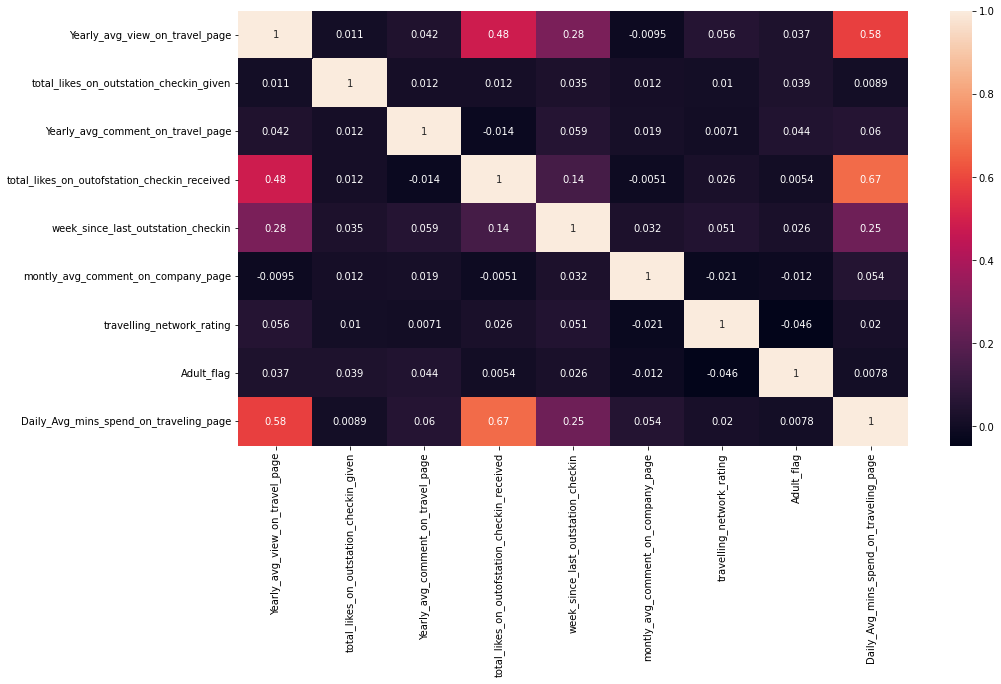

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)



## Bivariate Analysis:
* Let's analyse the dependent variable with all the numerical and categorical features and investigate possible relationships

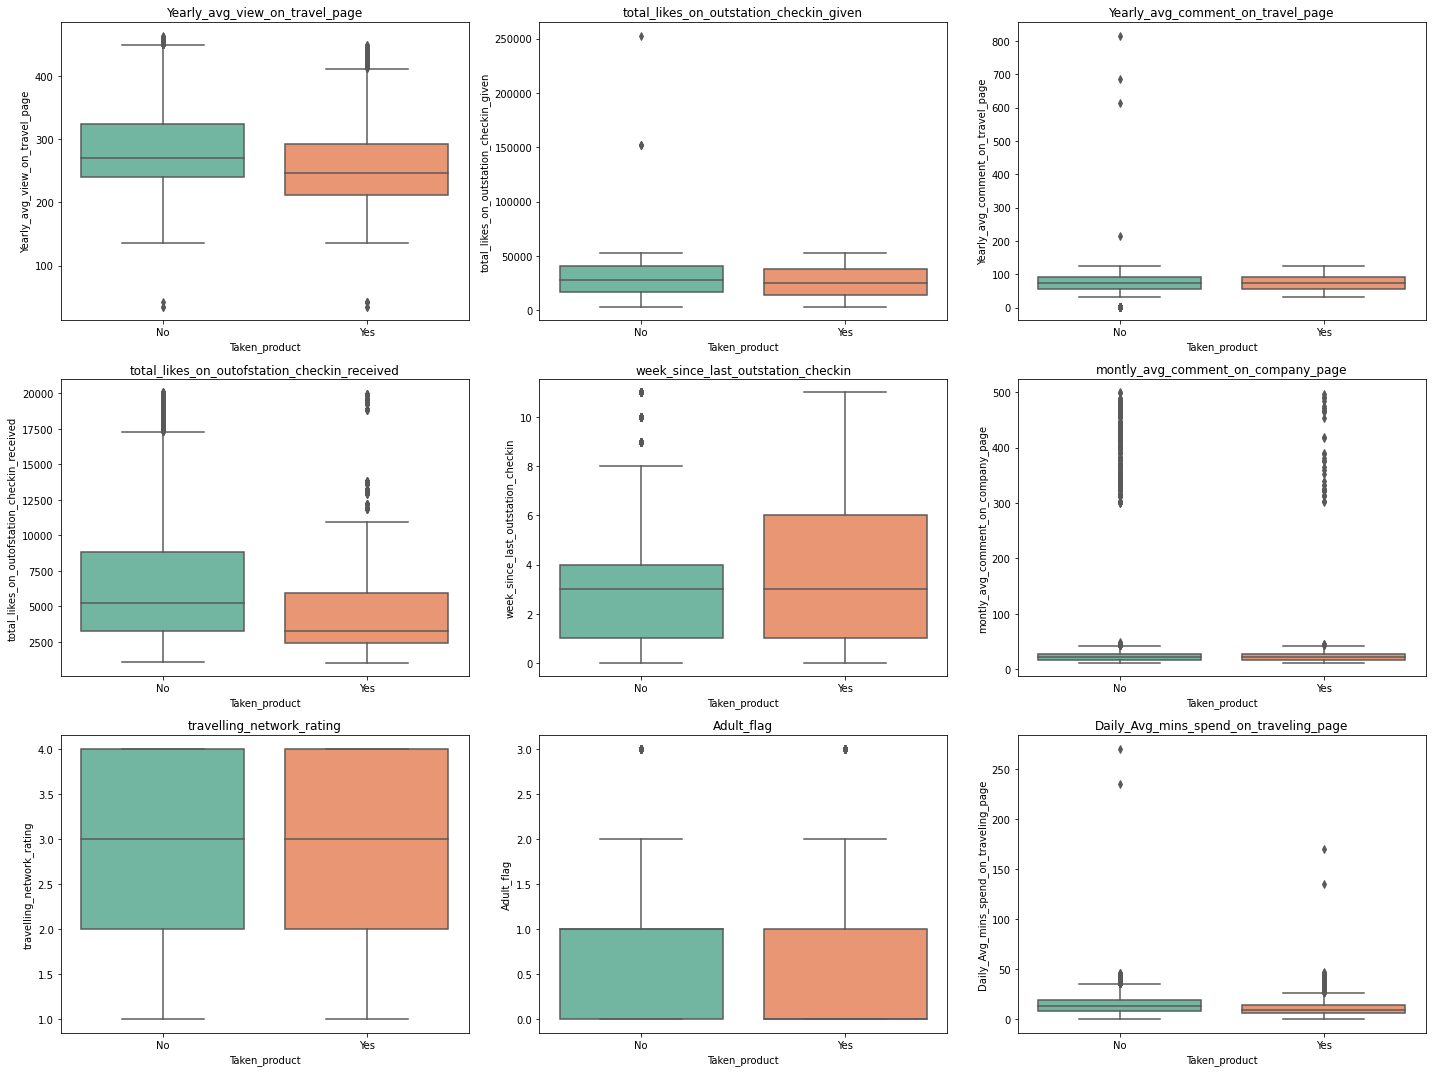

In [30]:
#For all numerical value with Taken_product
plt.figure(figsize=(20,15))
for i, variable in enumerate(Uni_num):
                     plt.subplot(3,3,i+1)
                     sns.boxplot(df['Taken_product'],df[variable],palette="Set2")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [31]:
#Stacked plot of categorical variables with Taken_product
def stacked_plot(x):
    sns.set(palette='Set2')
    tab1 = pd.crosstab(x,df['Taken_product'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Taken_product'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

In [32]:
#Grouped plot of categorical variables with Taken_product
def grouped_plot(x):
    sns.set(palette='Dark2')
    tab1 = pd.crosstab(x,df['Taken_product'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Taken_product'],normalize='index')
    tab.plot(kind='bar',stacked=False,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

In [33]:
#Stacked plot of categorical variables with preferred_device
def device_stacked_plot(x):
    sns.set(palette='Set2')
    tab1 = pd.crosstab(x,df['preferred_device'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['preferred_device'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

Taken_product       No   Yes    All
member_in_family                   
1                 1102   247   1349
10                  10     1     11
2                 1904   352   2256
3                 3784   792   4576
4                 2720   464   3184
5                  344    40    384
All               9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


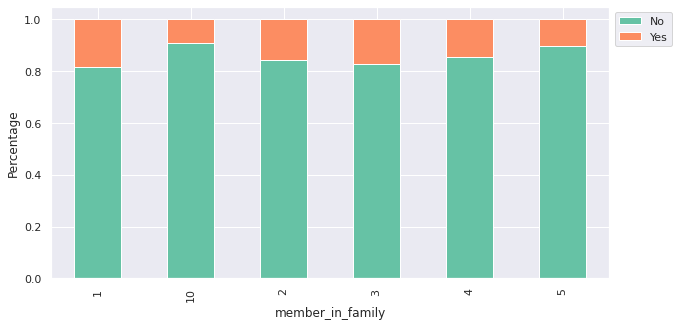

In [34]:
stacked_plot(df.member_in_family)

preferred_device           Laptop  Mobile    All
travelling_network_rating                       
1                             200    2008   2208
2                             196    2228   2424
3                             364    3308   3672
4                             348    3108   3456
All                          1108   10652  11760
------------------------------------------------------------------------------------------------------------------------


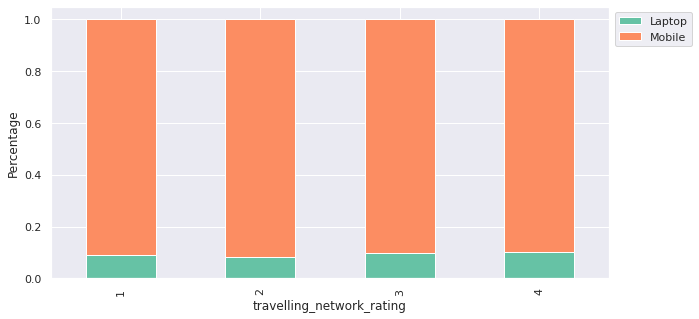

In [35]:
device_stacked_plot(df.travelling_network_rating)

Taken_product       No   Yes    All
preferred_device                   
Laptop             832   276   1108
Mobile            9032  1620  10652
All               9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


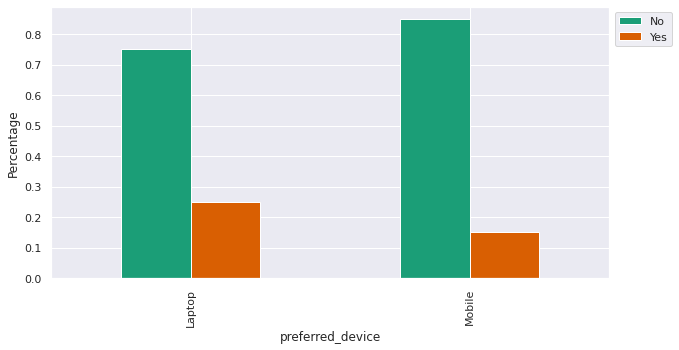

In [36]:
grouped_plot(df.preferred_device)

Taken_product    No   Yes    All
working_flag                    
No             8352  1600   9952
Yes            1512   296   1808
All            9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


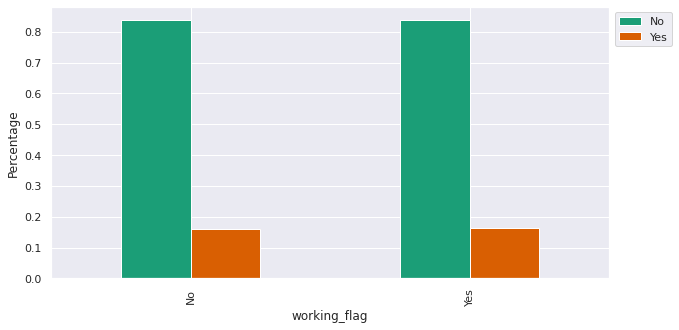

In [37]:
grouped_plot(df.working_flag)

Taken_product              No   Yes    All
preferred_location_type                   
Beach                    2068   356   2424
Big Cities                496   140    636
Entertainment             393   123    516
Financial                2055   354   2409
Game                       11     1     12
Hill Stations              80    28    108
Historical site          1604   252   1856
Medical                  1593   252   1845
Movie                       4     1      5
OTT                         3     4      7
Other                     584    90    674
Social media              494   139    633
Tour  Travel               46    14     60
Tour and Travel            33    14     47
Trekking                  400   128    528
All                      9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


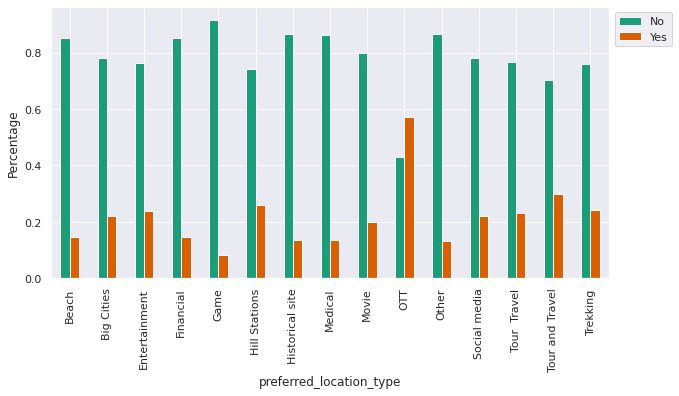

In [38]:
grouped_plot(df.preferred_location_type)

Taken_product                No   Yes    All
travelling_network_rating                   
1                          1752   456   2208
2                          2064   360   2424
3                          3104   568   3672
4                          2944   512   3456
All                        9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


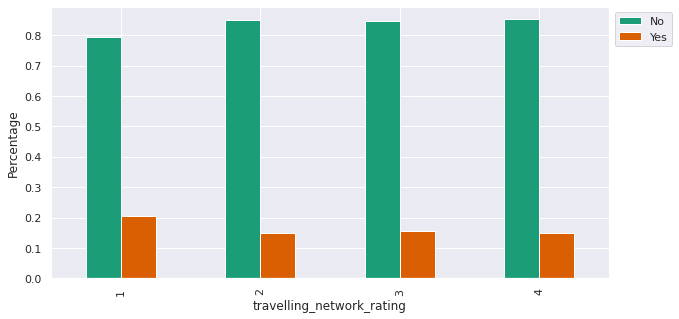

In [39]:
grouped_plot(df.travelling_network_rating)

## Outliers Detection : 

In [40]:
#Let's find the percentage of outliers using IQR

In [41]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [42]:
outlier_num = df.select_dtypes(include=np.number)

In [43]:
outlier_out = ((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100
outlier_out

Yearly_avg_view_on_travel_page                  0.246599
total_likes_on_outstation_checkin_given         0.034014
Yearly_avg_comment_on_travel_page               0.340136
total_likes_on_outofstation_checkin_received    7.789116
week_since_last_outstation_checkin              0.000000
montly_avg_comment_on_company_page              2.057823
travelling_network_rating                       0.000000
Adult_flag                                      5.782313
Daily_Avg_mins_spend_on_traveling_page          2.976190
dtype: float64

* total_likes_on_outofstation_checkin_received, Adult_flag, Daily_Avg_mins_spend_on_traveling_page, and montly_avg_comment_on_company_page have high outliers compared to the other features.

* However, we will not be treating outliers, as we will be building Decision Tree based models and Decision Tree models are not influenced by Outliers.
* Furthermore, in real case scenario, we will encounter similar outliers and that would require the model to investigate if there is any pattern among the customers

### Encoding of columns.

Encoding of target variable.

In [44]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
print("Before encoding:", df['Taken_product'].unique())
# Encode labels in column 'Taken_product'.
df['Taken_product']= label_encoder.fit_transform(df['Taken_product'])
 
print("After encoding:", df['Taken_product'].unique())

Before encoding: ['Yes', 'No']
Categories (2, object): ['Yes', 'No']
After encoding: [1 0]


Encoding 'following_company_page'

In [45]:
print("Before encoding:", df['following_company_page'].unique())
# Encode labels in column 'following_company_page'.
df['following_company_page']= label_encoder.fit_transform(df['following_company_page'])
 
print("After encoding:", df['following_company_page'].unique())

Before encoding: ['Yes', 'No', '1', '0']
Categories (4, object): ['Yes', 'No', '1', '0']
After encoding: [3 2 1 0]


Encoding 'working_flag'

In [46]:
print("Before encoding:", df['working_flag'].unique())
# Encode labels in column 'following_company_page'.
df['working_flag']= label_encoder.fit_transform(df['working_flag'])
 
print("After encoding:", df['working_flag'].unique())

Before encoding: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
After encoding: [0 1]


Encoding 'preferred_location_type'

In [47]:
print("Before encoding:", df['preferred_location_type'].unique())
# Encode labels in column 'following_company_page'.
df['preferred_location_type']= label_encoder.fit_transform(df['preferred_location_type'])
 
print("After encoding:", df['preferred_location_type'].unique())

Before encoding: ['Financial', 'Other', 'Medical', 'Game', 'Social media', ..., 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 15
Categories (15, object): ['Financial', 'Other', 'Medical', 'Game', ..., 'Historical site',
                          'Big Cities', 'Trekking', 'Hill Stations']
After encoding: [ 3 10  7  4 11  2 13  8  9 12  0  6  1 14  5]


In [48]:
df.head()

Taken_product  ...  Daily_Avg_mins_spend_on_traveling_page
0              1  ...                                       8
1              0  ...                                      10
2              1  ...                                       7
3              0  ...                                       8
4              0  ...                                       6

[5 rows x 16 columns]

### Dividing the dataset for Mobile and Laptop.

In [49]:
df['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [50]:
df_mobile = df.loc[df['preferred_device'] == 'Mobile']
df_laptop = df.loc[df['preferred_device'] == 'Laptop']
df_mobile['preferred_device'].unique()

array(['Mobile'], dtype=object)

In [51]:
df_laptop['preferred_device'].unique()

array(['Laptop'], dtype=object)

We can see that we have successfully divided the dataset.

#### Correlation Matrix for Mobile.

In [52]:
df_mobile.corr()

Taken_product  ...  Daily_Avg_mins_spend_on_traveling_page
Taken_product                                      1.000000  ...                               -0.131623
Yearly_avg_view_on_travel_page                    -0.140315  ...                                0.574668
total_likes_on_outstation_checkin_given           -0.043430  ...                                0.007456
preferred_location_type                            0.032725  ...                                0.002321
Yearly_avg_comment_on_travel_page                 -0.013821  ...                                0.056731
total_likes_on_outofstation_checkin_received      -0.148513  ...                                0.671947
week_since_last_outstation_checkin                 0.046916  ...                                0.245339
following_company_page                             0.229510  ...                                0.013909
montly_avg_comment_on_company_page                 0.002119  ...                                0.054090
working_flag                                       0.003648  ...                               -0.002194
travelling_network_rating                         -0.038472  ...                                0.021280
Adult_flag                                        -0.135546  ...                                0.007021
Daily_Avg_mins_spend_on_traveling_page            -0.131623  ...                                1.000000

[13 rows x 13 columns]

#### Correlation Matrix for Laptop.

In [53]:
df_laptop.corr()

Taken_product  ...  Daily_Avg_mins_spend_on_traveling_page
Taken_product                                      1.000000  ...                               -0.252032
Yearly_avg_view_on_travel_page                    -0.242961  ...                                0.644598
total_likes_on_outstation_checkin_given           -0.142125  ...                                0.024919
preferred_location_type                            0.039108  ...                               -0.060384
Yearly_avg_comment_on_travel_page                  0.041578  ...                                0.104176
total_likes_on_outofstation_checkin_received      -0.252337  ...                                0.691151
week_since_last_outstation_checkin                 0.047308  ...                                0.299628
following_company_page                             0.262993  ...                                0.005699
montly_avg_comment_on_company_page                -0.014207  ...                                0.210328
working_flag                                      -0.010284  ...                                0.064760
travelling_network_rating                         -0.120412  ...                                0.003806
Adult_flag                                        -0.149352  ...                                0.015315
Daily_Avg_mins_spend_on_traveling_page            -0.252032  ...                                1.000000

[13 rows x 13 columns]

# Train and Splits 80:20 ratio

## Model training for mobile.

Dropping columns/features that have very low correlation with the target variables.

In [54]:
df_mobile.drop(['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
         'total_likes_on_outofstation_checkin_received','Yearly_avg_comment_on_travel_page', 'montly_avg_comment_on_company_page',
        'working_flag', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page'],
               inplace=True, axis='columns')

In [55]:
df_mobile.drop(['preferred_device'],inplace=True, axis='columns')

In [56]:
df_mobile.shape

(10652, 6)

#### Train & Test splits.

In [57]:
from sklearn.model_selection import train_test_split

train_mobile, test_mobile = train_test_split(df_mobile, test_size=0.2)

In [58]:
train_mobile.shape

(8521, 6)

In [59]:
test_mobile.shape

(2131, 6)

In [60]:
X_train_mobile = train_mobile.drop(['Taken_product'], axis='columns')
y_train_mobile = train_mobile['Taken_product']
y_train_mobile.head()

6074     0
8160     0
1433     0
10309    0
9818     0
Name: Taken_product, dtype: int64

In [61]:
X_test_mobile = test_mobile.drop(['Taken_product'], axis='columns')
y_test_mobile = test_mobile['Taken_product']
y_test_mobile.head()

1657    0
7296    0
7990    0
5791    0
5969    1
Name: Taken_product, dtype: int64

## **Model Building:**
### **Model Evaluation Criterion**
**Model can make two kinds of wrong predictions:**
1. Predicting that the customer will purchase a Travel Package when they dont. - False Positive
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative

**Metric for Optimization:**
* For the above objective, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized.
* The greater the F1-Score, greater the chances of predicting both classes correctly.


### **Creating a Confusion Matrix**

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    sns.set(font_scale=2.0) # to set font size for the matrix
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
def scores(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)
    
    y_pred_train = model.predict(X_train_mobile)
    y_pred_test = model.predict(X_test_mobile)
    
    train_acc = metrics.accuracy_score(y_train_mobile,y_pred_train)
    test_acc = metrics.accuracy_score(y_test_mobile,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train_mobile,y_pred_train)
    test_f1 = metrics.f1_score(y_test_mobile,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train_mobile,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test_mobile,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train_mobile,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test_mobile,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train_mobile,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test_mobile,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train_mobile,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test_mobile,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False

In [64]:
def scores_l(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)

    y_pred_train = model.predict(X_train_laptop)
    y_pred_test = model.predict(X_test_laptop)
    
    train_acc = metrics.accuracy_score(y_train_laptop,y_pred_train)
    test_acc = metrics.accuracy_score(y_test_laptop,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train_laptop,y_pred_train)
    test_f1 = metrics.f1_score(y_test_laptop,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train_laptop,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test_laptop,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train_laptop,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test_laptop,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train_laptop,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test_laptop,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train_laptop,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test_laptop,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False

### **Building the Model:**
* We will start with a Decision Tree model
* Next, we will build two ensemble model - Random Forest Classifier and Bagging Classifier
* Then, we will build one Boosting ensemble models - XG Boost,ADABoost and GradientBoost
* Then, we will build one statistical model - Logistic Regression and Linear discriminant analysis
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [65]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

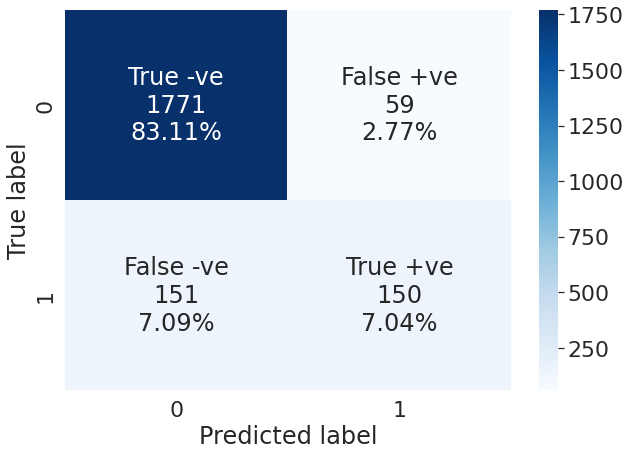

In [66]:
Dt.fit(X_train_mobile, y_train_mobile) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile, y_predict)

In [67]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict)
auc_roc

0.7330492166367119

In [68]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7330492166367119

Text(0.5, 0, 'False Positive Rate')

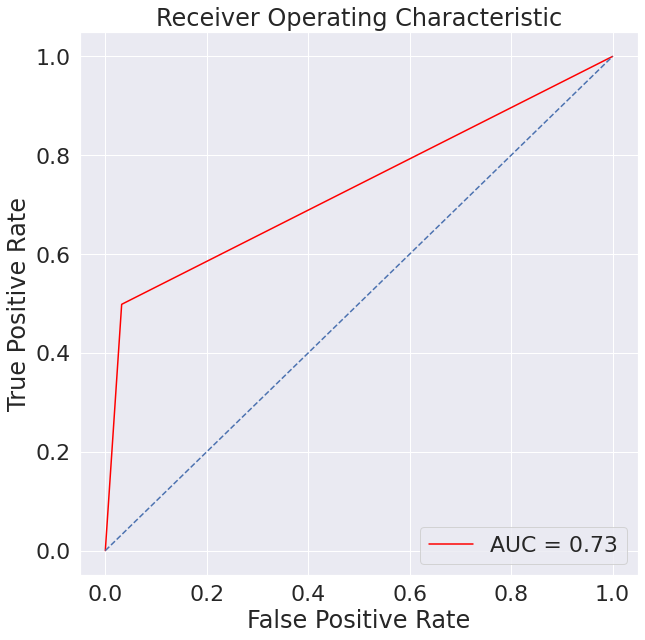

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [70]:
scores(Dt)

Accuracy on training set :  0.9386222274380941
Accuracy on test set :  0.9014547160957297

Recall on training set :  0.6542835481425322
Recall on test set :  0.4983388704318937

Precision on training set :  0.9279569892473118
Precision on test set :  0.7177033492822966

F1 on training set :  0.7674522009782125
F1 on test set :  0.5882352941176471


### **Random Forest Classifier**

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_mobile,y_train_mobile)


RandomForestClassifier(random_state=25)

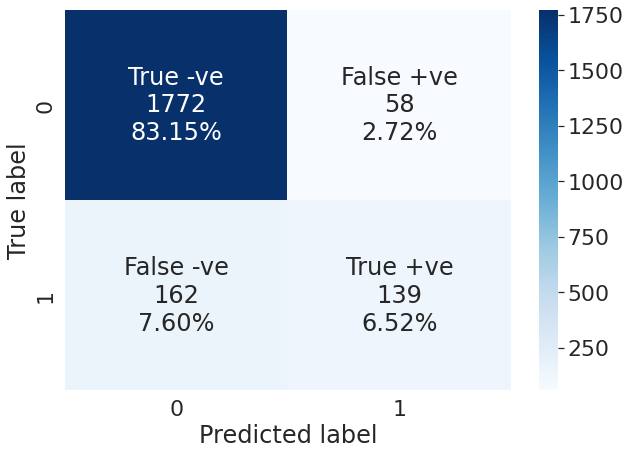

In [73]:
y_predict = random_forest.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [74]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7150500154312582

In [75]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7150500154312582

Text(0.5, 0, 'False Positive Rate')

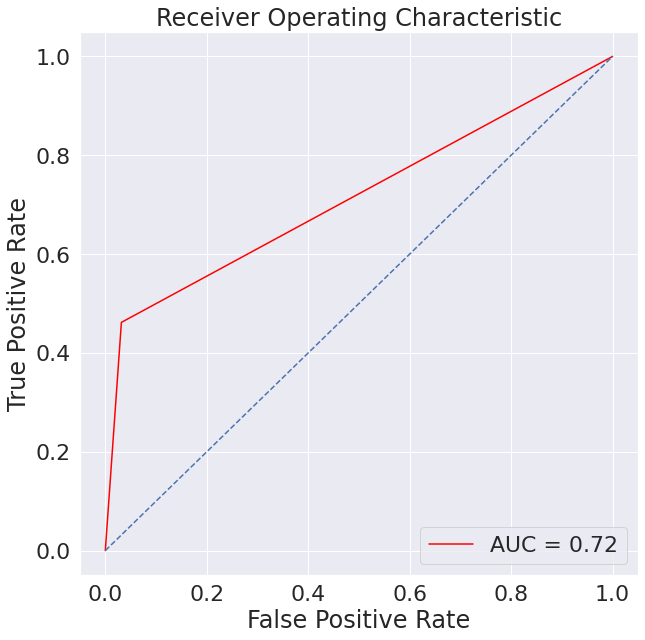

In [76]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [77]:
scores(random_forest)

Accuracy on training set :  0.9386222274380941
Accuracy on test set :  0.8967620835288597

Recall on training set :  0.6755117513267627
Recall on test set :  0.46179401993355484

Precision on training set :  0.9036511156186613
Precision on test set :  0.7055837563451777

F1 on training set :  0.7731019522776572
F1 on test set :  0.5582329317269076


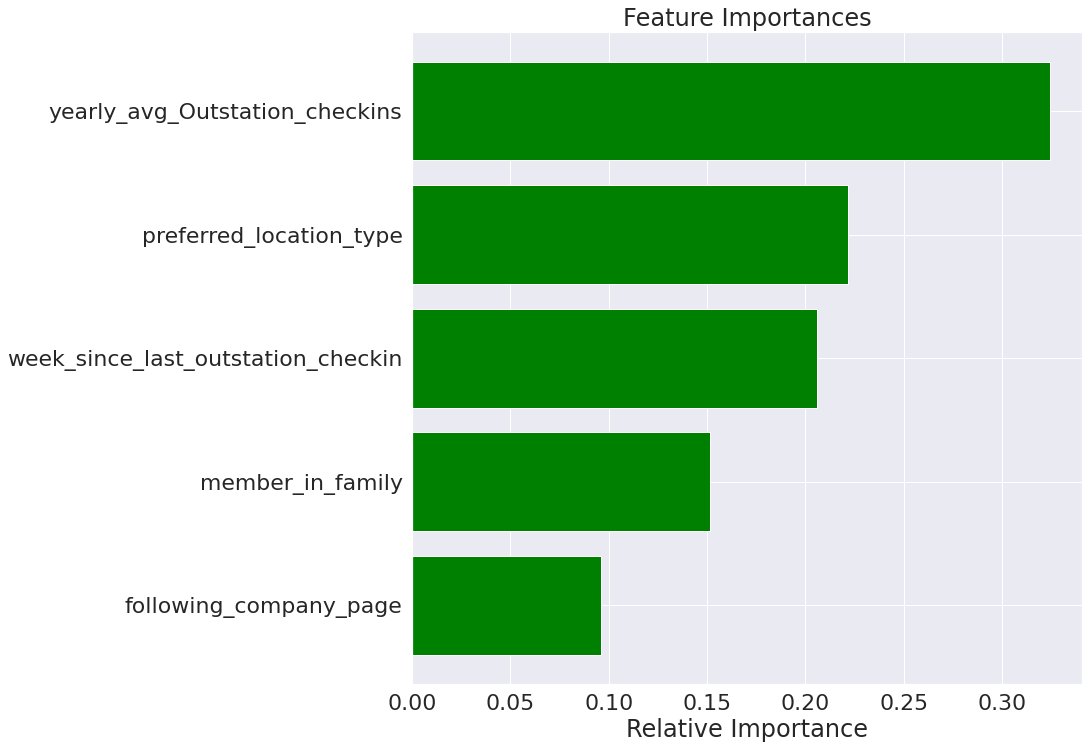

In [78]:
feature_names = X_train_mobile.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [79]:
scores(random_forest) #peformance scores for Random Forest

Accuracy on training set :  0.9386222274380941
Accuracy on test set :  0.8967620835288597

Recall on training set :  0.6755117513267627
Recall on test set :  0.46179401993355484

Precision on training set :  0.9036511156186613
Precision on test set :  0.7055837563451777

F1 on training set :  0.7731019522776572
F1 on test set :  0.5582329317269076




**Random Forest Classifier with weights**

In [80]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_mobile,y_train_mobile)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

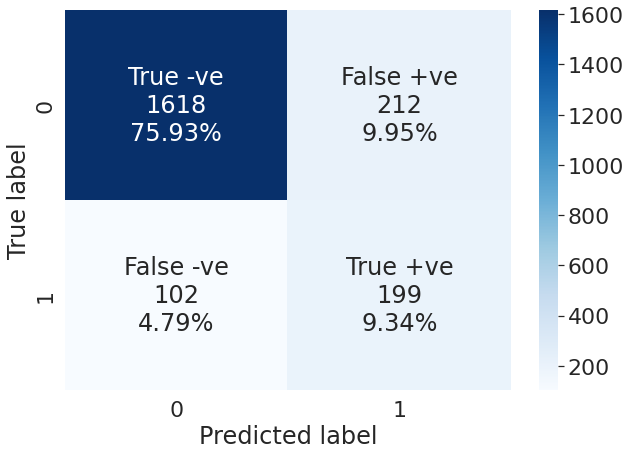

In [81]:
y_predict = random_forest_wt.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [82]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7726412867853966

In [83]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7726412867853966

Text(0.5, 0, 'False Positive Rate')

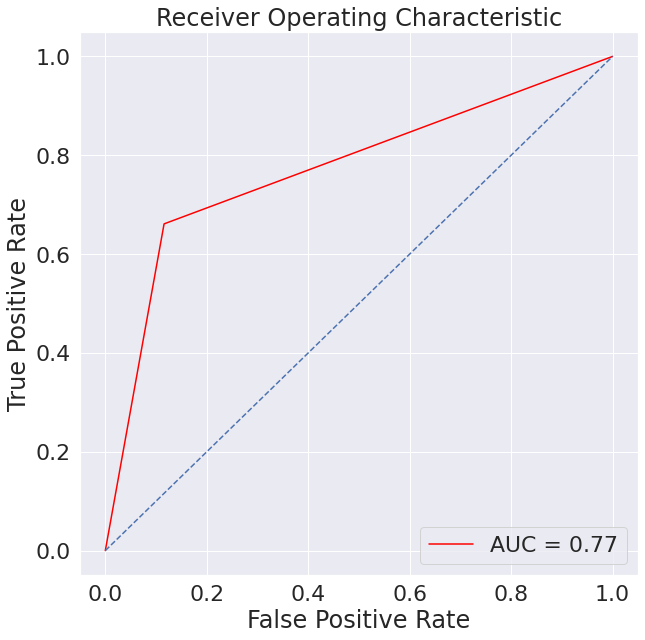

In [84]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [85]:
scores(random_forest_wt)

Accuracy on training set :  0.9011853068888628
Accuracy on test set :  0.8526513374002815

Recall on training set :  0.8999241849886277
Recall on test set :  0.6611295681063123

Precision on training set :  0.6257248286768582
Precision on test set :  0.48418491484184917

F1 on training set :  0.7381840796019901
F1 on test set :  0.5589887640449439


* There is no improvement in the metrics for the weighted Random Forest classifier.


### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_mobile, y_train_mobile)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=5, min_samples_leaf=2,
                       random_state=25)

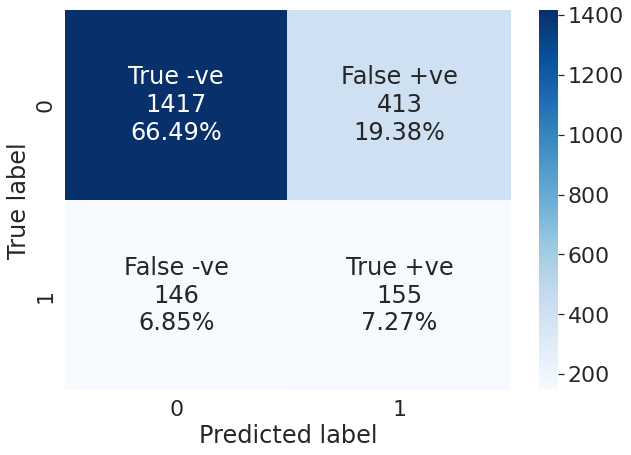

In [88]:
y_predict = classifier.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile,y_predict) 


In [89]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6446335530018337

In [90]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6446335530018337

Text(0.5, 0, 'False Positive Rate')

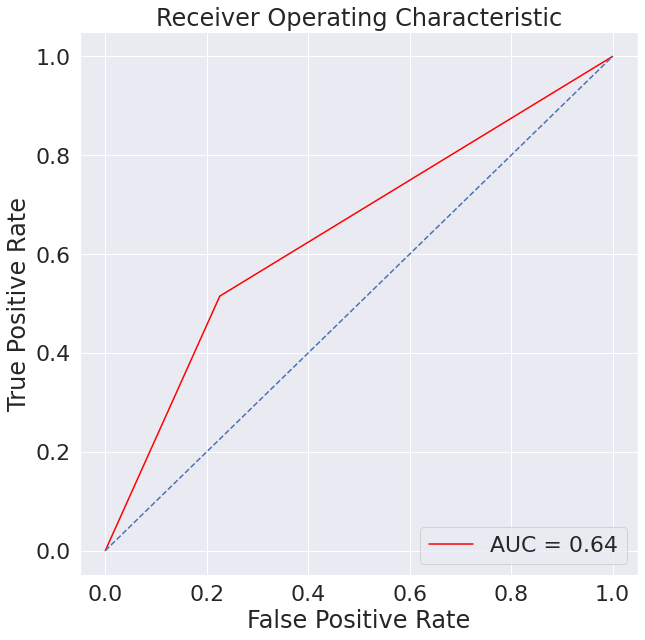

In [91]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [92]:
scores(classifier)

Accuracy on training set :  0.7398192700387278
Accuracy on test set :  0.7376818395119662

Recall on training set :  0.533737680060652
Recall on test set :  0.5149501661129569

Precision on training set :  0.30529054640069386
Precision on test set :  0.272887323943662

F1 on training set :  0.3884137931034483
F1 on test set :  0.3567318757192175


* The F1Score has decreased to 0.38 for Train set and 0.36 for test set. 


In [93]:
X_train_mobile['yearly_avg_Outstation_checkins'] = X_train_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_train_mobile['member_in_family'] = X_train_mobile['member_in_family'].astype('int')
X_test_mobile['yearly_avg_Outstation_checkins'] = X_test_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_test_mobile['member_in_family'] = X_test_mobile['member_in_family'].astype('int')

## Boosting Model:


**XGBoost Classifier**

In [94]:
from xgboost import XGBClassifier

In [95]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_mobile,y_train_mobile)

XGBClassifier(eval_metric='logloss', random_state=25)

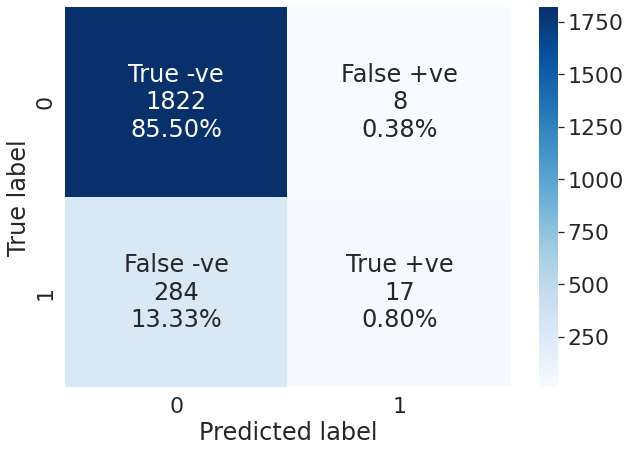

In [96]:
y_predict = XG_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [97]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5260534103080806

In [98]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5260534103080806

Text(0.5, 0, 'False Positive Rate')

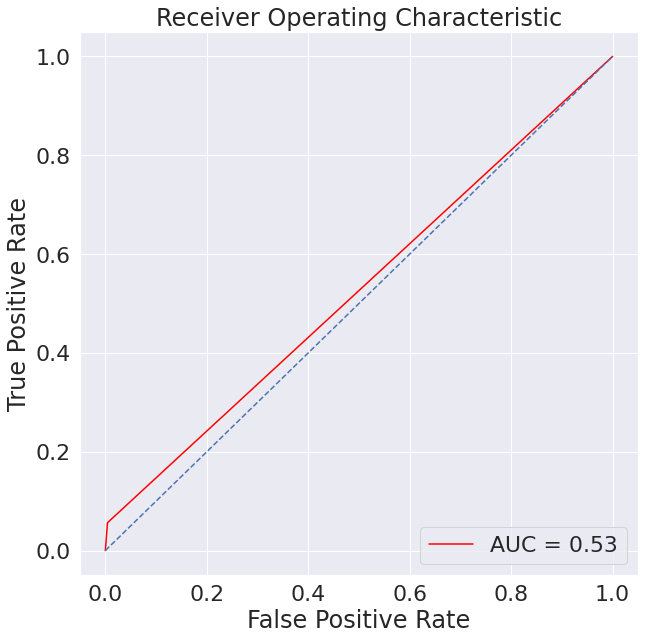

In [99]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [100]:
scores(XG_boost)

Accuracy on training set :  0.8595235301021007
Accuracy on test set :  0.8629751290473956

Recall on training set :  0.11675511751326763
Recall on test set :  0.05647840531561462

Precision on training set :  0.8279569892473119
Precision on test set :  0.68

F1 on training set :  0.2046511627906977
F1 on test set :  0.10429447852760736





### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [101]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_mobile, y_train_mobile)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', learning_rate=0.55, n_estimators=50,
              random_state=25, subsample=0.8)

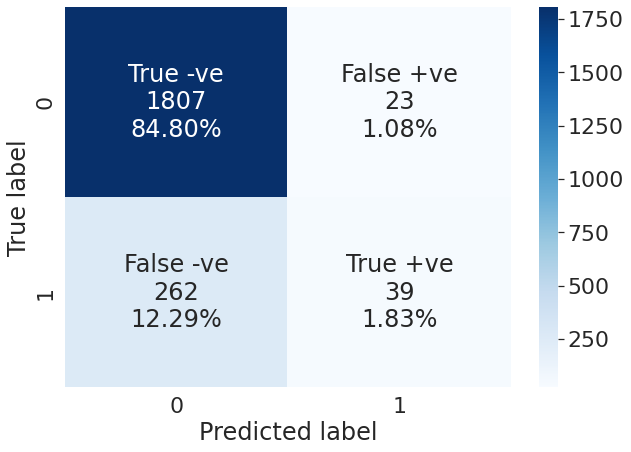

In [102]:
y_predict = xgb_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)


In [103]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5584999001506817

In [104]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5584999001506817

Text(0.5, 0, 'False Positive Rate')

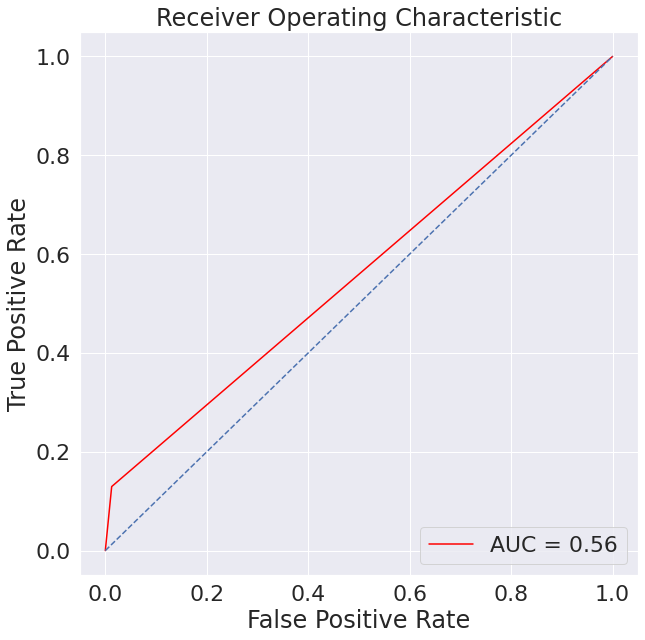

In [105]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [106]:
scores(xgb_tuned)

Accuracy on training set :  0.866564957164652
Accuracy on test set :  0.8662599718442046

Recall on training set :  0.1956027293404094
Recall on test set :  0.12956810631229235

Precision on training set :  0.7724550898203593
Precision on test set :  0.6290322580645161

F1 on training set :  0.31215970961887474
F1 on test set :  0.21487603305785125


* The accuracy and F1score has increased.


In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
logreg = LogisticRegression()
logreg.fit(X_train_mobile, y_train_mobile)

LogisticRegression()

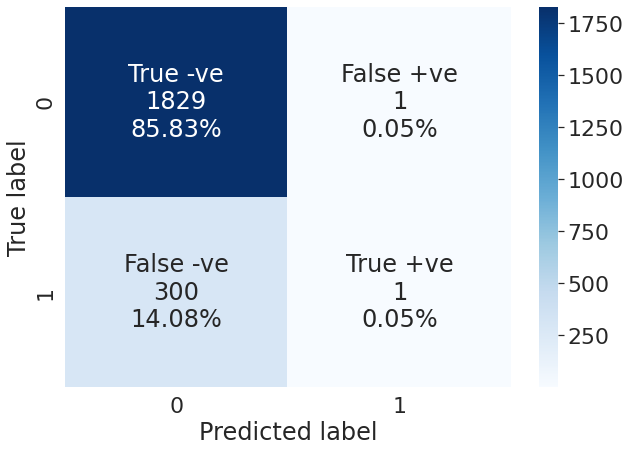

In [109]:
y_predict = logreg.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [110]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5013879055243904

In [111]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5013879055243904

Text(0.5, 0, 'False Positive Rate')

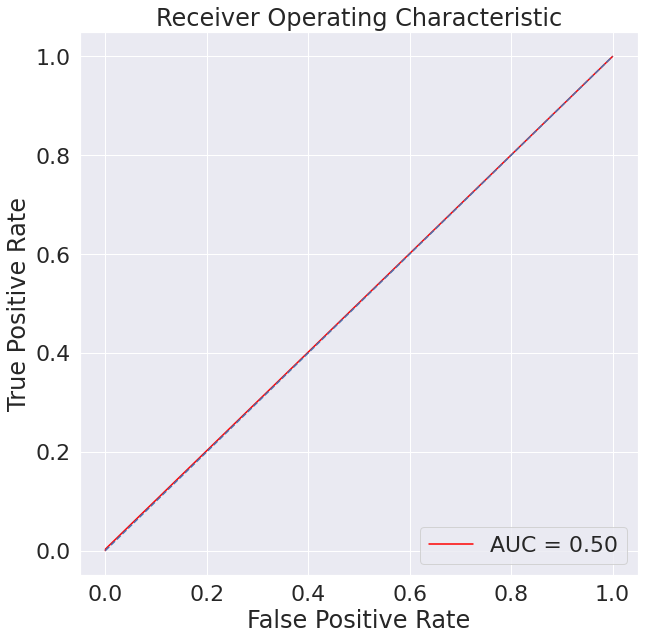

In [112]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [113]:
scores(logreg)

Accuracy on training set :  0.8457927473301255
Accuracy on test set :  0.8587517597372126

Recall on training set :  0.006065200909780136
Recall on test set :  0.0033222591362126247

Precision on training set :  0.7272727272727273
Precision on test set :  0.5

F1 on training set :  0.012030075187969924
F1 on test set :  0.006600660066006601


In [114]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_mobile, y_test_mobile)))


Accuracy of logistic regression classifier on test set: 0.86


## ADA Boost

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

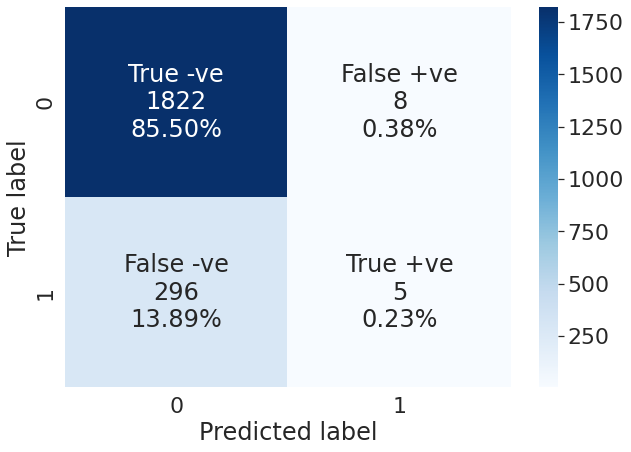

In [116]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_mobile, y_train_mobile)
y_pred = Ada_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_pred)

In [117]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5013879055243904

In [118]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5013879055243904

Text(0.5, 0, 'False Positive Rate')

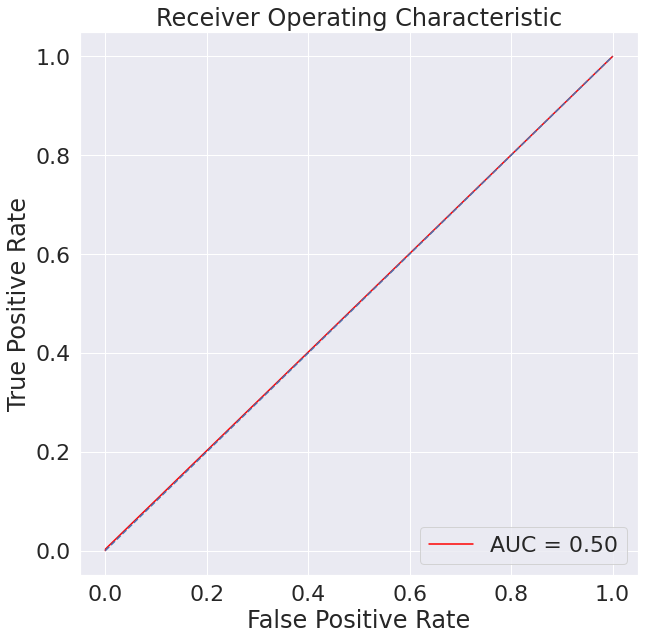

In [119]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [120]:
scores(Ada_boost)

Accuracy on training set :  0.8486093181551461
Accuracy on test set :  0.8573439699671516

Recall on training set :  0.05686125852918878
Recall on test set :  0.016611295681063124

Precision on training set :  0.6198347107438017
Precision on test set :  0.38461538461538464

F1 on training set :  0.10416666666666666
F1 on test set :  0.03184713375796179


## Gradient Boost Classifier

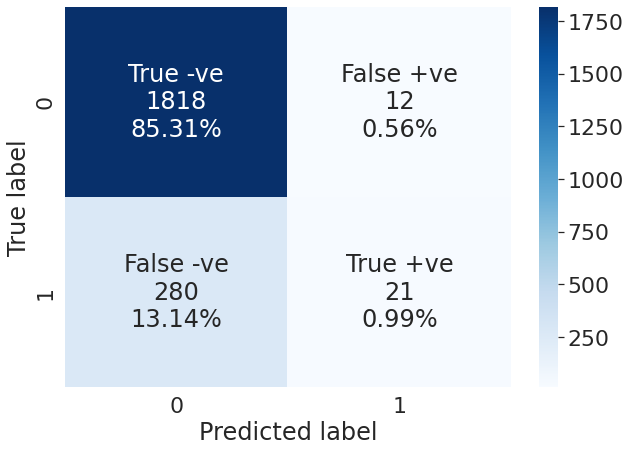

In [121]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [122]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5316050324056424

In [123]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5316050324056424

Text(0.5, 0, 'False Positive Rate')

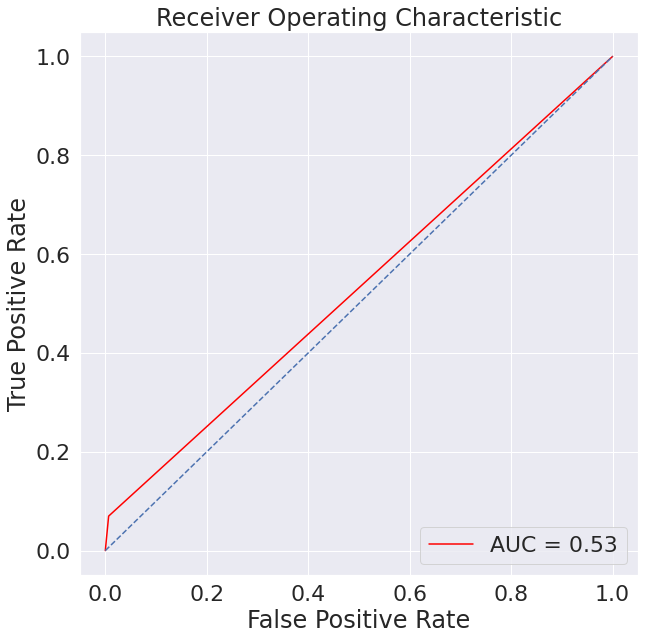

In [124]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [125]:
scores(Grad_boost)

Accuracy on training set :  0.8610491726323202
Accuracy on test set :  0.8629751290473956

Recall on training set :  0.13191811978771797
Recall on test set :  0.06976744186046512

Precision on training set :  0.8169014084507042
Precision on test set :  0.6363636363636364

F1 on training set :  0.22715404699738906
F1 on test set :  0.12574850299401197


## Gradient Boost with ADABoost classifier

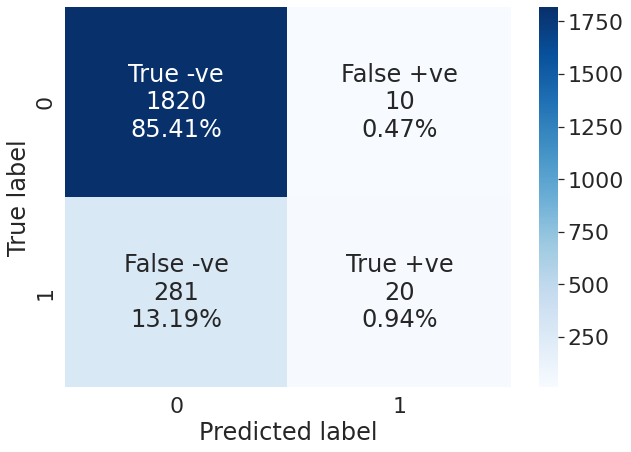

In [126]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost_ada.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [127]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5304903509249678

In [128]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5304903509249678

Text(0.5, 0, 'False Positive Rate')

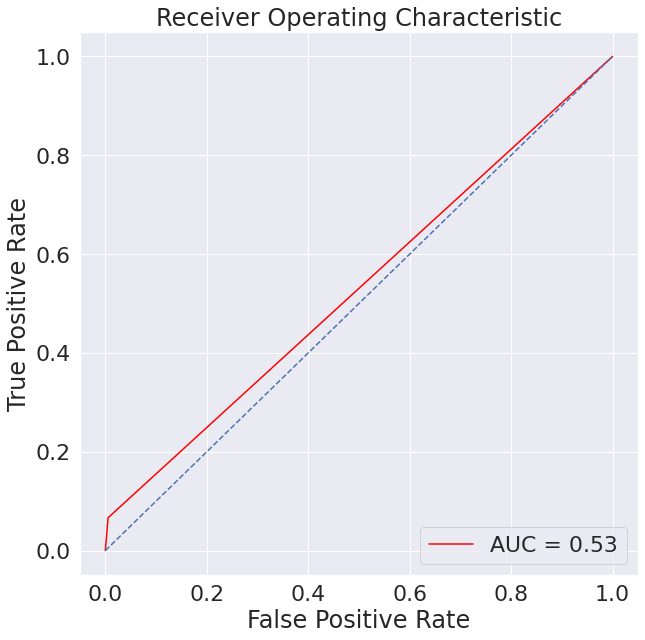

In [129]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [130]:
scores(Grad_boost_ada)

Accuracy on training set :  0.8601103156906467
Accuracy on test set :  0.8634443923040825

Recall on training set :  0.1288855193328279
Recall on test set :  0.0664451827242525

Precision on training set :  0.7981220657276995
Precision on test set :  0.6666666666666666

F1 on training set :  0.22193211488250655
F1 on test set :  0.12084592145015108


## Bagging Classifier

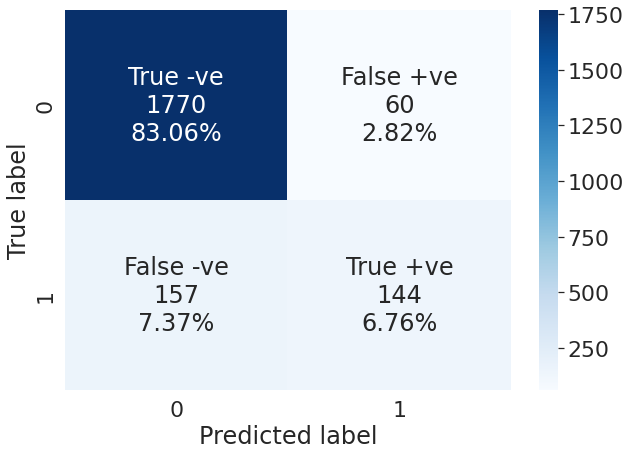

In [131]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_mobile, y_train_mobile)
y_predict = bagging.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [132]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7228092151843581

In [133]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7228092151843581

Text(0.5, 0, 'False Positive Rate')

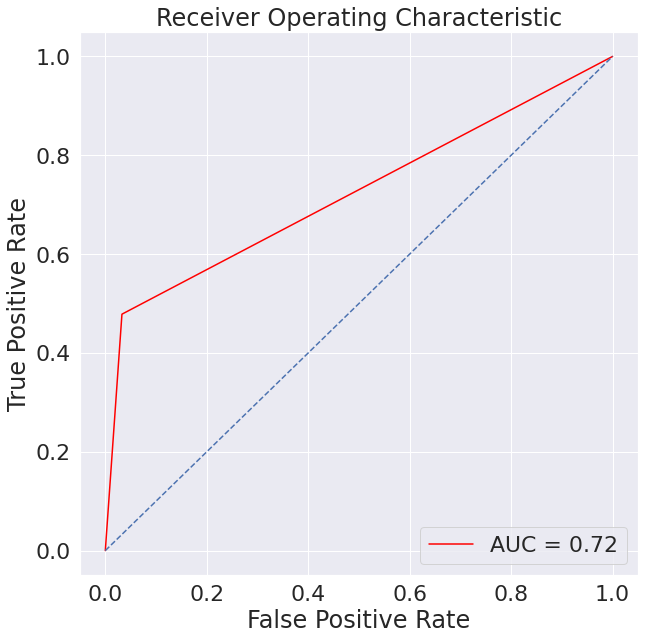

In [134]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [135]:
scores(bagging)

Accuracy on training set :  0.9366271564370379
Accuracy on test set :  0.8981698732989207

Recall on training set :  0.6671721000758151
Recall on test set :  0.47840531561461797

Precision on training set :  0.8970438328236493
Precision on test set :  0.7058823529411765

F1 on training set :  0.7652173913043478
F1 on test set :  0.5702970297029704


### Hyperparameters for Bagging Classifier

In [136]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_mobile, y_train_mobile)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=25)

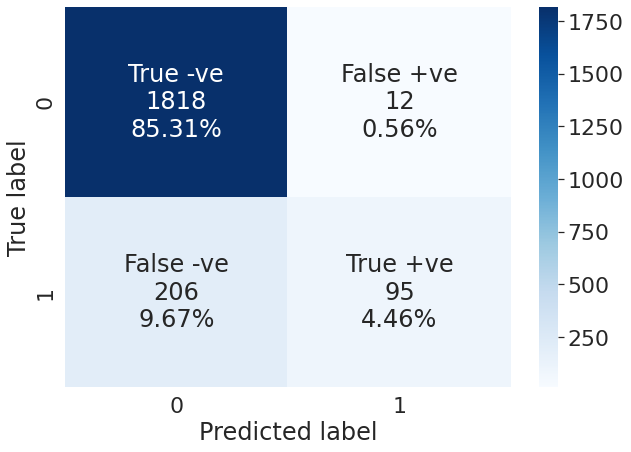

In [137]:
y_predict = bagging_estimator_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [138]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6545286204455095

In [139]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6545286204455095

Text(0.5, 0, 'False Positive Rate')

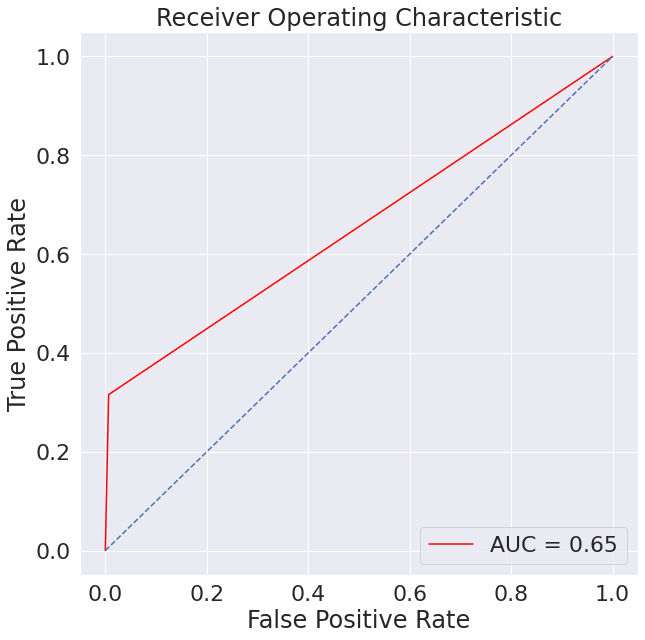

In [140]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [141]:
scores(bagging_estimator_tuned)

Accuracy on training set :  0.9199624457223331
Accuracy on test set :  0.8977006100422337

Recall on training set :  0.49507202426080366
Recall on test set :  0.31561461794019935

Precision on training set :  0.976083707025411
Precision on test set :  0.8878504672897196

F1 on training set :  0.6569416498993964
F1 on test set :  0.465686274509804


## Linear Discriminant Analysis

In [142]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_mobile, y_train_mobile)

LinearDiscriminantAnalysis()

In [143]:
lda.explained_variance_ratio_

array([1.])

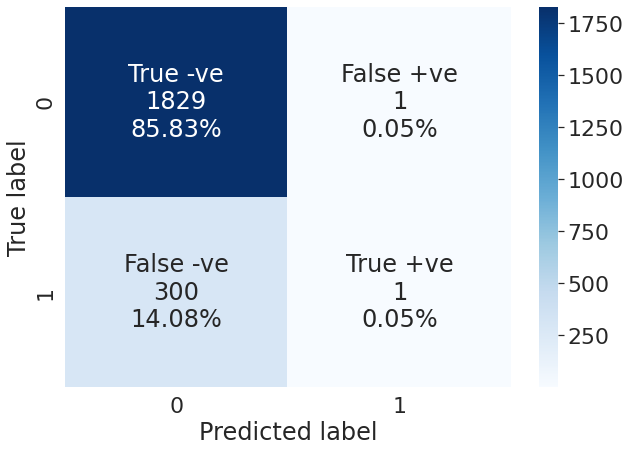

In [144]:
y_predict = lda.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [145]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5013879055243904

In [146]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5013879055243904

Text(0.5, 0, 'False Positive Rate')

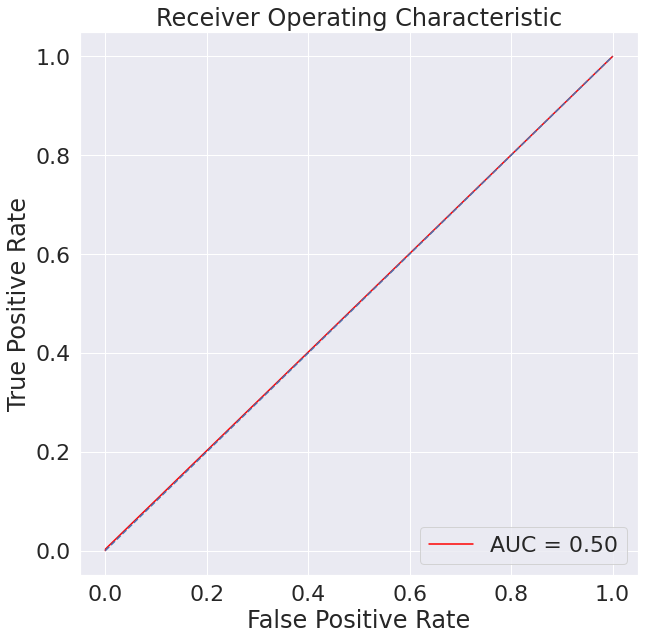

In [147]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [148]:
scores(lda)

Accuracy on training set :  0.8459101044478348
Accuracy on test set :  0.8587517597372126

Recall on training set :  0.008339651250947688
Recall on test set :  0.0033222591362126247

Precision on training set :  0.6875
Precision on test set :  0.5

F1 on training set :  0.01647940074906367
F1 on test set :  0.006600660066006601


## KNN Classifier

In [149]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_mobile, y_test_mobile) 


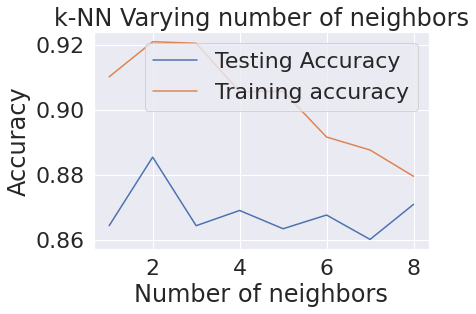

In [150]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [151]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [152]:
#Fit the model
knn.fit(X_train_mobile,y_train_mobile)

KNeighborsClassifier(n_neighbors=7)

In [153]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_mobile,y_test_mobile)

0.8601595495072736

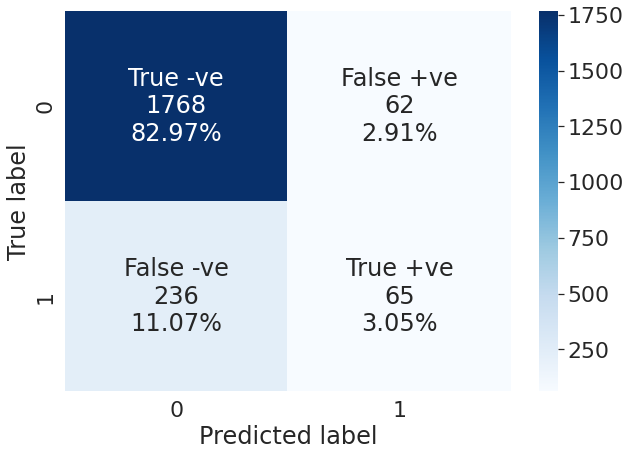

In [154]:
y_predict = knn.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [155]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5910335312165278

In [156]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5910335312165278

Text(0.5, 0, 'False Positive Rate')

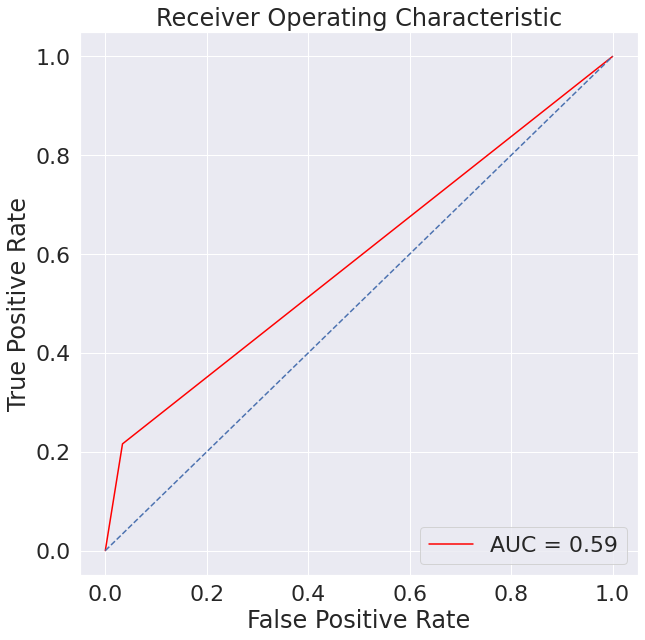

In [157]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [158]:
scores(knn)

Accuracy on training set :  0.8876892383523061
Accuracy on test set :  0.8601595495072736

Recall on training set :  0.3980288097043215
Recall on test set :  0.2159468438538206

Precision on training set :  0.7630813953488372
Precision on test set :  0.5118110236220472

F1 on training set :  0.523168908819133
F1 on test set :  0.3037383177570093


## Naive Bayes Classifier

In [159]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_mobile, y_train_mobile)

GaussianNB()

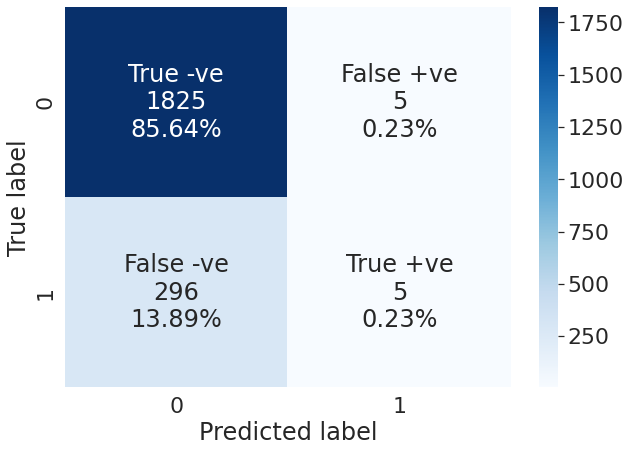

In [160]:
y_predict = gnb.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [161]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5069395276219524

In [162]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5069395276219524

Text(0.5, 0, 'False Positive Rate')

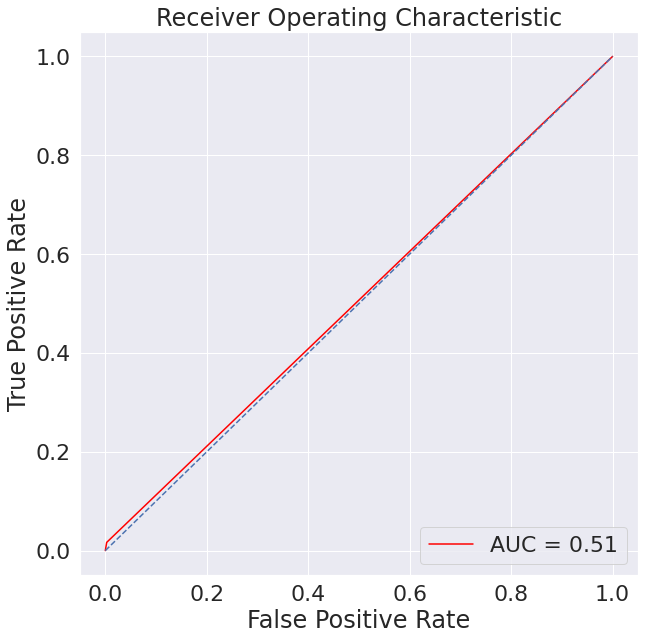

In [163]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [164]:
scores(gnb)

Accuracy on training set :  0.8440323905644878
Accuracy on test set :  0.8587517597372126

Recall on training set :  0.017437452615617893
Recall on test set :  0.016611295681063124

Precision on training set :  0.4107142857142857
Precision on test set :  0.5

F1 on training set :  0.03345454545454545
F1 on test set :  0.03215434083601287


In [165]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])
  

In [166]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  ...  Train_F1-Score  Test_F1-Score
0                Decision Tree        0.938622  ...        0.767452       0.588235
9                      Bagging        0.936627  ...        0.765217       0.570297
2                Random Forest        0.938622  ...        0.773102       0.558233
10     Bagging estimator tuned        0.919962  ...        0.656942       0.465686
1          Tuned Decision Tree        0.739819  ...        0.388414       0.356732
12                         KNN        0.887689  ...        0.523169       0.303738
4     Tuned XGBoost Classifier        0.866565  ...        0.312160       0.214876
7               Gradient boost        0.861049  ...        0.227154       0.125749
8       Gradient and Ada Boost        0.860110  ...        0.221932       0.120846
3           XGBoost Classifier        0.859524  ...        0.204651       0.104294
13      Naive Bayes Classifier        0.844032  ...        0.033455       0.032154
6                    Ada boost        0.848609  ...        0.104167       0.031847
5          Logistic Regression        0.845793  ...        0.012030       0.006601
11  Linear Discrimant Analysis        0.845910  ...        0.016479       0.006601

[14 rows x 5 columns]

In [167]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Train_Accuracy  ...  Train_F1-Score  Test_F1-Score
0                Decision Tree        0.938622  ...        0.767452       0.588235
9                      Bagging        0.936627  ...        0.765217       0.570297
10     Bagging estimator tuned        0.919962  ...        0.656942       0.465686
2                Random Forest        0.938622  ...        0.773102       0.558233
4     Tuned XGBoost Classifier        0.866565  ...        0.312160       0.214876
8       Gradient and Ada Boost        0.860110  ...        0.221932       0.120846
3           XGBoost Classifier        0.859524  ...        0.204651       0.104294
7               Gradient boost        0.861049  ...        0.227154       0.125749
12                         KNN        0.887689  ...        0.523169       0.303738
5          Logistic Regression        0.845793  ...        0.012030       0.006601
11  Linear Discrimant Analysis        0.845910  ...        0.016479       0.006601
13      Naive Bayes Classifier        0.844032  ...        0.033455       0.032154
6                    Ada boost        0.848609  ...        0.104167       0.031847
1          Tuned Decision Tree        0.739819  ...        0.388414       0.356732

[14 rows x 5 columns]

## **Model training for Laptop.**

In [168]:
df_laptop.corr()

Taken_product  ...  Daily_Avg_mins_spend_on_traveling_page
Taken_product                                      1.000000  ...                               -0.252032
Yearly_avg_view_on_travel_page                    -0.242961  ...                                0.644598
total_likes_on_outstation_checkin_given           -0.142125  ...                                0.024919
preferred_location_type                            0.039108  ...                               -0.060384
Yearly_avg_comment_on_travel_page                  0.041578  ...                                0.104176
total_likes_on_outofstation_checkin_received      -0.252337  ...                                0.691151
week_since_last_outstation_checkin                 0.047308  ...                                0.299628
following_company_page                             0.262993  ...                                0.005699
montly_avg_comment_on_company_page                -0.014207  ...                                0.210328
working_flag                                      -0.010284  ...                                0.064760
travelling_network_rating                         -0.120412  ...                                0.003806
Adult_flag                                        -0.149352  ...                                0.015315
Daily_Avg_mins_spend_on_traveling_page            -0.252032  ...                                1.000000

[13 rows x 13 columns]

In [169]:
df_laptop.drop(['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
         'total_likes_on_outofstation_checkin_received', 'montly_avg_comment_on_company_page',
        'working_flag', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page'],
               inplace=True, axis='columns')

In [170]:
df_laptop.drop(['preferred_device'],inplace=True, axis='columns')

In [171]:
df_laptop.shape

(1108, 7)

#### Train & Test splits.

In [172]:
train_laptop, test_laptop = train_test_split(df_laptop, test_size=0.2)

In [173]:
train_laptop.shape

(886, 7)

In [174]:
test_laptop.shape

(222, 7)

In [175]:
X_train_laptop = train_laptop.drop(['Taken_product'], axis='columns')
y_train_laptop = train_laptop['Taken_product']
y_train_laptop.head()

9720     0
7509     0
11699    0
9994     0
9112     0
Name: Taken_product, dtype: int64

In [176]:
X_train_laptop.head()

yearly_avg_Outstation_checkins  ... following_company_page
9720                               3  ...                      2
7509                               2  ...                      2
11699                             11  ...                      2
9994                               2  ...                      2
9112                               5  ...                      2

[5 rows x 6 columns]

In [177]:
X_test_laptop = test_laptop.drop(['Taken_product'], axis='columns')
y_test_laptop = test_laptop['Taken_product']
y_test_laptop.head()

5973    0
9263    1
7955    0
9098    0
9443    0
Name: Taken_product, dtype: int64

In [178]:
X_test_laptop.head()

yearly_avg_Outstation_checkins  ... following_company_page
5973                              1  ...                      3
9263                              4  ...                      2
7955                             12  ...                      2
9098                              1  ...                      2
9443                              5  ...                      2

[5 rows x 6 columns]

**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [179]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

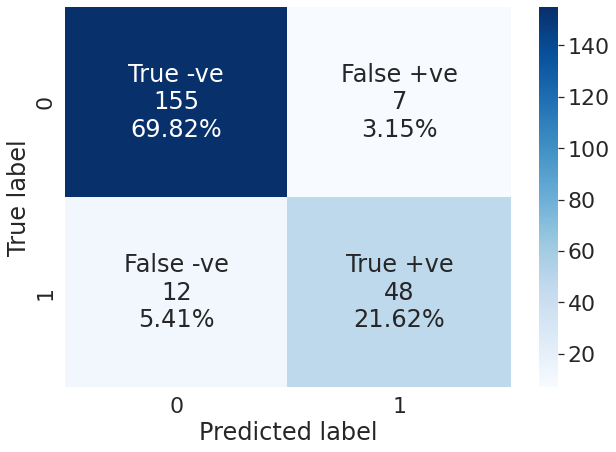

In [180]:
Dt.fit(X_train_laptop, y_train_laptop) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop, y_predict)

In [181]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8783950617283951

In [182]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8783950617283951

Text(0.5, 0, 'False Positive Rate')

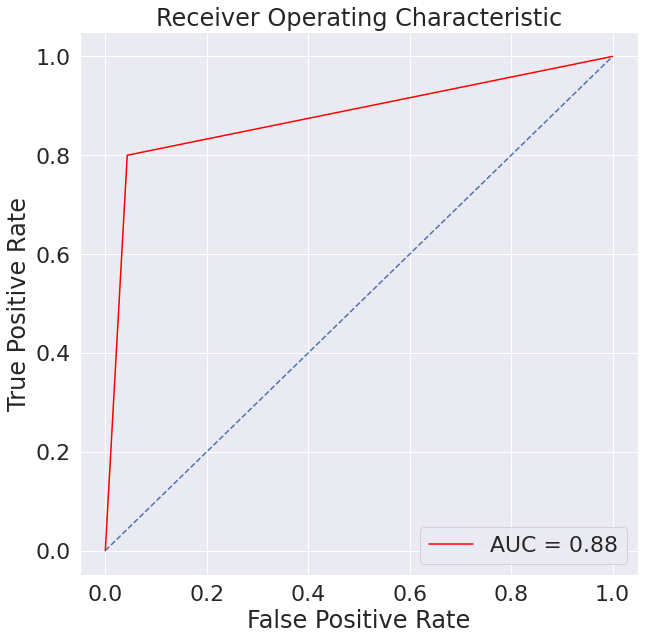

In [183]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [184]:
scores_l(Dt)

Accuracy on training set :  0.9988713318284425
Accuracy on test set :  0.9144144144144144

Recall on training set :  0.9953703703703703
Recall on test set :  0.8

Precision on training set :  1.0
Precision on test set :  0.8727272727272727

F1 on training set :  0.9976798143851509
F1 on test set :  0.8347826086956521


### **Random Forest Classifier**

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_laptop,y_train_laptop)


RandomForestClassifier(random_state=25)

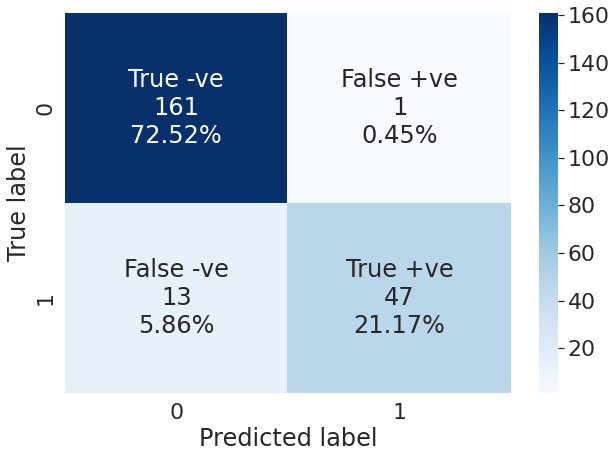

In [187]:
y_predict = random_forest.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [188]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8885802469135802

In [189]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8885802469135802

Text(0.5, 0, 'False Positive Rate')

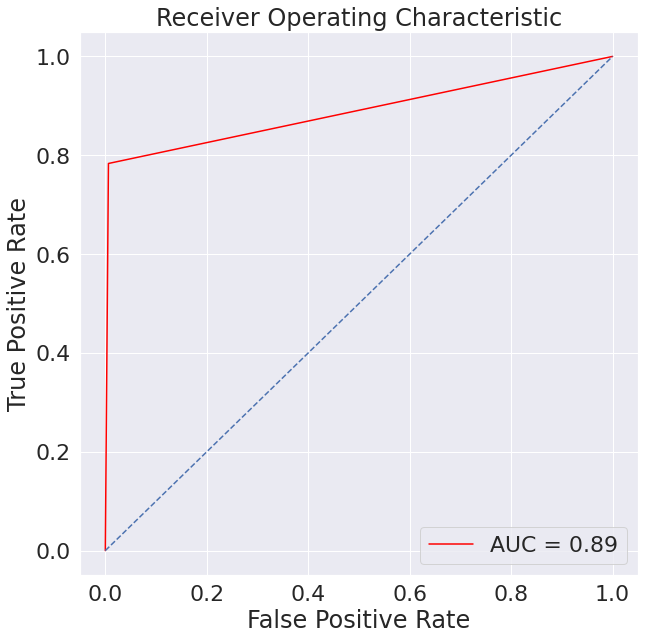

In [190]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [191]:
scores_l(random_forest)

Accuracy on training set :  0.9988713318284425
Accuracy on test set :  0.9369369369369369

Recall on training set :  0.9953703703703703
Recall on test set :  0.7833333333333333

Precision on training set :  1.0
Precision on test set :  0.9791666666666666

F1 on training set :  0.9976798143851509
F1 on test set :  0.8703703703703703





**Random Forest Classifier with weights**

In [192]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_laptop,y_train_laptop)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

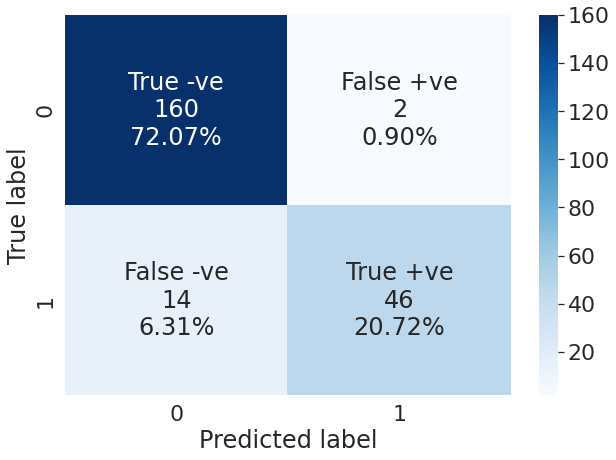

In [193]:
y_predict = random_forest_wt.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [194]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8771604938271604

In [195]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8771604938271604

Text(0.5, 0, 'False Positive Rate')

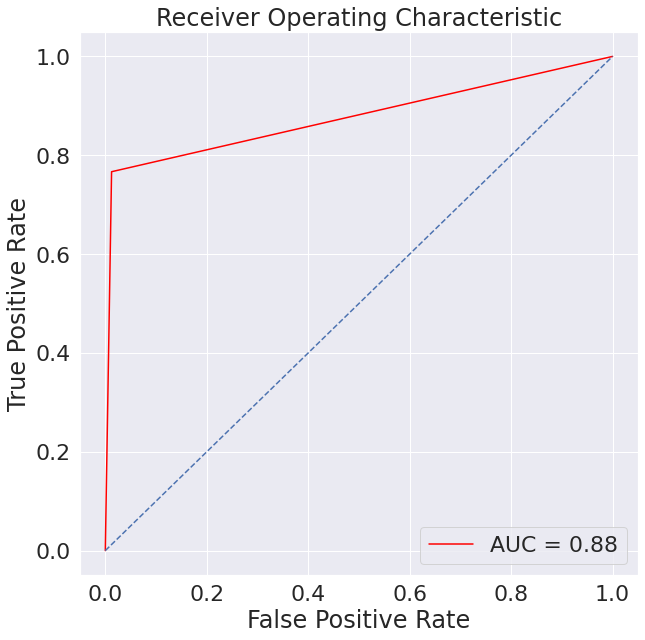

In [196]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [197]:
scores_l(random_forest_wt)

Accuracy on training set :  0.9988713318284425
Accuracy on test set :  0.9279279279279279

Recall on training set :  1.0
Recall on test set :  0.7666666666666667

Precision on training set :  0.9953917050691244
Precision on test set :  0.9583333333333334

F1 on training set :  0.997690531177829
F1 on test set :  0.8518518518518519


* There is little improvement in the metrics for the weighted Random Forest classifier.

## Feature Importance random forest


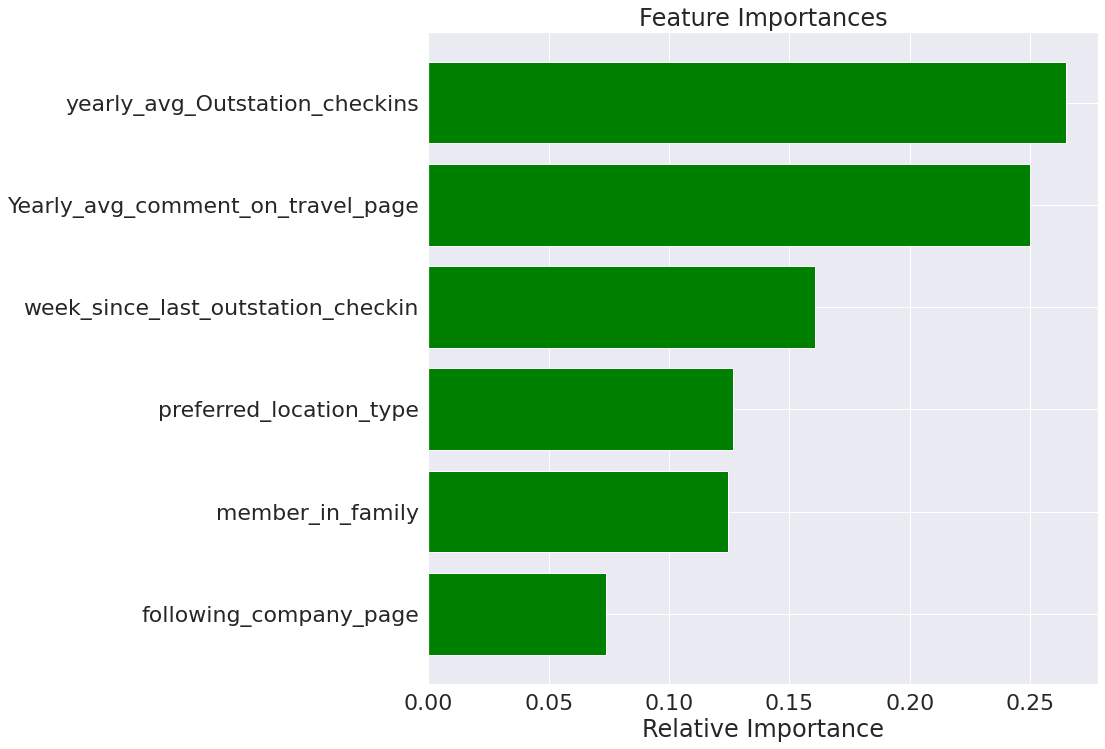

In [198]:
feature_names = X_train_laptop.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()





### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_laptop, y_train_laptop)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=10, min_samples_leaf=2,
                       random_state=25)

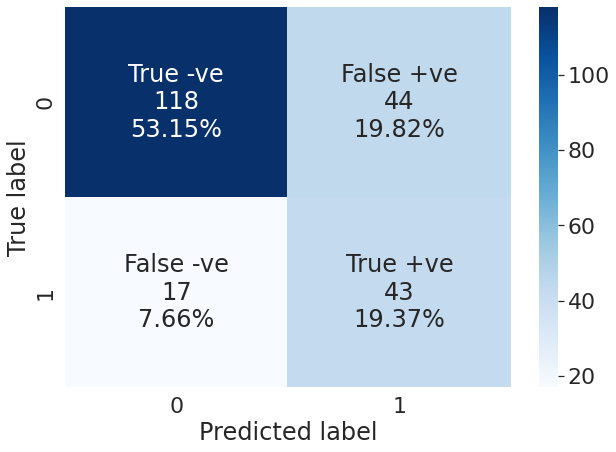

In [201]:
y_predict = classifier.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop,y_predict) 


In [202]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7225308641975309

In [203]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7225308641975309

Text(0.5, 0, 'False Positive Rate')

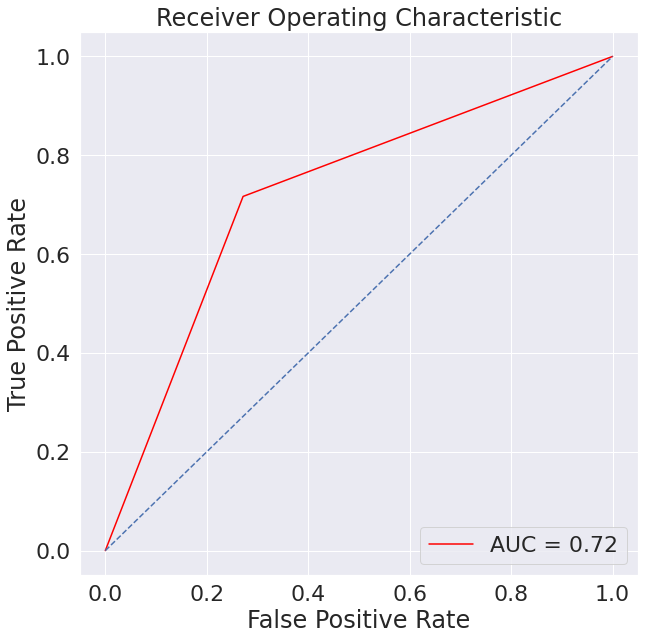

In [204]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [205]:
scores_l(classifier)

Accuracy on training set :  0.7155756207674944
Accuracy on test set :  0.7252252252252253

Recall on training set :  0.7638888888888888
Recall on test set :  0.7166666666666667

Precision on training set :  0.45081967213114754
Precision on test set :  0.4942528735632184

F1 on training set :  0.5670103092783505
F1 on test set :  0.5850340136054422


In [206]:
X_train_laptop['yearly_avg_Outstation_checkins'] = X_train_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_train_laptop['member_in_family'] = X_train_laptop['member_in_family'].astype('int')
X_test_laptop['yearly_avg_Outstation_checkins'] = X_test_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_test_laptop['member_in_family'] = X_test_laptop['member_in_family'].astype('int')

## Boosting Model:


**XGBoost Classifier**

In [207]:
from xgboost import XGBClassifier

In [208]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_laptop,y_train_laptop)

XGBClassifier(eval_metric='logloss', random_state=25)

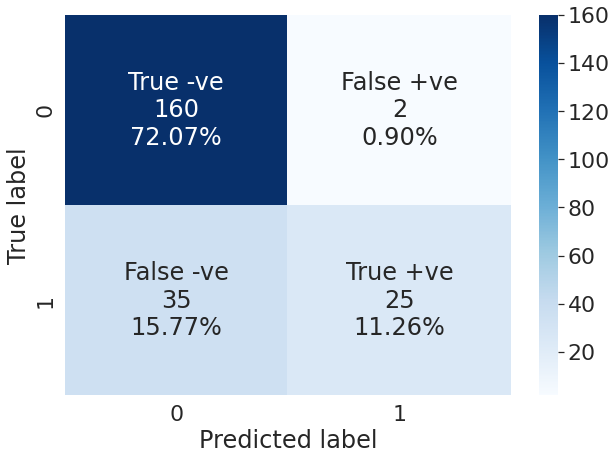

In [209]:
y_predict = XG_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [210]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7021604938271605

In [211]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7021604938271605

Text(0.5, 0, 'False Positive Rate')

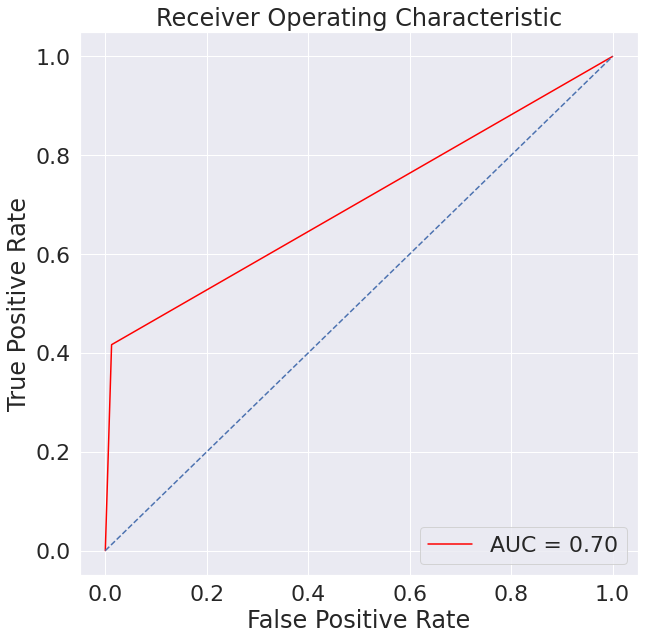

In [212]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [213]:
scores_l(XG_boost)

Accuracy on training set :  0.8984198645598194
Accuracy on test set :  0.8333333333333334

Recall on training set :  0.6111111111111112
Recall on test set :  0.4166666666666667

Precision on training set :  0.9565217391304348
Precision on test set :  0.9259259259259259

F1 on training set :  0.7457627118644068
F1 on test set :  0.5747126436781609





### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [214]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_laptop, y_train_laptop)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', learning_rate=0.55, n_estimators=50,
              random_state=25, subsample=0.8)

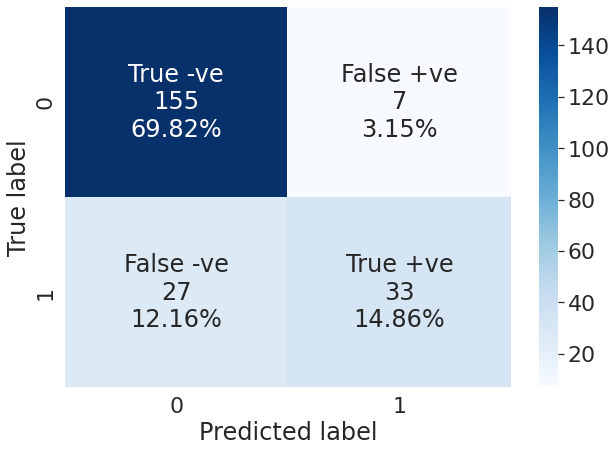

In [215]:
y_predict = xgb_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)


In [216]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7533950617283951

In [217]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7533950617283951

Text(0.5, 0, 'False Positive Rate')

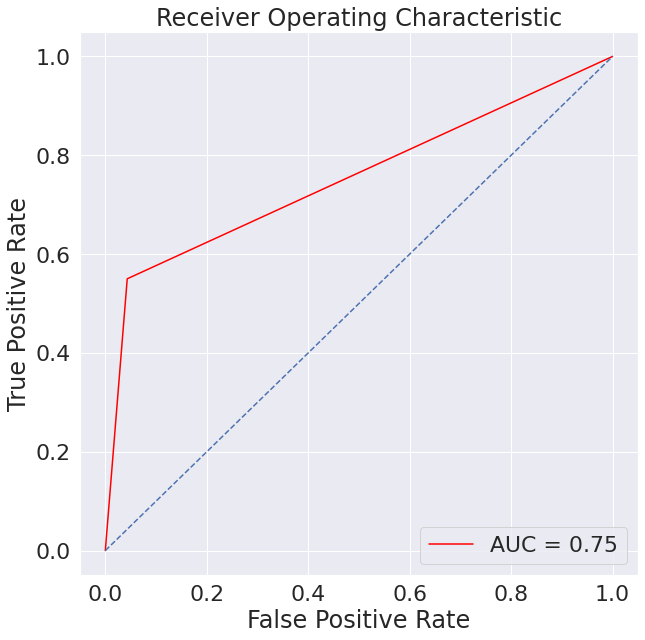

In [218]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [219]:
scores_l(xgb_tuned)

Accuracy on training set :  0.945823927765237
Accuracy on test set :  0.8468468468468469

Recall on training set :  0.8009259259259259
Recall on test set :  0.55

Precision on training set :  0.9719101123595506
Precision on test set :  0.825

F1 on training set :  0.8781725888324874
F1 on test set :  0.66


In [220]:
from sklearn.linear_model import LogisticRegression

In [221]:
logreg = LogisticRegression()
logreg.fit(X_train_laptop, y_train_laptop)

LogisticRegression()

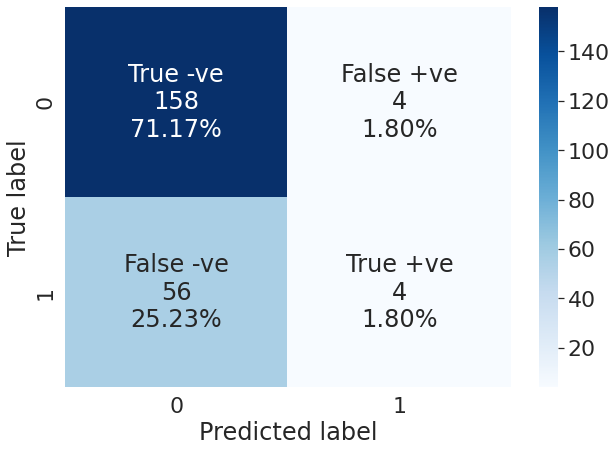

In [222]:
y_predict = logreg.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [223]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5209876543209876

In [224]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5209876543209876

Text(0.5, 0, 'False Positive Rate')

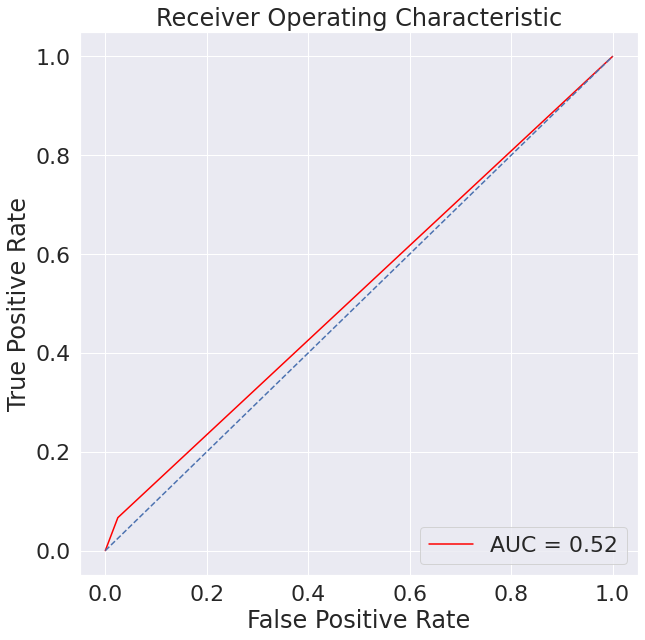

In [225]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [226]:
scores_l(logreg)

Accuracy on training set :  0.7686230248306998
Accuracy on test set :  0.7297297297297297

Recall on training set :  0.10648148148148148
Recall on test set :  0.06666666666666667

Precision on training set :  0.6571428571428571
Precision on test set :  0.5

F1 on training set :  0.18326693227091634
F1 on test set :  0.11764705882352941


In [227]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_laptop, y_test_laptop)))


Accuracy of logistic regression classifier on test set: 0.73


## ADA Boost

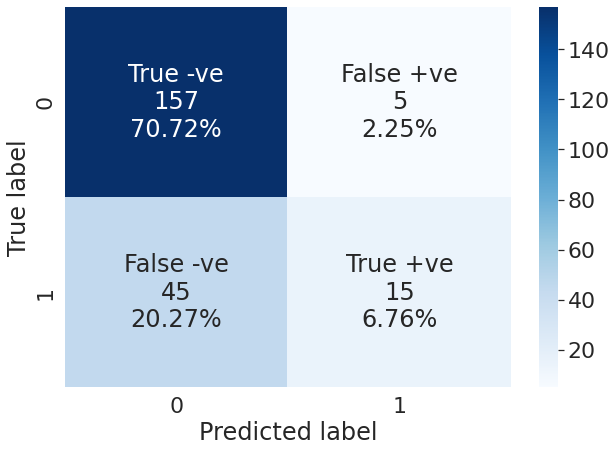

In [228]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_laptop, y_train_laptop)
y_pred = Ada_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_pred)

In [229]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5209876543209876

In [230]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5209876543209876

Text(0.5, 0, 'False Positive Rate')

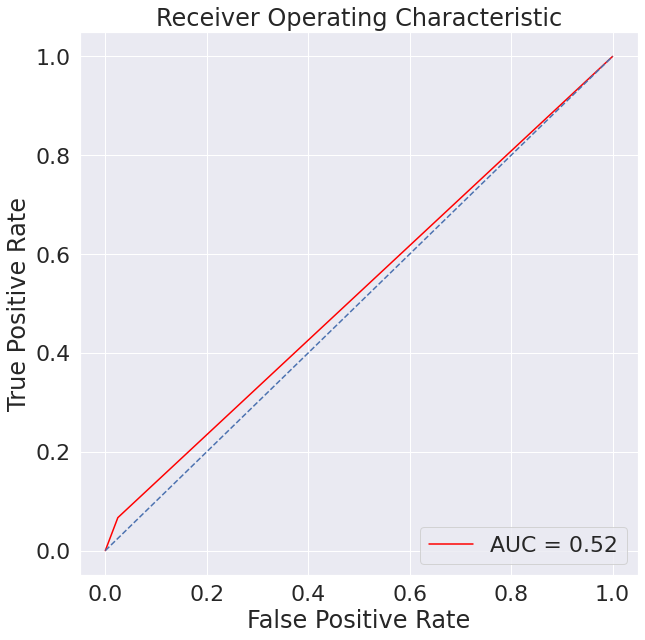

In [231]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [232]:
scores_l(Ada_boost)

Accuracy on training set :  0.8047404063205418
Accuracy on test set :  0.7747747747747747

Recall on training set :  0.3055555555555556
Recall on test set :  0.25

Precision on training set :  0.7415730337078652
Precision on test set :  0.75

F1 on training set :  0.43278688524590164
F1 on test set :  0.375


## Gradient Boost Classifier

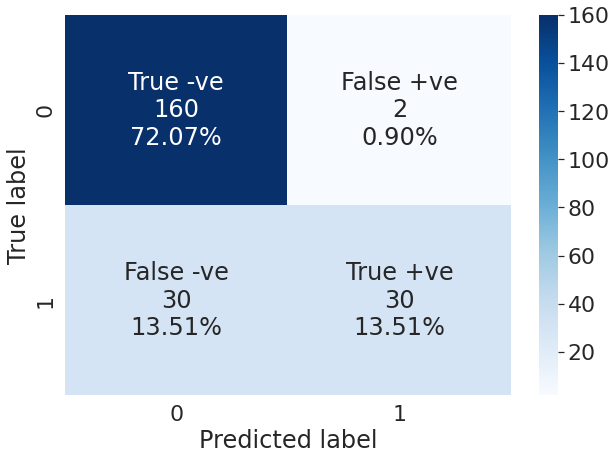

In [233]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [234]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7438271604938271

In [235]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7438271604938271

Text(0.5, 0, 'False Positive Rate')

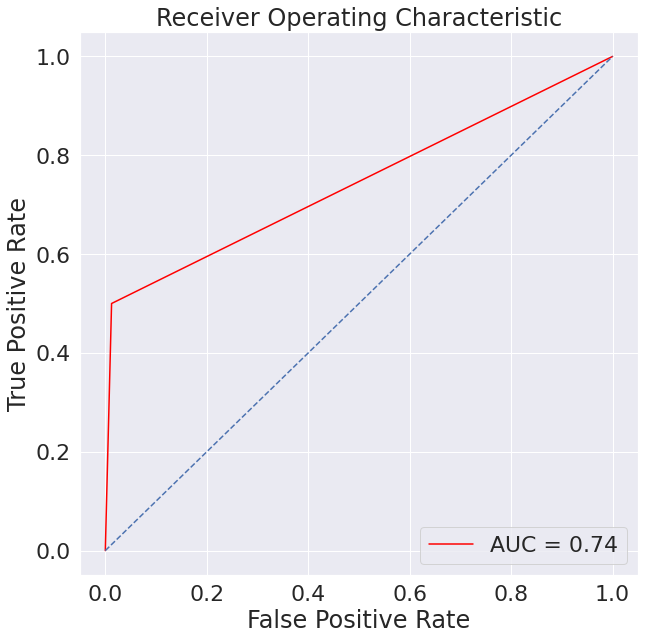

In [236]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [237]:
scores_l(Grad_boost)

Accuracy on training set :  0.917607223476298
Accuracy on test set :  0.8558558558558559

Recall on training set :  0.7037037037037037
Recall on test set :  0.5

Precision on training set :  0.9440993788819876
Precision on test set :  0.9375

F1 on training set :  0.8063660477453581
F1 on test set :  0.6521739130434783


## Gradient Boost with ADABoost classifier

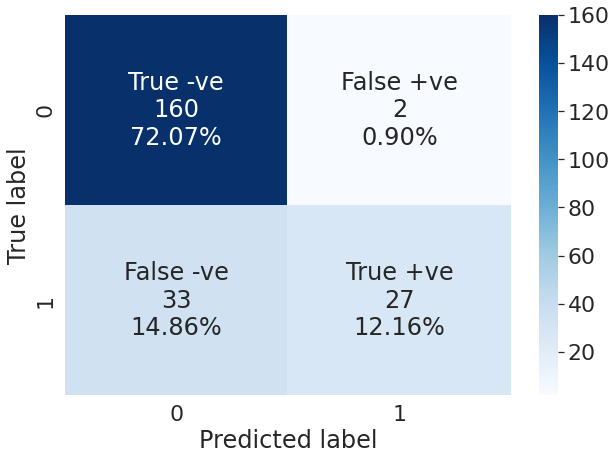

In [238]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost_ada.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [239]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7188271604938271

In [240]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7188271604938271

Text(0.5, 0, 'False Positive Rate')

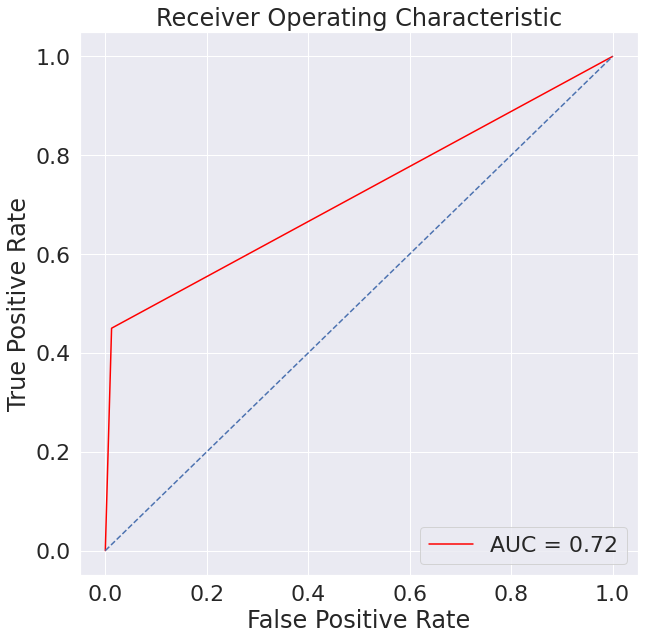

In [241]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [242]:
scores_l(Grad_boost_ada)

Accuracy on training set :  0.9142212189616253
Accuracy on test set :  0.8423423423423423

Recall on training set :  0.6944444444444444
Recall on test set :  0.45

Precision on training set :  0.9375
Precision on test set :  0.9310344827586207

F1 on training set :  0.7978723404255319
F1 on test set :  0.6067415730337079


## Bagging Classifier

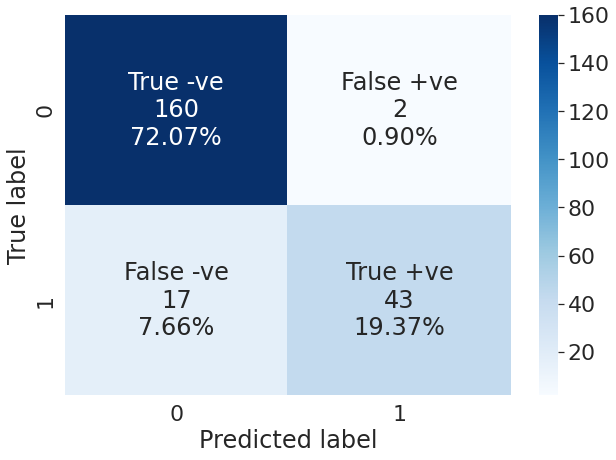

In [243]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_laptop, y_train_laptop)
y_predict = bagging.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [244]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8521604938271605

In [245]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8521604938271605

Text(0.5, 0, 'False Positive Rate')

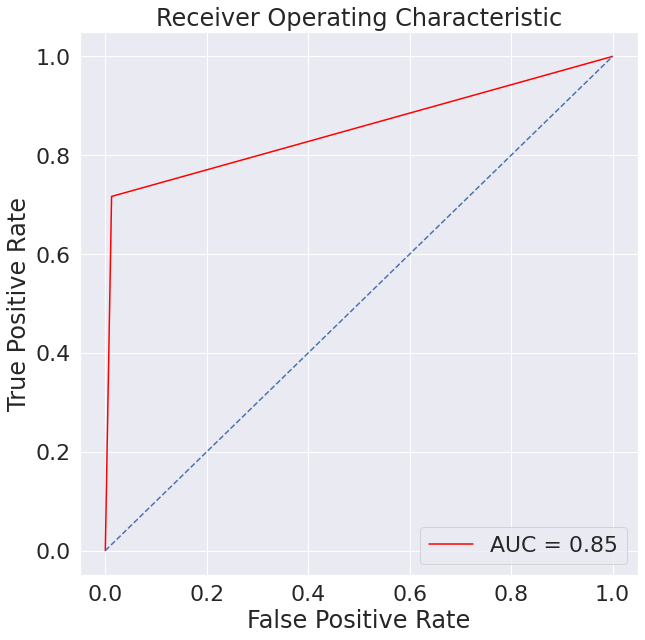

In [246]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [247]:
scores_l(bagging)

Accuracy on training set :  0.9909706546275395
Accuracy on test set :  0.9144144144144144

Recall on training set :  0.9722222222222222
Recall on test set :  0.7166666666666667

Precision on training set :  0.9905660377358491
Precision on test set :  0.9555555555555556

F1 on training set :  0.9813084112149533
F1 on test set :  0.8190476190476191


### Hyperparameters for Bagging Classifier

In [248]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_laptop, y_train_laptop)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=50,
                  random_state=25)

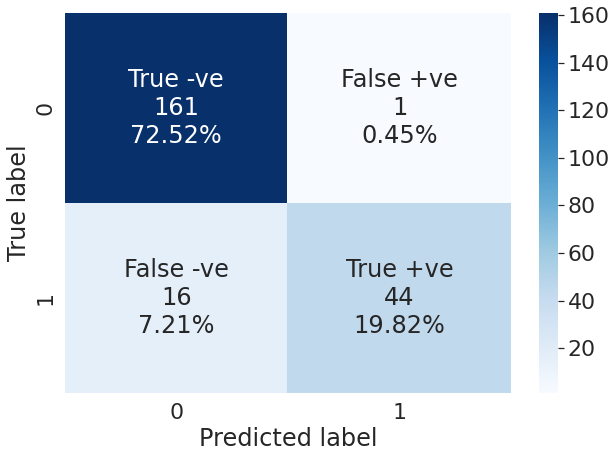

In [249]:
y_predict = bagging_estimator_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [250]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8635802469135802

In [251]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8635802469135802

Text(0.5, 0, 'False Positive Rate')

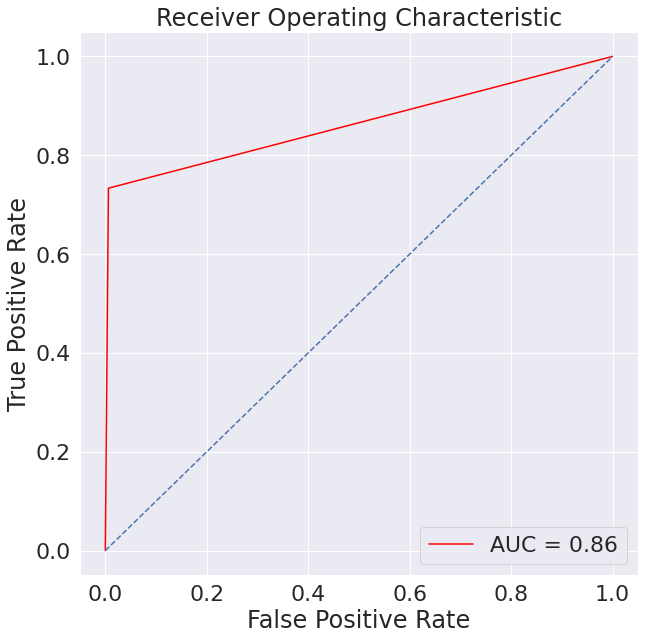

In [252]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [253]:
scores_l(bagging_estimator_tuned)

Accuracy on training set :  0.9966139954853274
Accuracy on test set :  0.9234234234234234

Recall on training set :  0.9861111111111112
Recall on test set :  0.7333333333333333

Precision on training set :  1.0
Precision on test set :  0.9777777777777777

F1 on training set :  0.993006993006993
F1 on test set :  0.838095238095238


## Linear Discriminant Analysis

In [254]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_laptop, y_train_laptop)

LinearDiscriminantAnalysis()

In [255]:
lda.explained_variance_ratio_

array([1.])

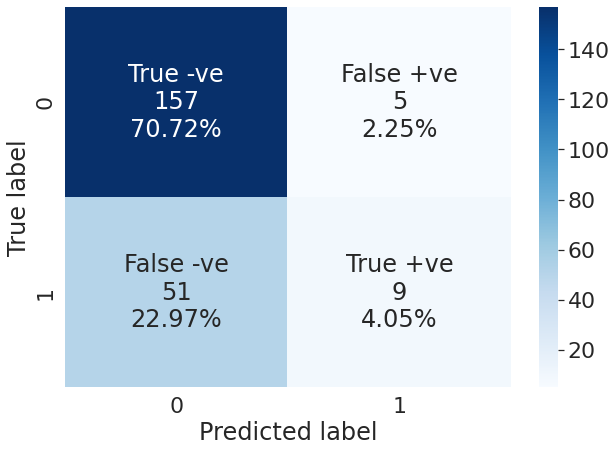

In [256]:
y_predict = lda.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [257]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5595679012345678

In [258]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5595679012345678

Text(0.5, 0, 'False Positive Rate')

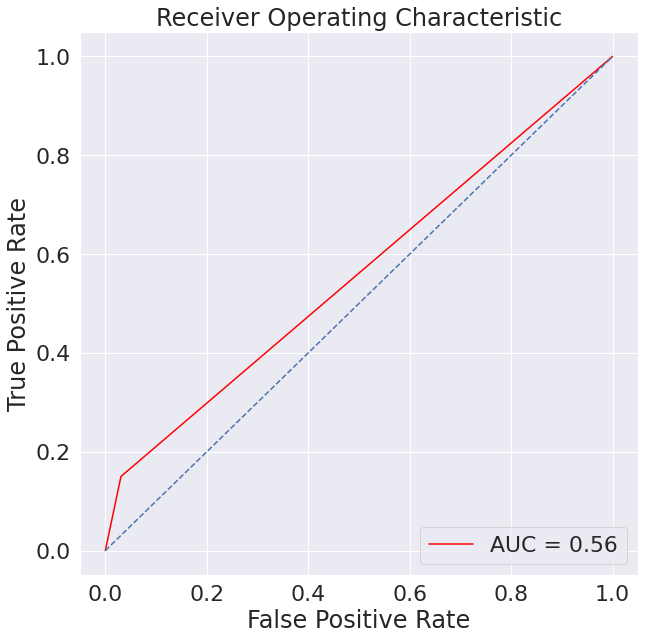

In [259]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [260]:
scores_l(lda)

Accuracy on training set :  0.7776523702031602
Accuracy on test set :  0.7477477477477478

Recall on training set :  0.1712962962962963
Recall on test set :  0.15

Precision on training set :  0.6727272727272727
Precision on test set :  0.6428571428571429

F1 on training set :  0.2730627306273063
F1 on test set :  0.24324324324324323


## KNN Classifier

In [261]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_laptop, y_test_laptop) 


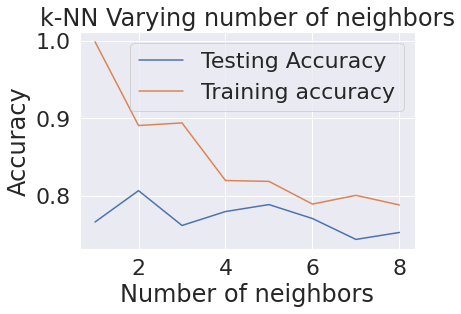

In [262]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [263]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [264]:
#Fit the model
knn.fit(X_train_laptop,y_train_laptop)

KNeighborsClassifier(n_neighbors=7)

In [265]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_laptop,y_test_laptop)

0.7432432432432432

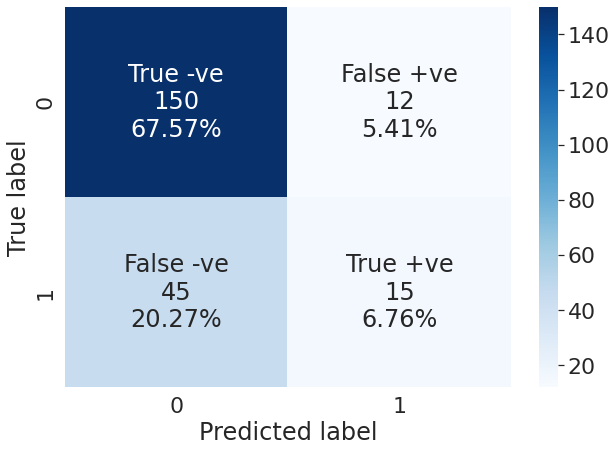

In [266]:
y_predict = knn.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [267]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.587962962962963

In [268]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.587962962962963

Text(0.5, 0, 'False Positive Rate')

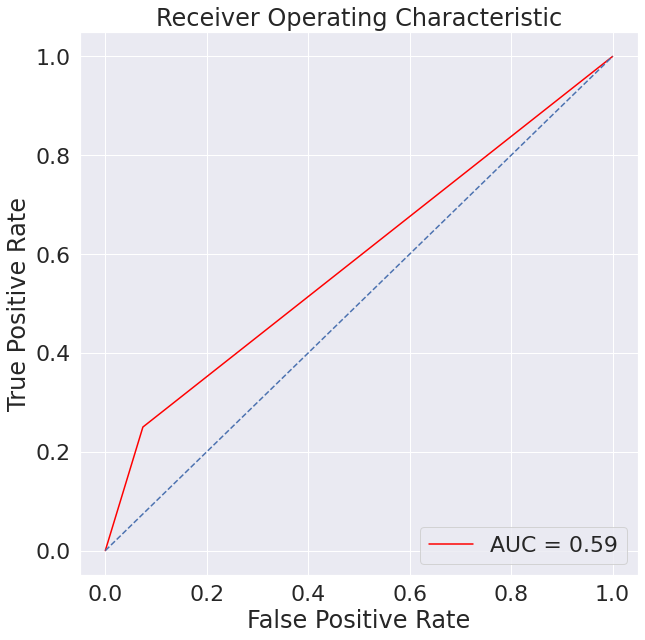

In [269]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [270]:
scores_l(knn)

Accuracy on training set :  0.8002257336343115
Accuracy on test set :  0.7432432432432432

Recall on training set :  0.2916666666666667
Recall on test set :  0.25

Precision on training set :  0.7241379310344828
Precision on test set :  0.5555555555555556

F1 on training set :  0.4158415841584159
F1 on test set :  0.3448275862068966


## Naive Bayes Classifier

In [271]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_laptop, y_train_laptop)

GaussianNB()

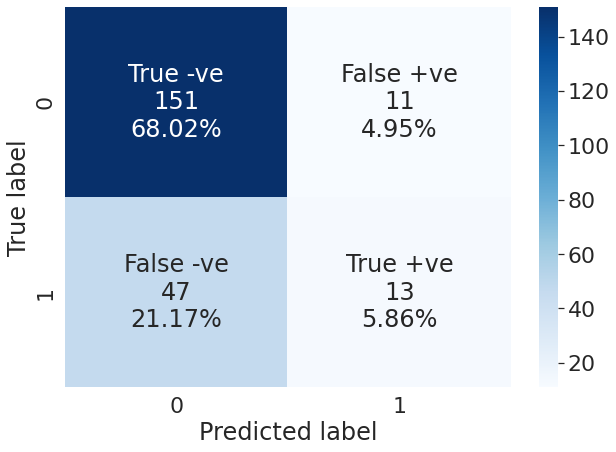

In [272]:
y_predict = gnb.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [273]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5743827160493828

In [274]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5743827160493828

Text(0.5, 0, 'False Positive Rate')

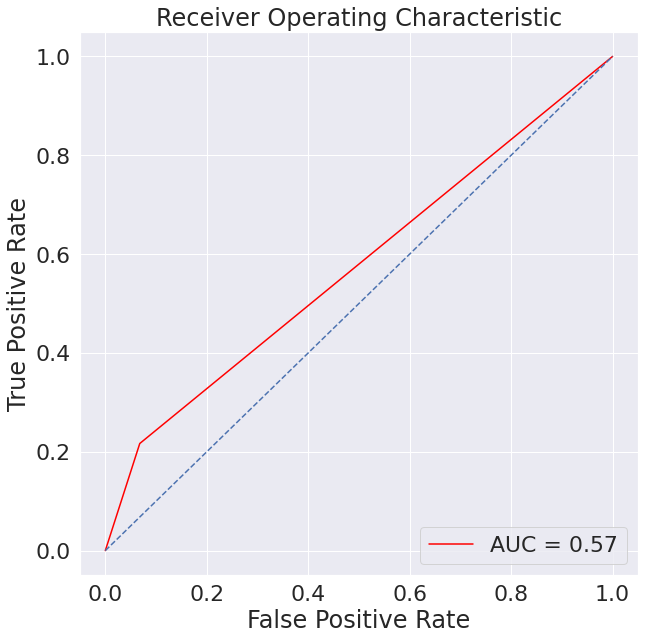

In [275]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [276]:
scores_l(gnb)

Accuracy on training set :  0.7607223476297968
Accuracy on test set :  0.7387387387387387

Recall on training set :  0.1712962962962963
Recall on test set :  0.21666666666666667

Precision on training set :  0.5285714285714286
Precision on test set :  0.5416666666666666

F1 on training set :  0.25874125874125875
F1 on test set :  0.30952380952380953


In [283]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores_l(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [284]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  ...  Train_F1-Score  Test_F1-Score
2                Random Forest        0.998871  ...        0.997680       0.870370
10     Bagging estimator tuned        0.996614  ...        0.993007       0.838095
0                Decision Tree        0.998871  ...        0.997680       0.834783
9                      Bagging        0.990971  ...        0.981308       0.819048
4     Tuned XGBoost Classifier        0.945824  ...        0.878173       0.660000
7               Gradient boost        0.917607  ...        0.806366       0.652174
8       Gradient and Ada Boost        0.914221  ...        0.797872       0.606742
1          Tuned Decision Tree        0.715576  ...        0.567010       0.585034
3           XGBoost Classifier        0.898420  ...        0.745763       0.574713
6                    Ada boost        0.804740  ...        0.432787       0.375000
12                         KNN        0.800226  ...        0.415842       0.344828
13      Naive Bayes Classifier        0.760722  ...        0.258741       0.309524
11  Linear Discrimant Analysis        0.777652  ...        0.273063       0.243243
5          Logistic Regression        0.768623  ...        0.183267       0.117647

[14 rows x 5 columns]

In [285]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Train_Accuracy  ...  Train_F1-Score  Test_F1-Score
2                Random Forest        0.998871  ...        0.997680       0.870370
10     Bagging estimator tuned        0.996614  ...        0.993007       0.838095
0                Decision Tree        0.998871  ...        0.997680       0.834783
9                      Bagging        0.990971  ...        0.981308       0.819048
7               Gradient boost        0.917607  ...        0.806366       0.652174
4     Tuned XGBoost Classifier        0.945824  ...        0.878173       0.660000
8       Gradient and Ada Boost        0.914221  ...        0.797872       0.606742
3           XGBoost Classifier        0.898420  ...        0.745763       0.574713
6                    Ada boost        0.804740  ...        0.432787       0.375000
11  Linear Discrimant Analysis        0.777652  ...        0.273063       0.243243
12                         KNN        0.800226  ...        0.415842       0.344828
13      Naive Bayes Classifier        0.760722  ...        0.258741       0.309524
5          Logistic Regression        0.768623  ...        0.183267       0.117647
1          Tuned Decision Tree        0.715576  ...        0.567010       0.585034

[14 rows x 5 columns]

# Train and Splits 70:30 ratio

#### Train & Test splits.

In [286]:
from sklearn.model_selection import train_test_split

train_mobile, test_mobile = train_test_split(df_mobile, test_size=0.3)

In [287]:
train_mobile.shape

(7456, 6)

In [288]:
test_mobile.shape

(3196, 6)

In [289]:
X_train_mobile = train_mobile.drop(['Taken_product'], axis='columns')
y_train_mobile = train_mobile['Taken_product']
y_train_mobile.head()

2375     0
2522     0
7795     0
3112     0
10087    0
Name: Taken_product, dtype: int64

In [290]:
X_train_mobile.head()

yearly_avg_Outstation_checkins  ... following_company_page
2375                               1  ...                      2
2522                               1  ...                      2
7795                              18  ...                      2
3112                               1  ...                      2
10087                             10  ...                      3

[5 rows x 5 columns]

In [291]:
X_test_mobile = test_mobile.drop(['Taken_product'], axis='columns')
y_test_mobile = test_mobile['Taken_product']
y_test_mobile.head()

8607     1
3990     0
11158    0
2118     0
691      0
Name: Taken_product, dtype: int64

In [292]:
X_test_mobile.head()

yearly_avg_Outstation_checkins  ... following_company_page
8607                              16  ...                      2
3990                               1  ...                      2
11158                             19  ...                      2
2118                              21  ...                      2
691                                1  ...                      3

[5 rows x 5 columns]

## **Model Building:**
### **Model Evaluation Criterion**
**Model can make two kinds of wrong predictions:**
1. Predicting that the customer will purchase a Travel Package when they dont. - False Positive
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative

**Metric for Optimization:**
* For the above objective, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized.
* The greater the F1-Score, greater the chances of predicting both classes correctly.


**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [293]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

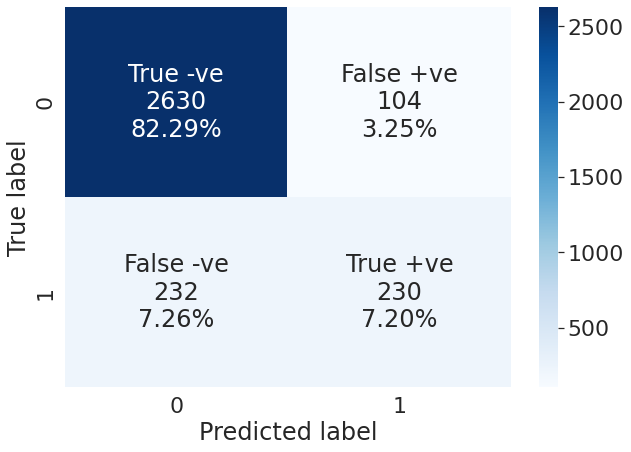

In [294]:
Dt.fit(X_train_mobile, y_train_mobile) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile, y_predict)

In [295]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7298979976375735

In [296]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7298979976375735

Text(0.5, 0, 'False Positive Rate')

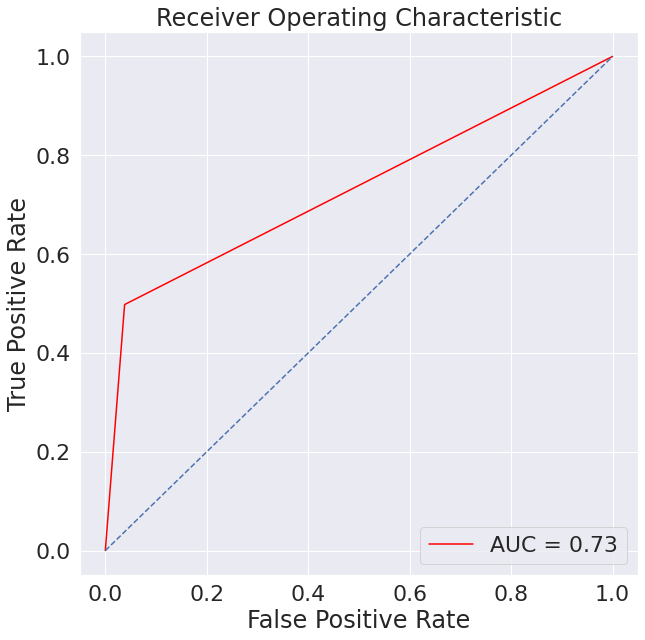

In [297]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [298]:
scores(Dt)

Accuracy on training set :  0.9369635193133047
Accuracy on test set :  0.8948685857321652

Recall on training set :  0.6442141623488774
Recall on test set :  0.49783549783549785

Precision on training set :  0.927860696517413
Precision on test set :  0.688622754491018

F1 on training set :  0.7604485219164119
F1 on test set :  0.577889447236181


### **Random Forest Classifier**

In [299]:
from sklearn.ensemble import RandomForestClassifier

In [300]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_mobile,y_train_mobile)


RandomForestClassifier(random_state=25)

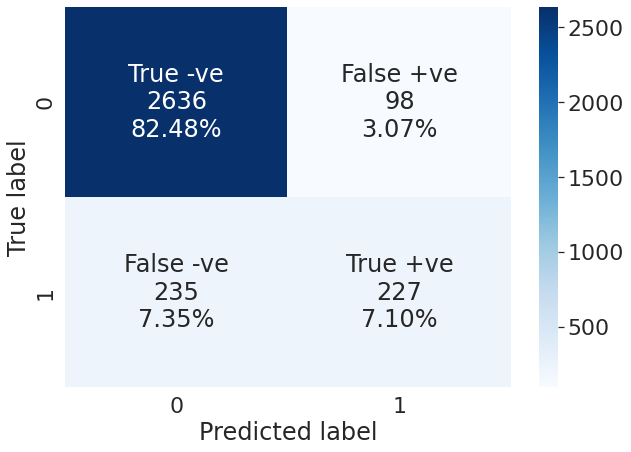

In [301]:
y_predict = random_forest.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [302]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7277485377339071

In [303]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7277485377339071

Text(0.5, 0, 'False Positive Rate')

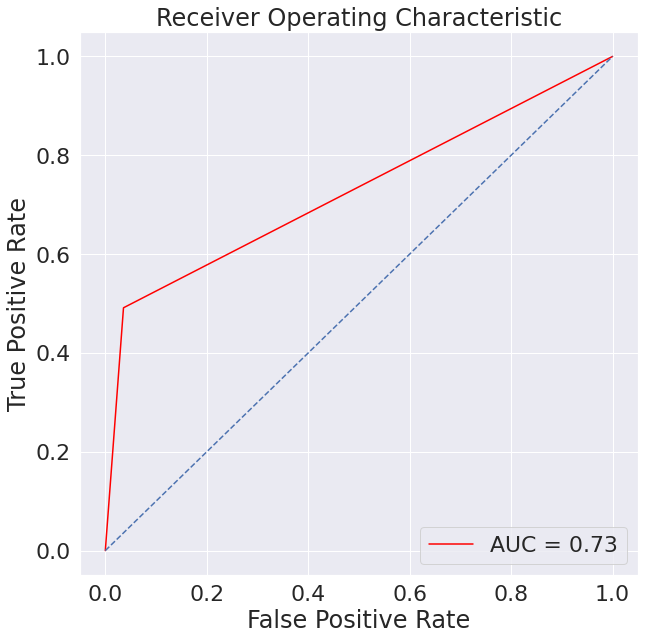

In [304]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [305]:
scores(random_forest)

Accuracy on training set :  0.9369635193133047
Accuracy on test set :  0.8958072590738423

Recall on training set :  0.6761658031088082
Recall on test set :  0.49134199134199136

Precision on training set :  0.8917995444191344
Precision on test set :  0.6984615384615385

F1 on training set :  0.7691552062868369
F1 on test set :  0.576874205844981


* Random Forest classifier is also overfitting for the training set and the F1 score metric has also reduced.


**Random Forest Classifier with weights**

In [306]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_mobile,y_train_mobile)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

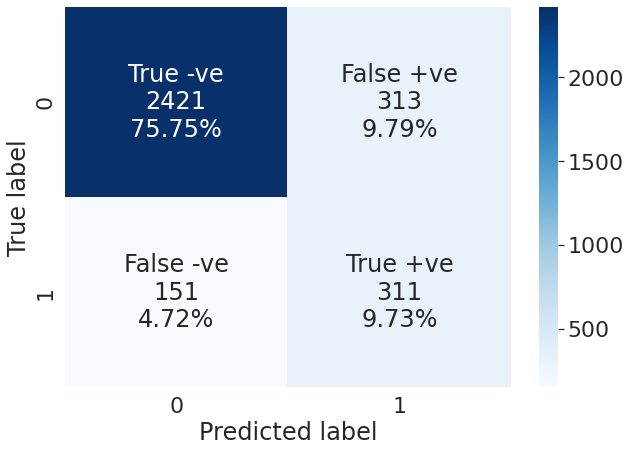

In [307]:
y_predict = random_forest_wt.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [308]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.779337950515712

In [309]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.779337950515712

Text(0.5, 0, 'False Positive Rate')

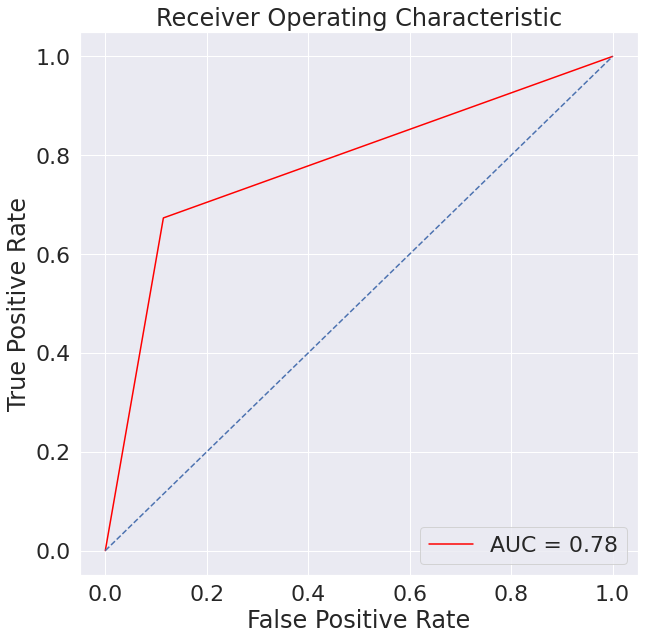

In [310]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [311]:
scores(random_forest_wt)

Accuracy on training set :  0.9065182403433476
Accuracy on test set :  0.8548185231539425

Recall on training set :  0.883419689119171
Recall on test set :  0.6731601731601732

Precision on training set :  0.6454258675078864
Precision on test set :  0.4983974358974359

F1 on training set :  0.7458986511119213
F1 on test set :  0.572744014732965


* There is no improvement in the metrics for the weighted Random Forest classifier.


### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [312]:
from sklearn.model_selection import GridSearchCV

In [313]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_mobile, y_train_mobile)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=10,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=25)

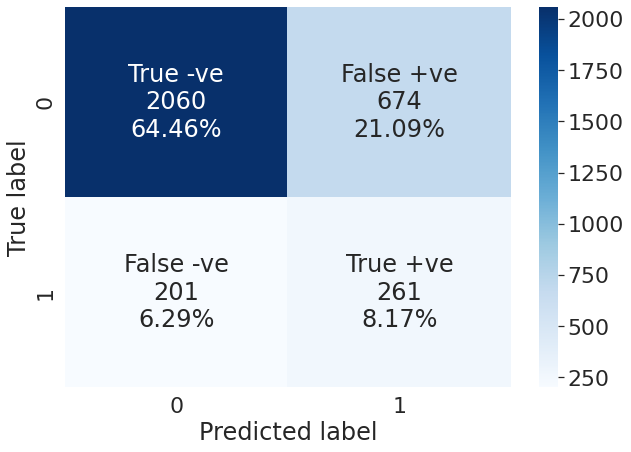

In [314]:
y_predict = classifier.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile,y_predict) 


In [315]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6592049135940871

In [316]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6592049135940871

Text(0.5, 0, 'False Positive Rate')

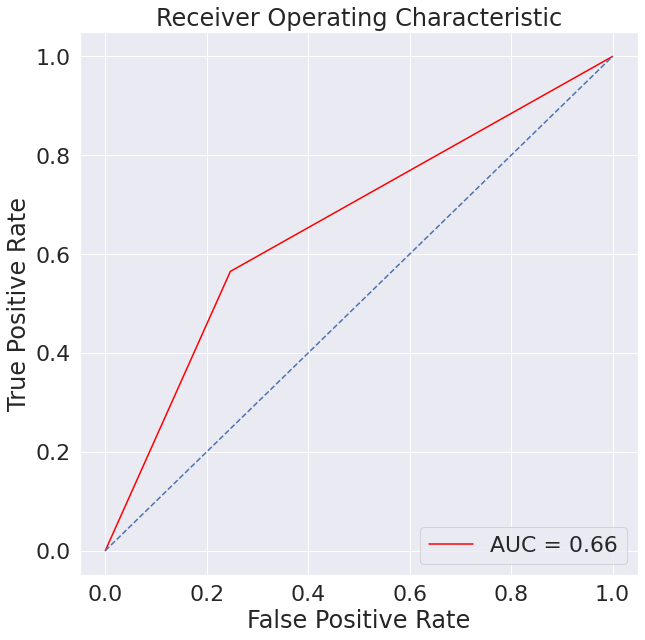

In [317]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [318]:
scores(classifier)

Accuracy on training set :  0.7321620171673819
Accuracy on test set :  0.7262202753441802

Recall on training set :  0.5880829015544041
Recall on test set :  0.564935064935065

Precision on training set :  0.30940481599273056
Precision on test set :  0.279144385026738

F1 on training set :  0.405477820779994
F1 on test set :  0.3736578382247674


* The F1Score has decreased to 0.38 for Train set and 0.37 for test set. 

In [319]:
X_train_mobile['yearly_avg_Outstation_checkins'] = X_train_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_train_mobile['member_in_family'] = X_train_mobile['member_in_family'].astype('int')
X_test_mobile['yearly_avg_Outstation_checkins'] = X_test_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_test_mobile['member_in_family'] = X_test_mobile['member_in_family'].astype('int')

Boosting Model:


**XGBoost Classifier**

In [320]:
from xgboost import XGBClassifier

In [321]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_mobile,y_train_mobile)

XGBClassifier(eval_metric='logloss', random_state=25)

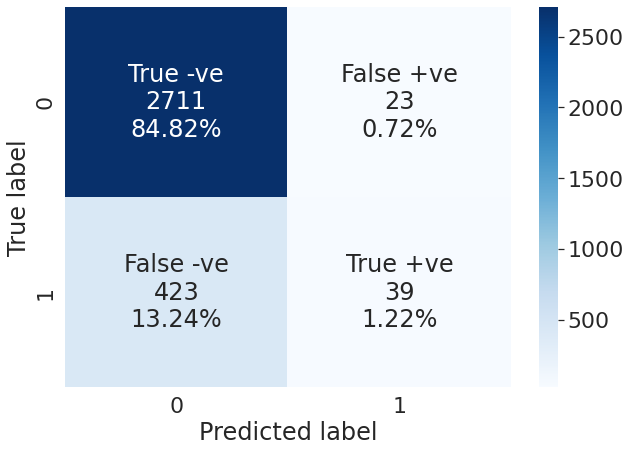

In [322]:
y_predict = XG_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [323]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5380015010592919

In [324]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5380015010592919

Text(0.5, 0, 'False Positive Rate')

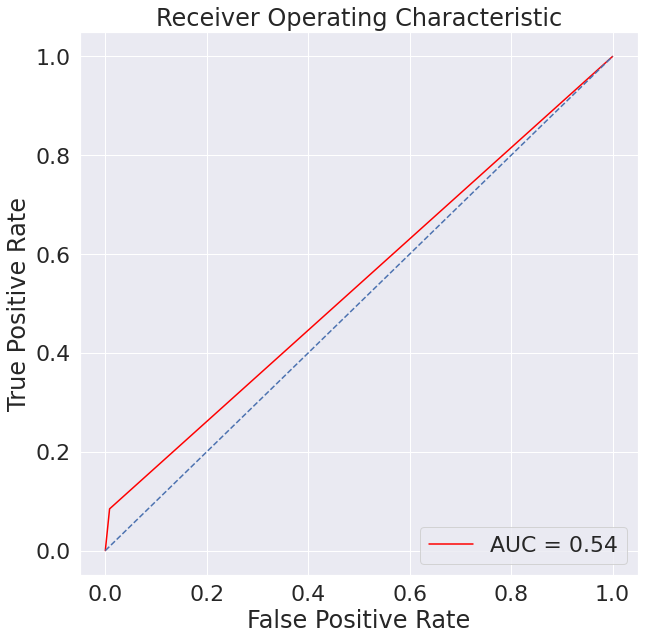

In [325]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [326]:
scores(XG_boost)

Accuracy on training set :  0.85568669527897
Accuracy on test set :  0.860450563204005

Recall on training set :  0.10276338514680483
Recall on test set :  0.08441558441558442

Precision on training set :  0.7628205128205128
Precision on test set :  0.6290322580645161

F1 on training set :  0.18112633181126334
F1 on test set :  0.14885496183206107





### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [327]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_mobile, y_train_mobile)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', learning_rate=0.55, n_estimators=50,
              random_state=25, subsample=0.6)

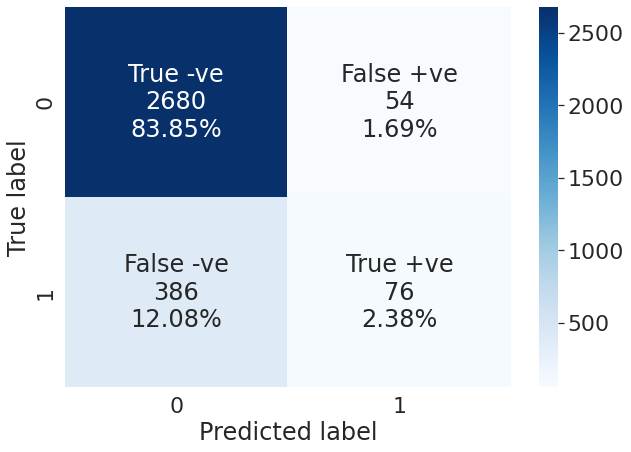

In [328]:
y_predict = xgb_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)


In [329]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5723754421632988

In [330]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5723754421632988

Text(0.5, 0, 'False Positive Rate')

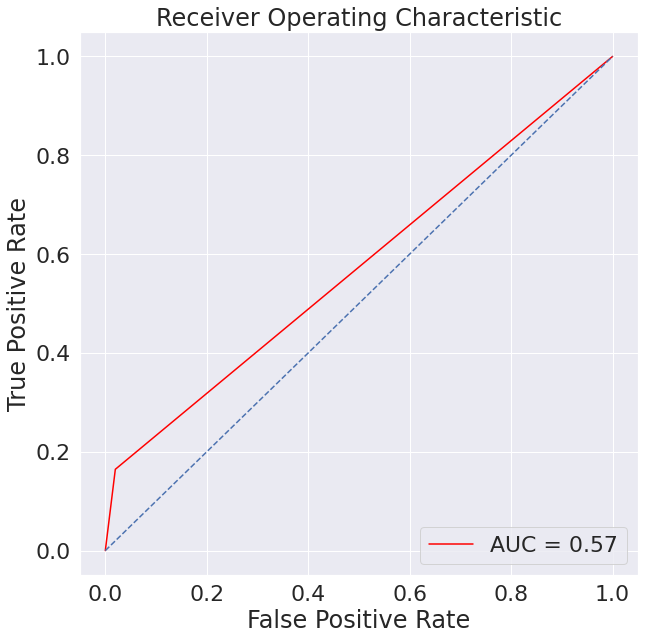

In [331]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [332]:
scores(xgb_tuned)

Accuracy on training set :  0.8606491416309013
Accuracy on test set :  0.8623279098873592

Recall on training set :  0.18134715025906736
Recall on test set :  0.1645021645021645

Precision on training set :  0.6976744186046512
Precision on test set :  0.5846153846153846

F1 on training set :  0.2878684030157642
F1 on test set :  0.2567567567567568


* The accuracy and F1score has increased.

In [333]:
from sklearn.linear_model import LogisticRegression

In [334]:
logreg = LogisticRegression()
logreg.fit(X_train_mobile, y_train_mobile)

LogisticRegression()

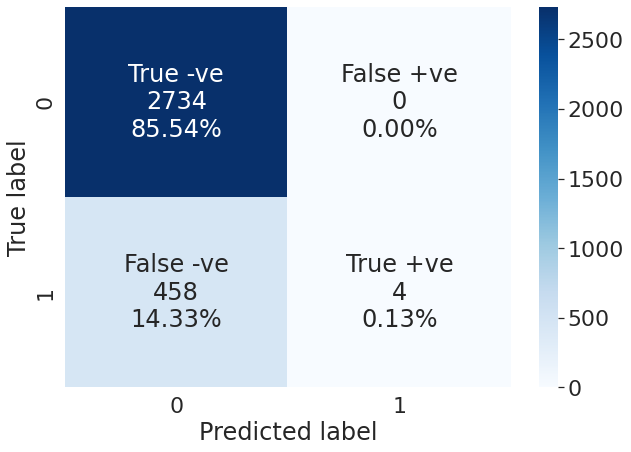

In [335]:
y_predict = logreg.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [336]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5043290043290043

In [337]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5043290043290043

Text(0.5, 0, 'False Positive Rate')

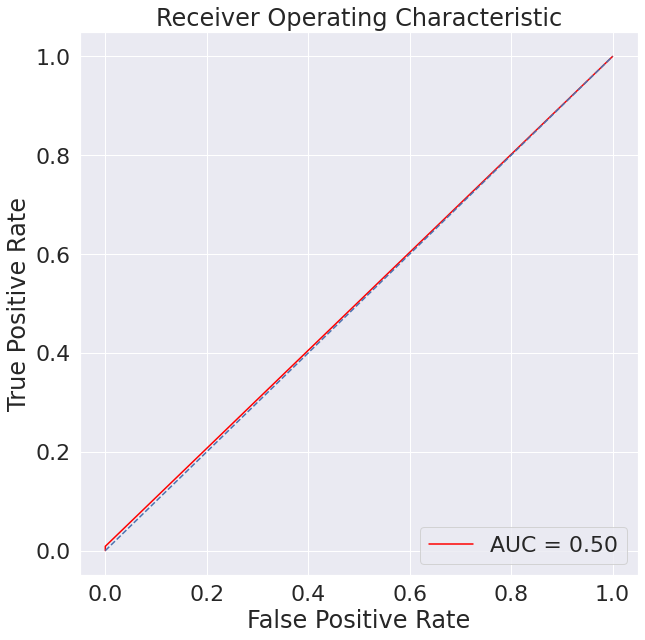

In [338]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [339]:
scores(logreg)

Accuracy on training set :  0.8453594420600858
Accuracy on test set :  0.8566958698372966

Recall on training set :  0.004317789291882556
Recall on test set :  0.008658008658008658

Precision on training set :  1.0
Precision on test set :  1.0

F1 on training set :  0.008598452278589854
F1 on test set :  0.017167381974248927


In [340]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_mobile, y_test_mobile)))


Accuracy of logistic regression classifier on test set: 0.86


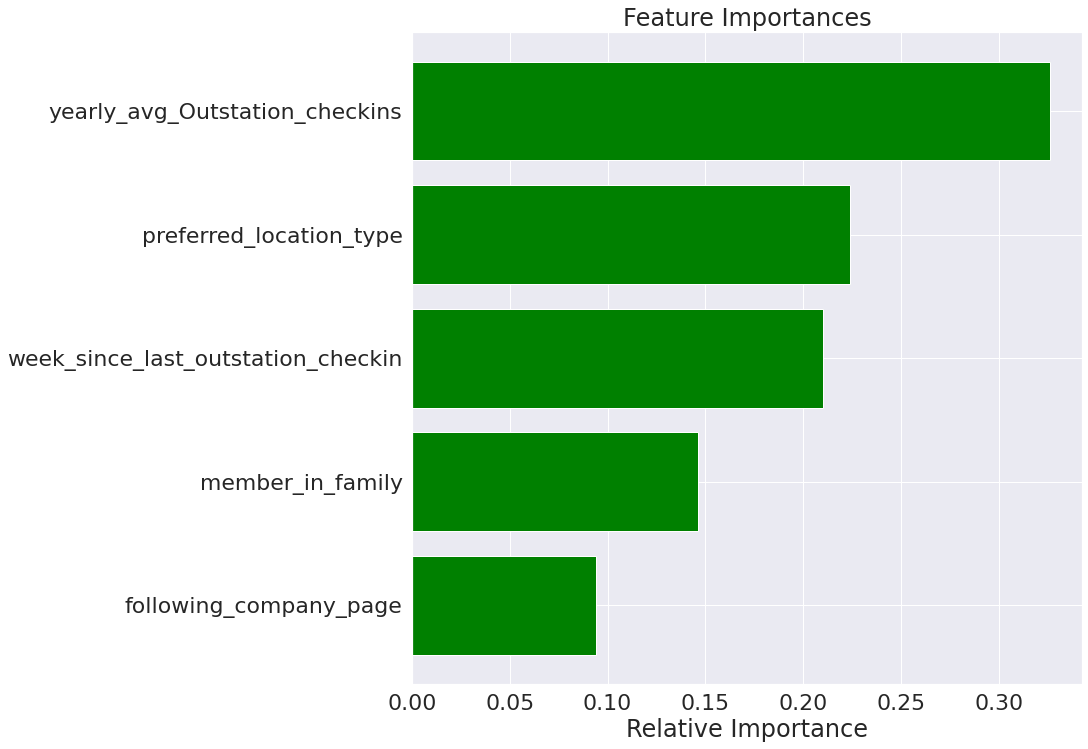

In [341]:
feature_names = X_train_mobile.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [342]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5043290043290043

In [343]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5043290043290043

Text(0.5, 0, 'False Positive Rate')

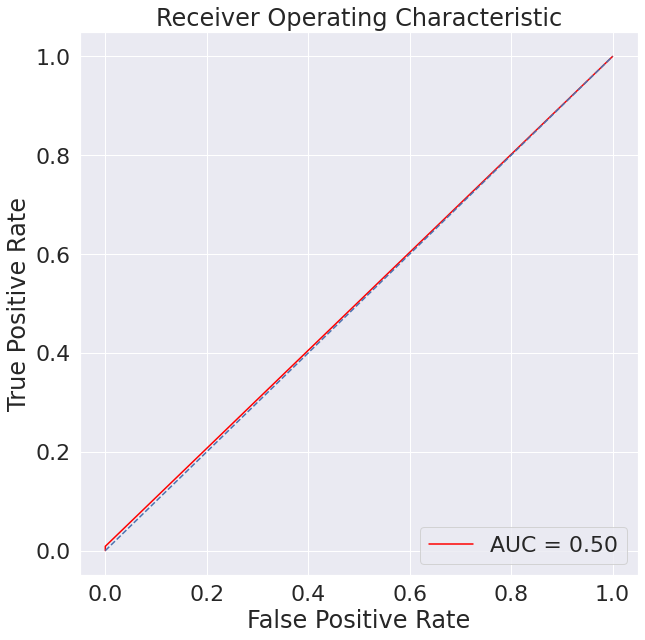

In [344]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [345]:
scores(random_forest) #peformance scores for Random Forest

Accuracy on training set :  0.9369635193133047
Accuracy on test set :  0.8958072590738423

Recall on training set :  0.6761658031088082
Recall on test set :  0.49134199134199136

Precision on training set :  0.8917995444191344
Precision on test set :  0.6984615384615385

F1 on training set :  0.7691552062868369
F1 on test set :  0.576874205844981


## ADA Boost

In [346]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

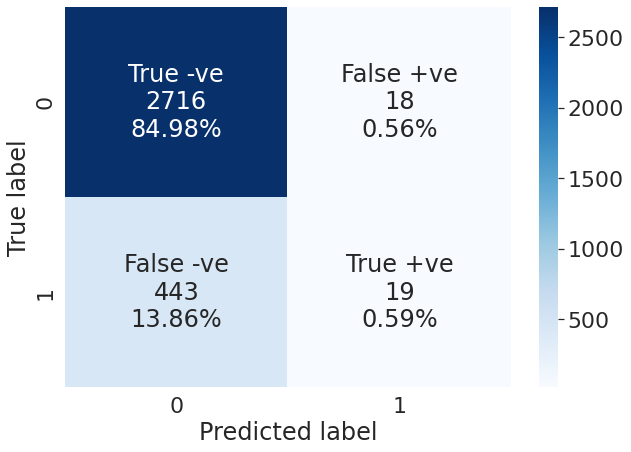

In [347]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_mobile, y_train_mobile)
y_pred = Ada_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_pred)

In [348]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5043290043290043

In [349]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5043290043290043

Text(0.5, 0, 'False Positive Rate')

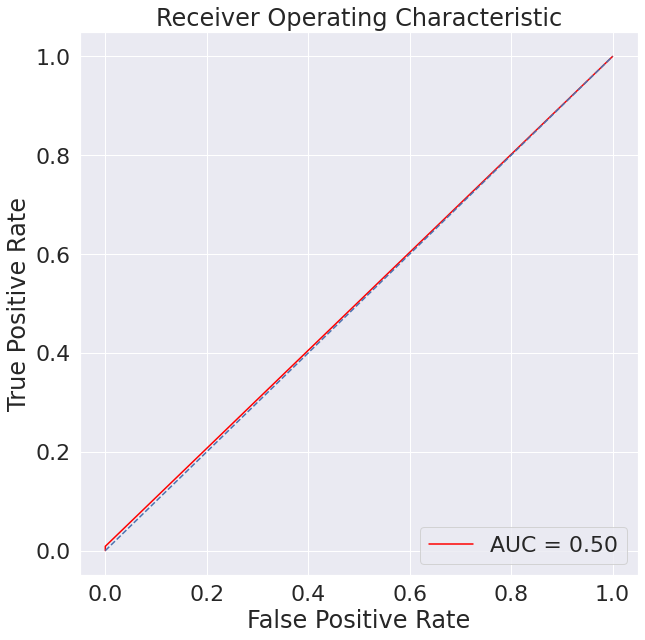

In [350]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [351]:
scores(Ada_boost)

Accuracy on training set :  0.8472371244635193
Accuracy on test set :  0.8557571964956195

Recall on training set :  0.04231433506044905
Recall on test set :  0.04112554112554113

Precision on training set :  0.620253164556962
Precision on test set :  0.5135135135135135

F1 on training set :  0.07922392886014552
F1 on test set :  0.07615230460921844


## Gradient Boost Classifier

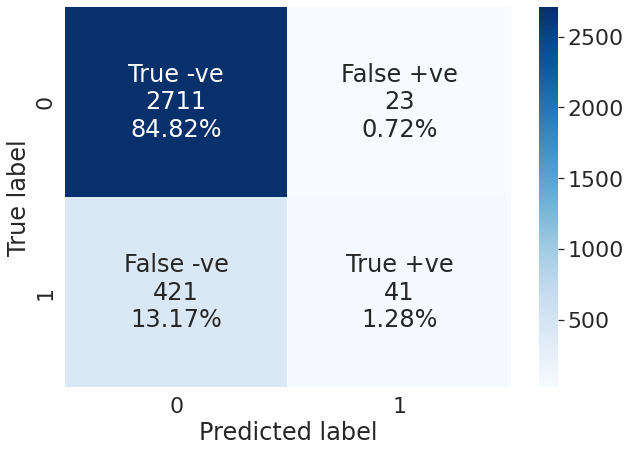

In [352]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [353]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.540166003223794

In [354]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.540166003223794

Text(0.5, 0, 'False Positive Rate')

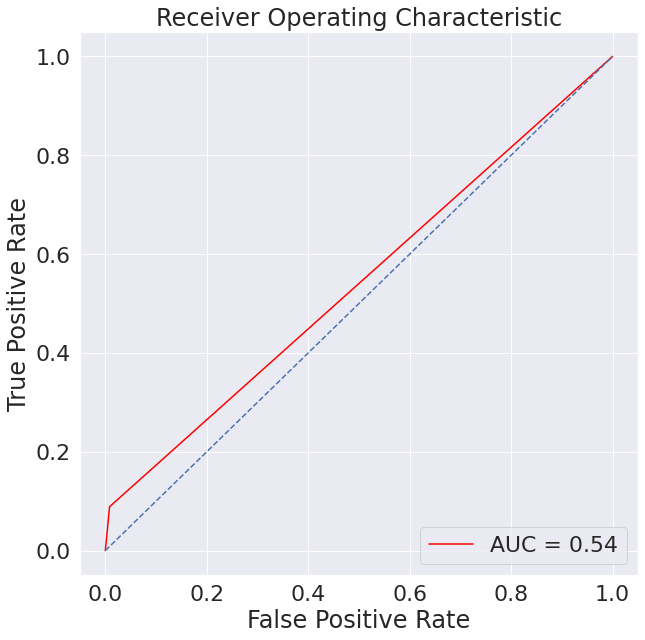

In [355]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [356]:
scores(Grad_boost)

Accuracy on training set :  0.8583690987124464
Accuracy on test set :  0.8610763454317898

Recall on training set :  0.1234887737478411
Recall on test set :  0.08874458874458875

Precision on training set :  0.7771739130434783
Precision on test set :  0.640625

F1 on training set :  0.21311475409836067
F1 on test set :  0.155893536121673


## Gradient Boost with ADABoost classifier

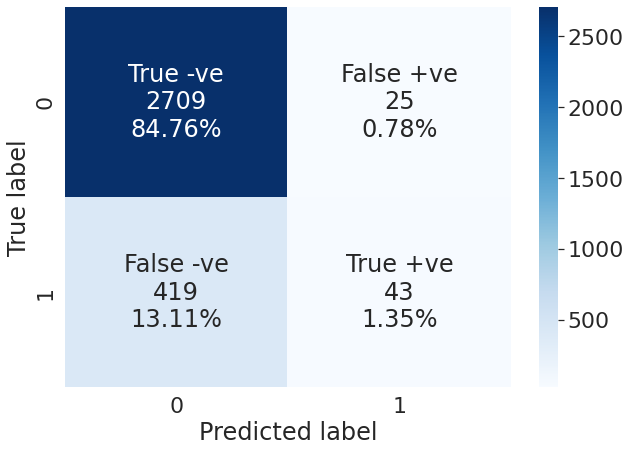

In [357]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost_ada.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [358]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5419647409406005

In [359]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5419647409406005

Text(0.5, 0, 'False Positive Rate')

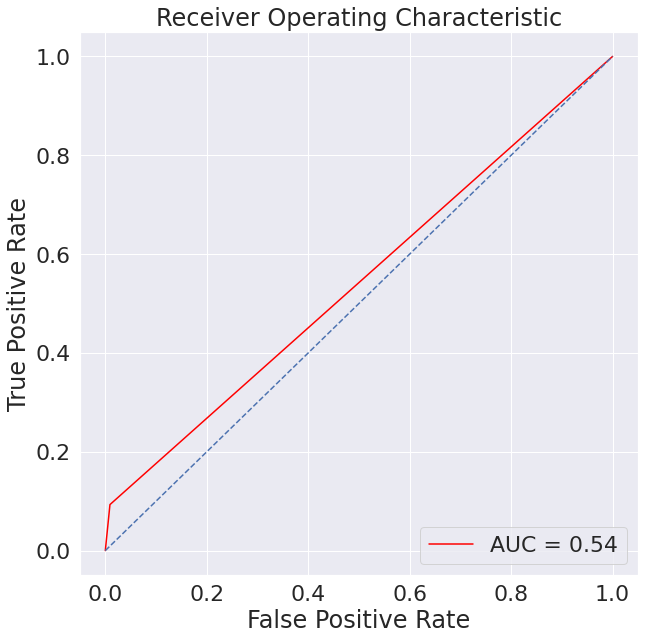

In [360]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [361]:
scores(Grad_boost_ada)

Accuracy on training set :  0.8589055793991416
Accuracy on test set :  0.8610763454317898

Recall on training set :  0.12694300518134716
Recall on test set :  0.09307359307359307

Precision on training set :  0.7819148936170213
Precision on test set :  0.6323529411764706

F1 on training set :  0.21842496285289748
F1 on test set :  0.16226415094339622


## Bagging Classifier

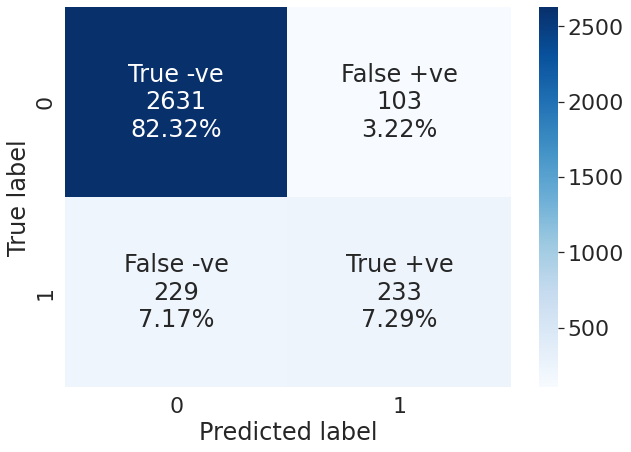

In [362]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_mobile, y_train_mobile)
y_predict = bagging.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [363]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7333276331081744

In [364]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7333276331081744

Text(0.5, 0, 'False Positive Rate')

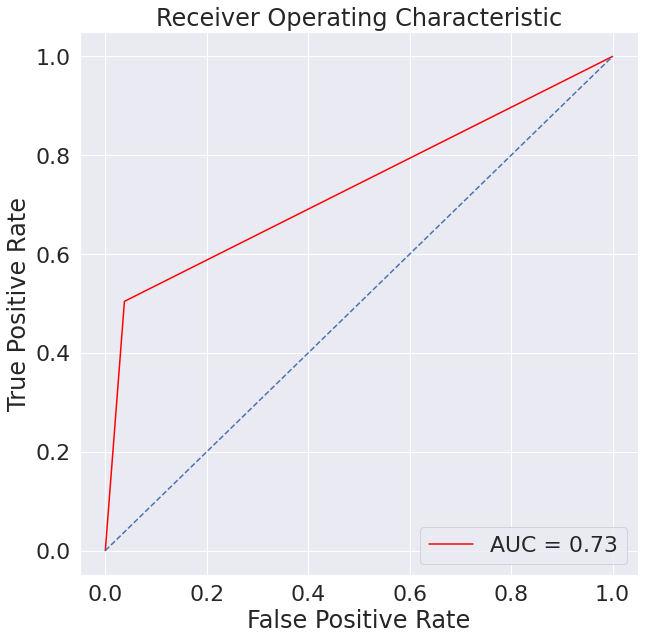

In [365]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [366]:
scores(bagging)

Accuracy on training set :  0.9344152360515021
Accuracy on test set :  0.8961201501877347

Recall on training set :  0.6640759930915371
Recall on test set :  0.5043290043290043

Precision on training set :  0.8849252013808976
Precision on test set :  0.6934523809523809

F1 on training set :  0.7587567834237791
F1 on test set :  0.5839598997493733


### Hyperparameters for Bagging Classifier

In [367]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_mobile, y_train_mobile)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=25)

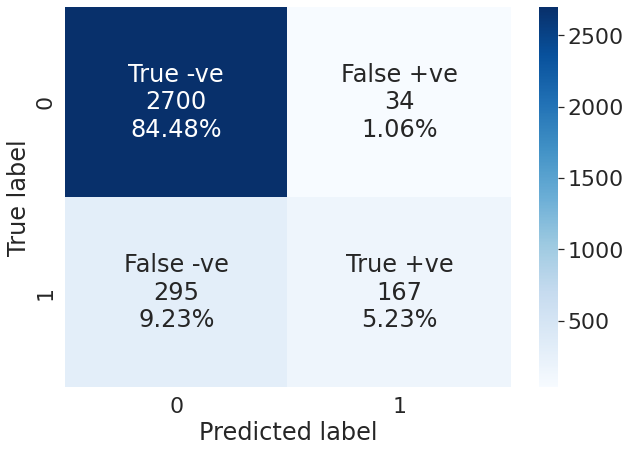

In [368]:
y_predict = bagging_estimator_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [369]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6745179351251042

In [370]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6745179351251042

Text(0.5, 0, 'False Positive Rate')

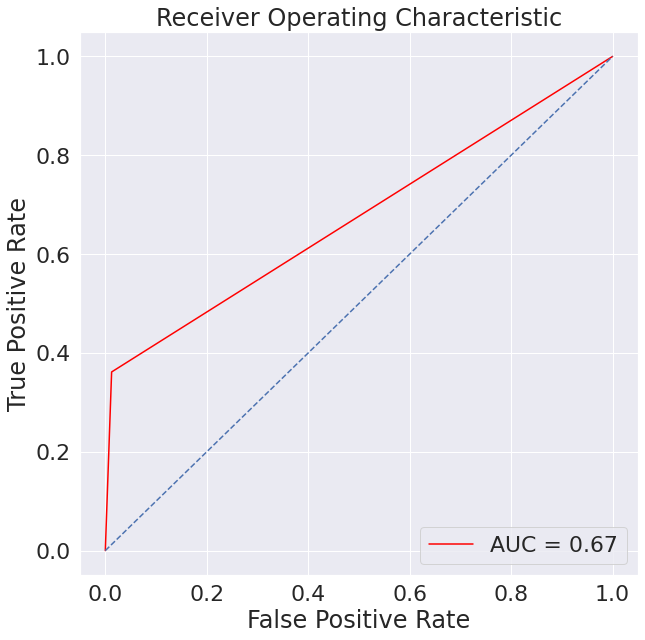

In [371]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [372]:
scores(bagging_estimator_tuned)

Accuracy on training set :  0.918857296137339
Accuracy on test set :  0.8970588235294118

Recall on training set :  0.49222797927461137
Recall on test set :  0.36147186147186144

Precision on training set :  0.9710391822827938
Precision on test set :  0.8308457711442786

F1 on training set :  0.653295128939828
F1 on test set :  0.5037707390648567


## Linear Discriminant Analysis

In [373]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_mobile, y_train_mobile)

LinearDiscriminantAnalysis()

In [374]:
lda.explained_variance_ratio_

array([1.])

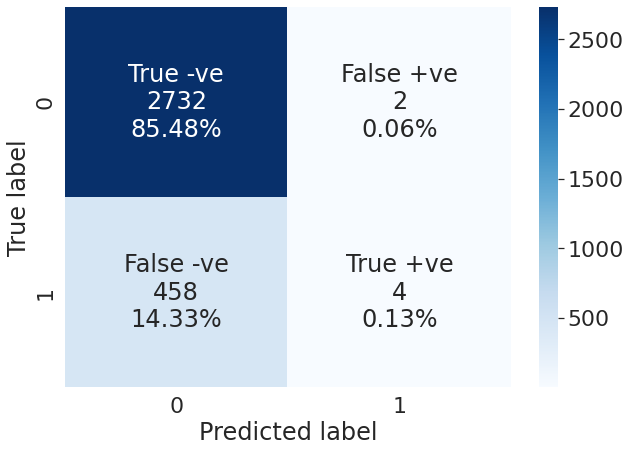

In [375]:
y_predict = lda.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [376]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5039632398813085

In [377]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5039632398813085

Text(0.5, 0, 'False Positive Rate')

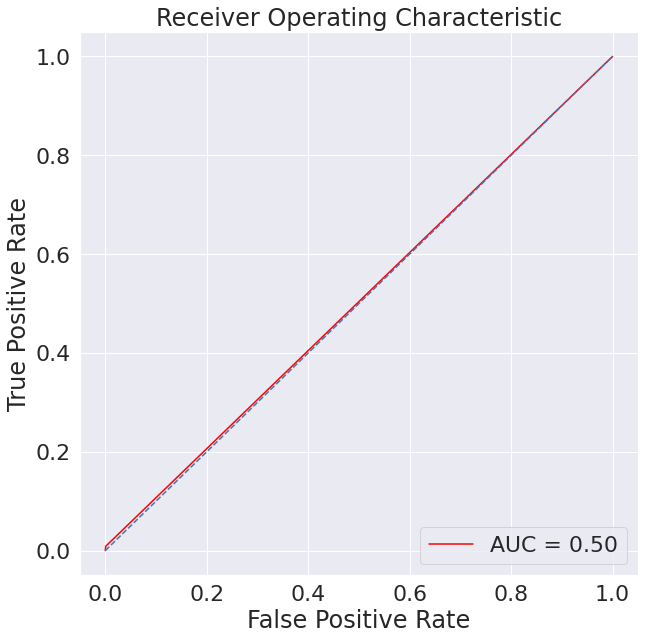

In [378]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [379]:
scores(lda)

Accuracy on training set :  0.845225321888412
Accuracy on test set :  0.8560700876095119

Recall on training set :  0.0069084628670120895
Recall on test set :  0.008658008658008658

Precision on training set :  0.6666666666666666
Precision on test set :  0.6666666666666666

F1 on training set :  0.013675213675213675
F1 on test set :  0.017094017094017092


## KNN Classifier

In [380]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_mobile, y_test_mobile) 


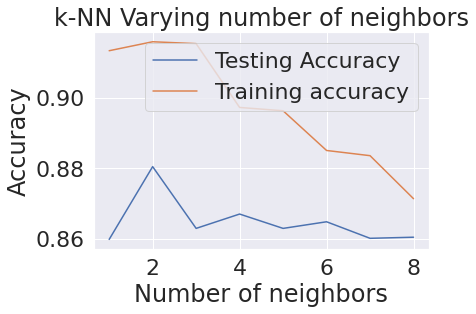

In [381]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [382]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [383]:
#Fit the model
knn.fit(X_train_mobile,y_train_mobile)

KNeighborsClassifier(n_neighbors=7)

In [384]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_mobile,y_test_mobile)

0.8601376720901126

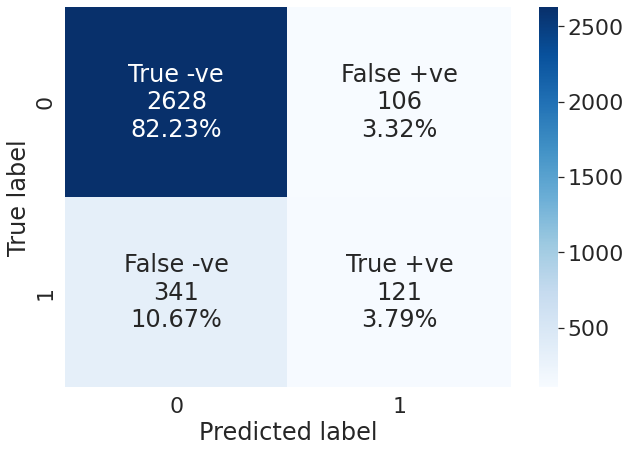

In [385]:
y_predict = knn.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [386]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6115668652245098

In [387]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6115668652245098

Text(0.5, 0, 'False Positive Rate')

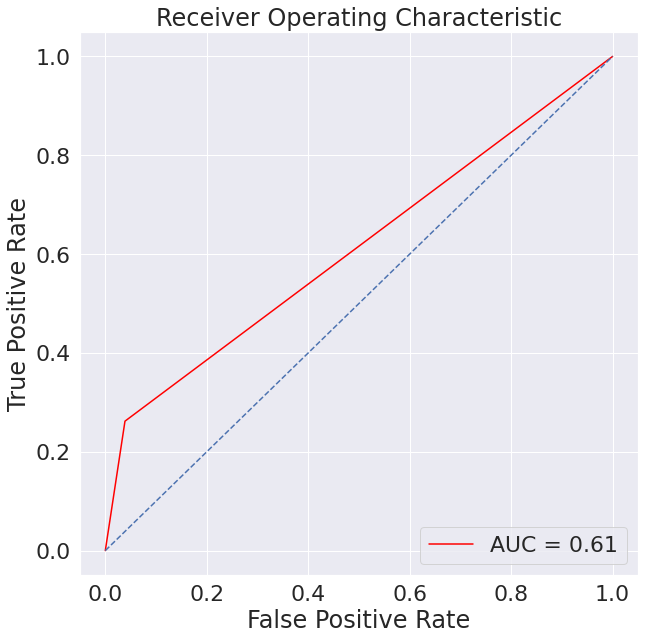

In [388]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [389]:
scores(knn)

Accuracy on training set :  0.8835836909871244
Accuracy on test set :  0.8601376720901126

Recall on training set :  0.3791018998272884
Recall on test set :  0.2619047619047619

Precision on training set :  0.7465986394557823
Precision on test set :  0.5330396475770925

F1 on training set :  0.5028636884306987
F1 on test set :  0.35123367198838895


## Naive Bayes Classifier

In [390]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_mobile, y_train_mobile)

GaussianNB()

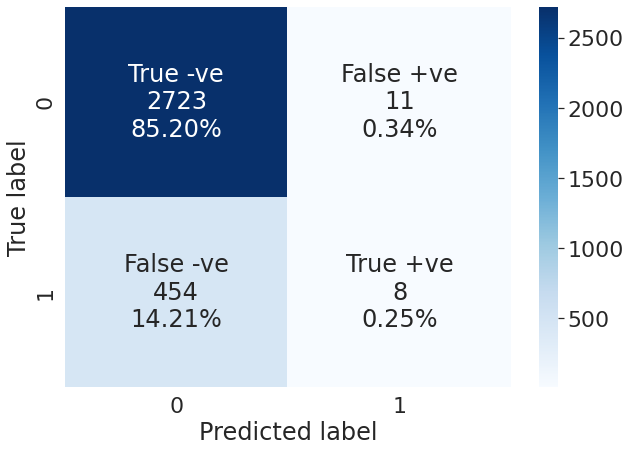

In [391]:
y_predict = gnb.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [392]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5066463041956825

In [393]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5066463041956825

Text(0.5, 0, 'False Positive Rate')

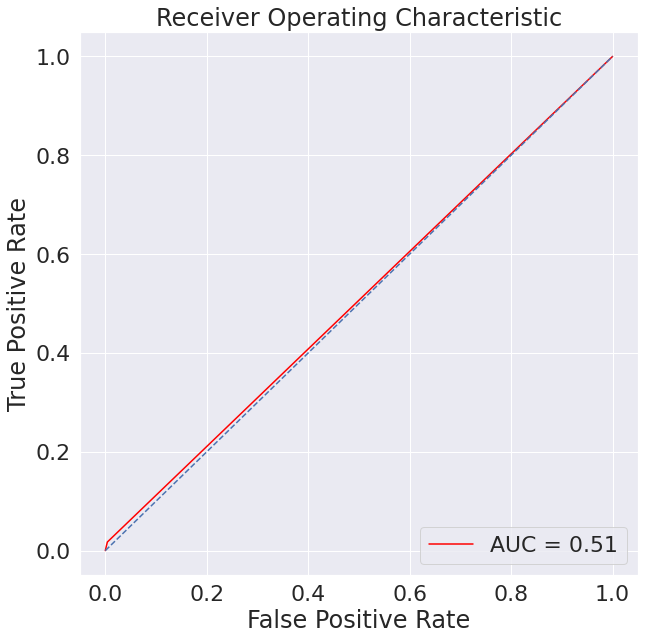

In [394]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [395]:
scores(gnb)

Accuracy on training set :  0.8445547210300429
Accuracy on test set :  0.85450563204005

Recall on training set :  0.017271157167530225
Recall on test set :  0.017316017316017316

Precision on training set :  0.4878048780487805
Precision on test set :  0.42105263157894735

F1 on training set :  0.03336113427856547
F1 on test set :  0.033264033264033266


In [396]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [397]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  ...  Train_F1-Score  Test_F1-Score
9                      Bagging        0.934415  ...        0.758757       0.583960
0                Decision Tree        0.936964  ...        0.760449       0.577889
2                Random Forest        0.936964  ...        0.769155       0.576874
10     Bagging estimator tuned        0.918857  ...        0.653295       0.503771
1          Tuned Decision Tree        0.732162  ...        0.405478       0.373658
12                         KNN        0.883584  ...        0.502864       0.351234
4     Tuned XGBoost Classifier        0.860649  ...        0.287868       0.256757
8       Gradient and Ada Boost        0.858906  ...        0.218425       0.162264
7               Gradient boost        0.858369  ...        0.213115       0.155894
3           XGBoost Classifier        0.855687  ...        0.181126       0.148855
6                    Ada boost        0.847237  ...        0.079224       0.076152
13      Naive Bayes Classifier        0.844555  ...        0.033361       0.033264
5          Logistic Regression        0.845359  ...        0.008598       0.017167
11  Linear Discrimant Analysis        0.845225  ...        0.013675       0.017094

[14 rows x 5 columns]

In [398]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Train_Accuracy  ...  Train_F1-Score  Test_F1-Score
10     Bagging estimator tuned        0.918857  ...        0.653295       0.503771
9                      Bagging        0.934415  ...        0.758757       0.583960
2                Random Forest        0.936964  ...        0.769155       0.576874
0                Decision Tree        0.936964  ...        0.760449       0.577889
4     Tuned XGBoost Classifier        0.860649  ...        0.287868       0.256757
7               Gradient boost        0.858369  ...        0.213115       0.155894
8       Gradient and Ada Boost        0.858906  ...        0.218425       0.162264
3           XGBoost Classifier        0.855687  ...        0.181126       0.148855
12                         KNN        0.883584  ...        0.502864       0.351234
5          Logistic Regression        0.845359  ...        0.008598       0.017167
11  Linear Discrimant Analysis        0.845225  ...        0.013675       0.017094
6                    Ada boost        0.847237  ...        0.079224       0.076152
13      Naive Bayes Classifier        0.844555  ...        0.033361       0.033264
1          Tuned Decision Tree        0.732162  ...        0.405478       0.373658

[14 rows x 5 columns]

## **Model training for Laptop.**

In [399]:
df_laptop.corr()

Taken_product  ...  following_company_page
Taken_product                            1.000000  ...                0.262993
preferred_location_type                  0.039108  ...                0.007902
Yearly_avg_comment_on_travel_page        0.041578  ...               -0.034019
week_since_last_outstation_checkin       0.047308  ...                0.011444
following_company_page                   0.262993  ...                1.000000

[5 rows x 5 columns]

In [400]:
df_laptop.shape

(1108, 7)

#### Train & Test splits.

In [401]:
train_laptop, test_laptop = train_test_split(df_laptop, test_size=0.3)

In [402]:
train_laptop.shape

(775, 7)

In [403]:
test_laptop.shape

(333, 7)

In [404]:
X_train_laptop = train_laptop.drop(['Taken_product'], axis='columns')
y_train_laptop = train_laptop['Taken_product']
y_train_laptop.head()

8095     0
5928     0
10896    0
11271    1
6166     1
Name: Taken_product, dtype: int64

In [405]:
X_train_laptop.head()

yearly_avg_Outstation_checkins  ... following_company_page
8095                              18  ...                      3
5928                               5  ...                      3
10896                             16  ...                      2
11271                             18  ...                      3
6166                              24  ...                      3

[5 rows x 6 columns]

In [406]:
X_test_laptop = test_laptop.drop(['Taken_product'], axis='columns')
y_test_laptop = test_laptop['Taken_product']
y_test_laptop.head()

9235     1
6413     0
7977     0
10518    0
11458    0
Name: Taken_product, dtype: int64

In [407]:
X_test_laptop.head()

yearly_avg_Outstation_checkins  ... following_company_page
9235                               6  ...                      2
6413                               5  ...                      3
7977                              25  ...                      2
10518                              1  ...                      2
11458                              2  ...                      3

[5 rows x 6 columns]

**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [408]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

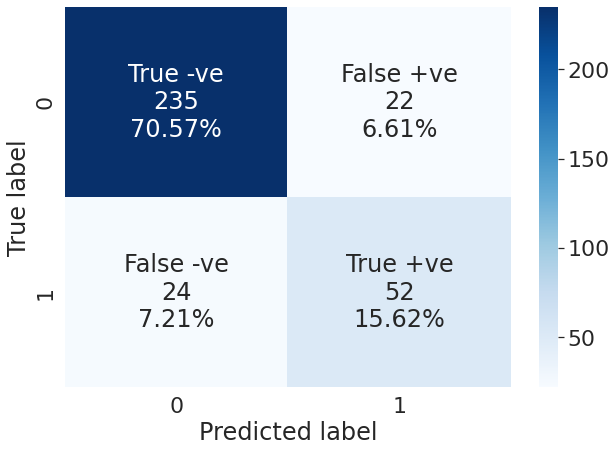

In [409]:
Dt.fit(X_train_laptop, y_train_laptop) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop, y_predict)

In [410]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7993037067376613

In [411]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7993037067376613

Text(0.5, 0, 'False Positive Rate')

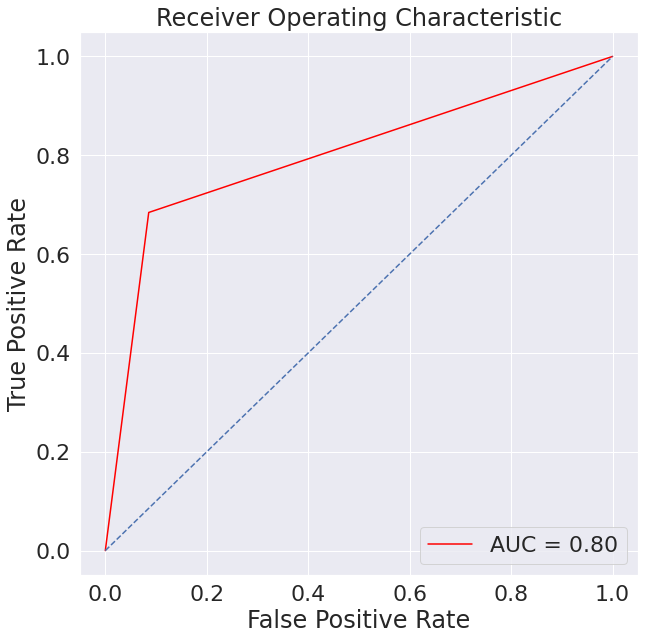

In [412]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [413]:
scores_l(Dt)

Accuracy on training set :  0.9987096774193548
Accuracy on test set :  0.8618618618618619

Recall on training set :  0.995
Recall on test set :  0.6842105263157895

Precision on training set :  1.0
Precision on test set :  0.7027027027027027

F1 on training set :  0.9974937343358395
F1 on test set :  0.6933333333333334


### **Random Forest Classifier**

In [414]:
from sklearn.ensemble import RandomForestClassifier

In [415]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_laptop,y_train_laptop)


RandomForestClassifier(random_state=25)

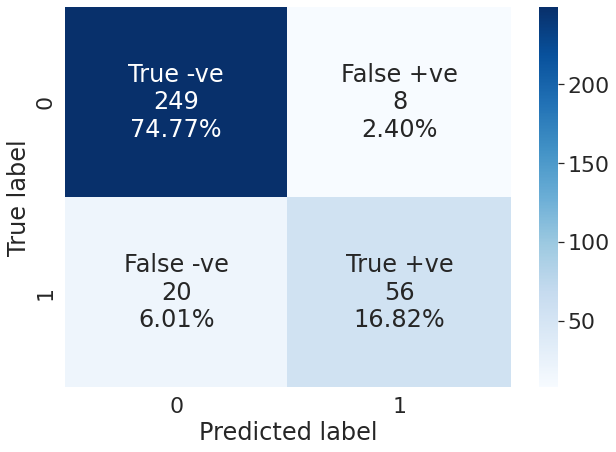

In [416]:
y_predict = random_forest.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [417]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8528568502969487

In [418]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8528568502969487

Text(0.5, 0, 'False Positive Rate')

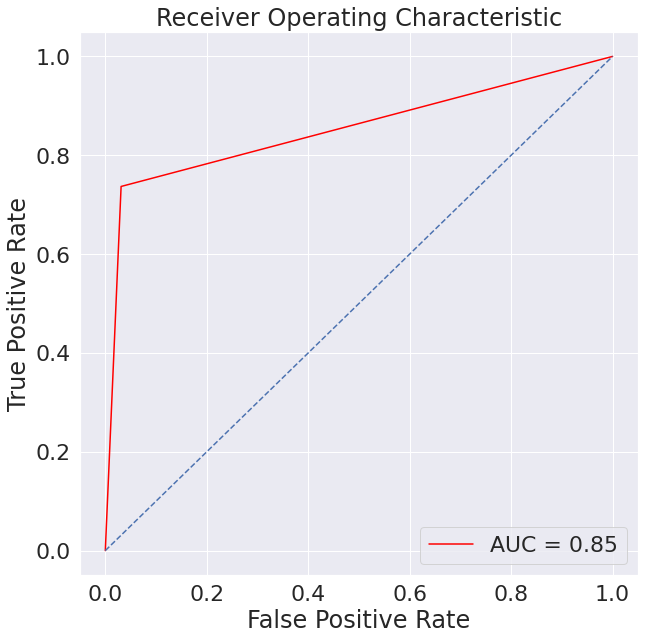

In [419]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [420]:
scores_l(random_forest)

Accuracy on training set :  0.9987096774193548
Accuracy on test set :  0.9159159159159159

Recall on training set :  0.995
Recall on test set :  0.7368421052631579

Precision on training set :  1.0
Precision on test set :  0.875

F1 on training set :  0.9974937343358395
F1 on test set :  0.7999999999999999





**Random Forest Classifier with weights**

In [421]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_laptop,y_train_laptop)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

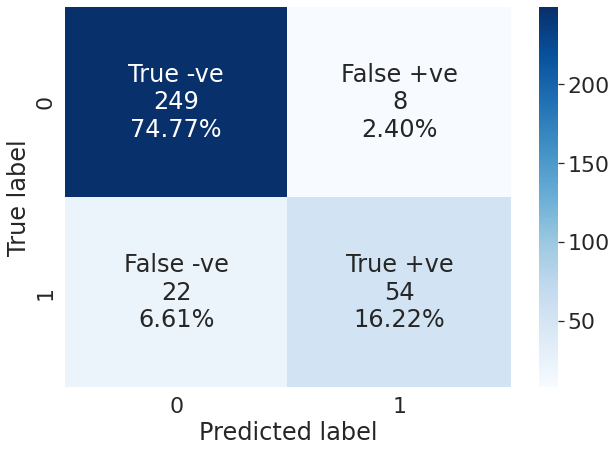

In [422]:
y_predict = random_forest_wt.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [423]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8396989555601064

In [424]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8396989555601064

Text(0.5, 0, 'False Positive Rate')

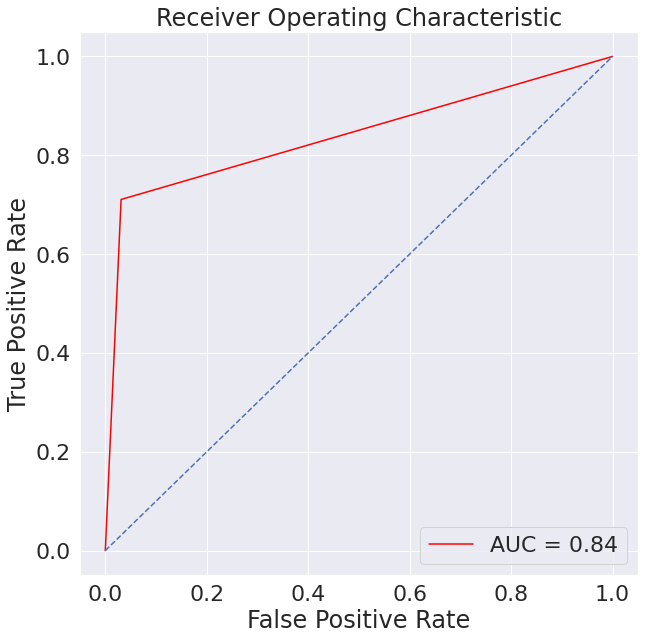

In [425]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [426]:
scores_l(random_forest_wt)

Accuracy on training set :  0.9987096774193548
Accuracy on test set :  0.9099099099099099

Recall on training set :  1.0
Recall on test set :  0.7105263157894737

Precision on training set :  0.9950248756218906
Precision on test set :  0.8709677419354839

F1 on training set :  0.9975062344139651
F1 on test set :  0.782608695652174


* There is little improvement in the metrics for the weighted Random Forest classifier.


## Feature Importance of Random Forest

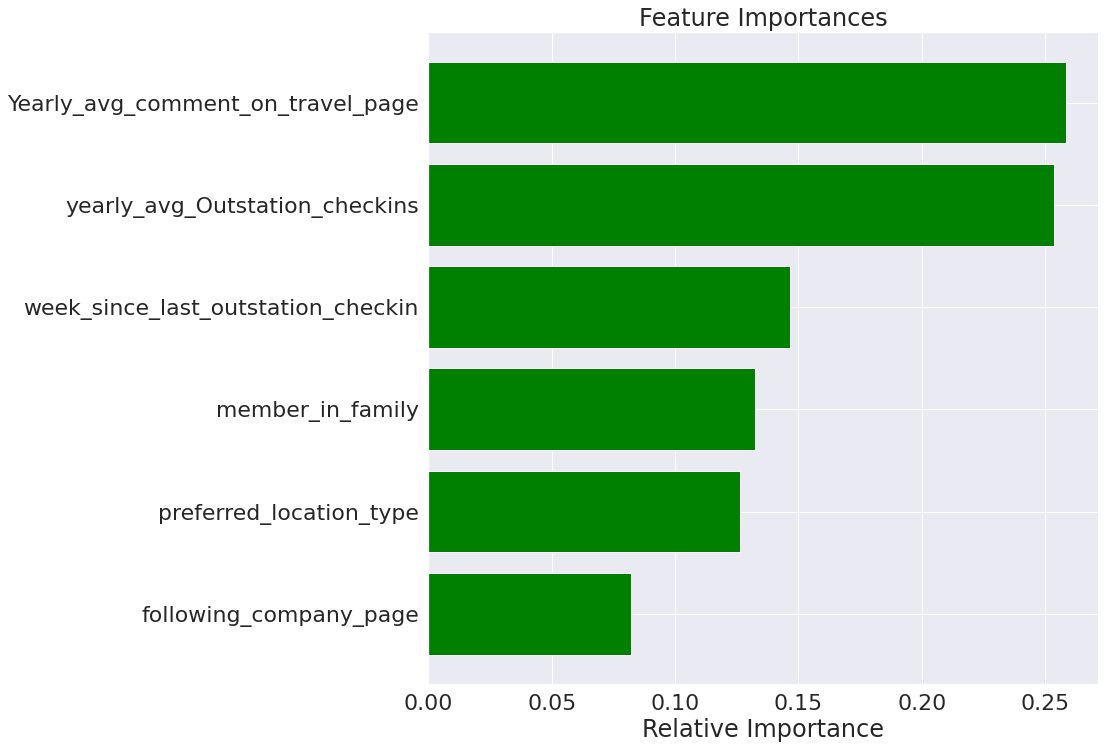

In [427]:
feature_names = X_train_laptop.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()




### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [428]:
from sklearn.model_selection import GridSearchCV

In [429]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_laptop, y_train_laptop)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=10,
                       max_leaf_nodes=15, min_samples_leaf=10, random_state=25)

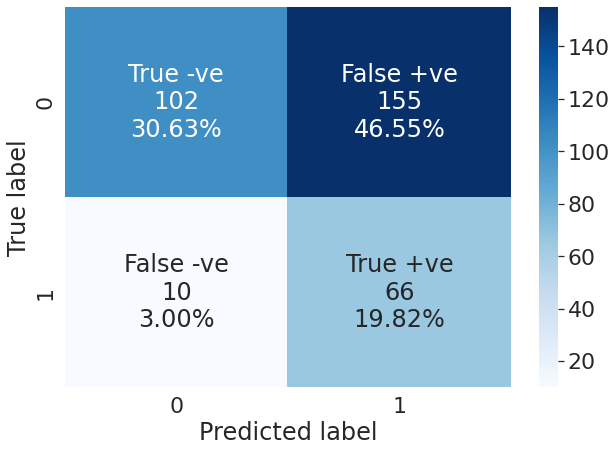

In [430]:
y_predict = classifier.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop,y_predict) 


In [431]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.6326541060823265

In [432]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6326541060823265

Text(0.5, 0, 'False Positive Rate')

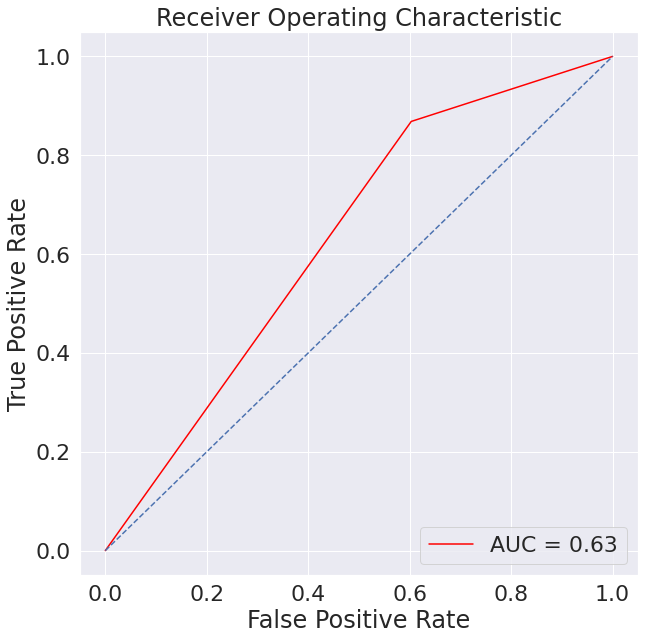

In [433]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [434]:
scores_l(classifier)

Accuracy on training set :  0.5870967741935483
Accuracy on test set :  0.5045045045045045

Recall on training set :  0.945
Recall on test set :  0.868421052631579

Precision on training set :  0.3795180722891566
Precision on test set :  0.2986425339366516

F1 on training set :  0.5415472779369628
F1 on test set :  0.4444444444444445


In [435]:
X_train_laptop['yearly_avg_Outstation_checkins'] = X_train_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_train_laptop['member_in_family'] = X_train_laptop['member_in_family'].astype('int')
X_test_laptop['yearly_avg_Outstation_checkins'] = X_test_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_test_laptop['member_in_family'] = X_test_laptop['member_in_family'].astype('int')

## Boosting Model:


**XGBoost Classifier**

In [436]:
from xgboost import XGBClassifier

In [437]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_laptop,y_train_laptop)

XGBClassifier(eval_metric='logloss', random_state=25)

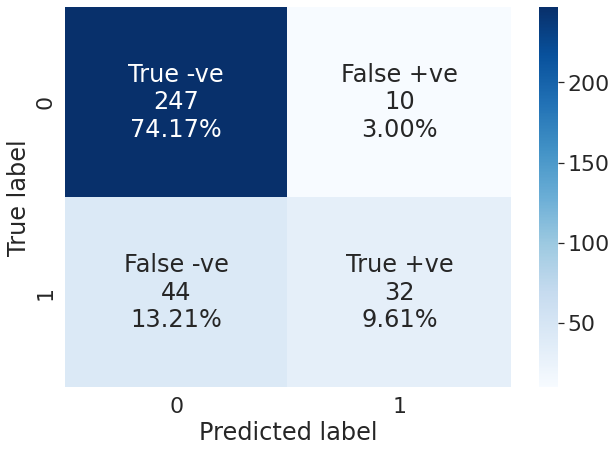

In [438]:
y_predict = XG_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [439]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.6910710628711858

In [440]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6910710628711858

Text(0.5, 0, 'False Positive Rate')

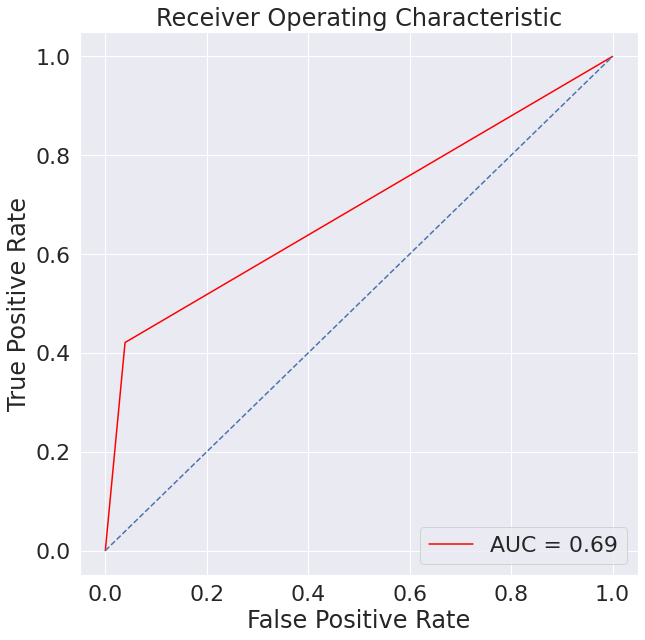

In [441]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [442]:
scores_l(XG_boost)

Accuracy on training set :  0.88
Accuracy on test set :  0.8378378378378378

Recall on training set :  0.58
Recall on test set :  0.42105263157894735

Precision on training set :  0.928
Precision on test set :  0.7619047619047619

F1 on training set :  0.7138461538461538
F1 on test set :  0.5423728813559322





### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [443]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_laptop, y_train_laptop)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.7,
              eval_metric='logloss', learning_rate=0.55, n_estimators=40,
              random_state=25, subsample=0.8)

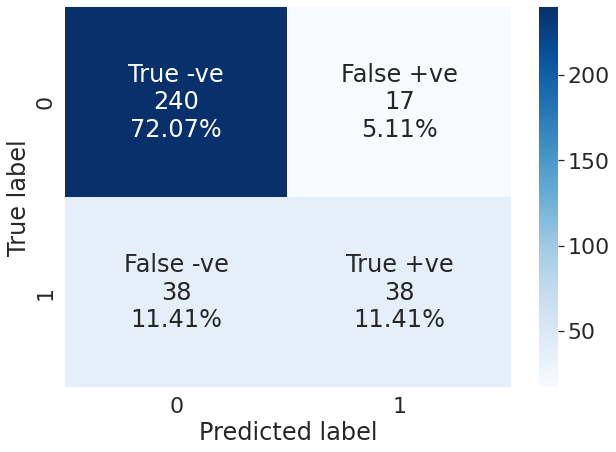

In [444]:
y_predict = xgb_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)


In [445]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7169260700389105

In [446]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7169260700389105

Text(0.5, 0, 'False Positive Rate')

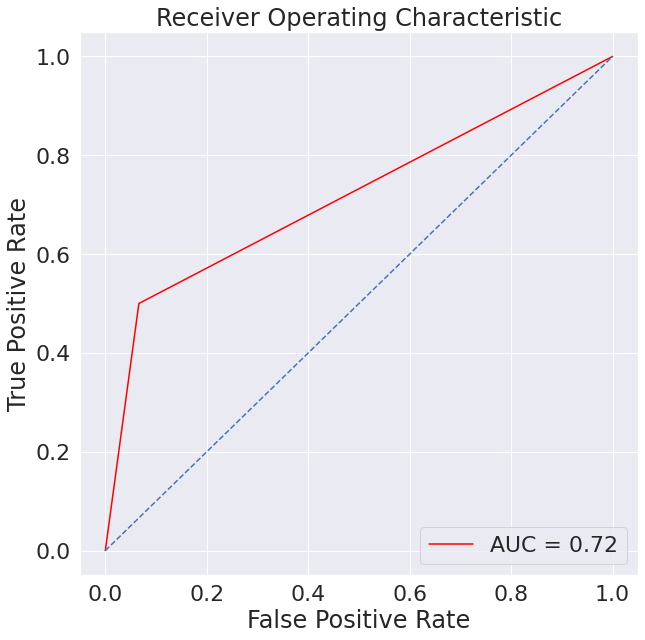

In [447]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [448]:
scores_l(xgb_tuned)

Accuracy on training set :  0.9161290322580645
Accuracy on test set :  0.8348348348348348

Recall on training set :  0.74
Recall on test set :  0.5

Precision on training set :  0.9192546583850931
Precision on test set :  0.6909090909090909

F1 on training set :  0.8199445983379501
F1 on test set :  0.5801526717557252


## Logistic Regression

In [449]:
from sklearn.linear_model import LogisticRegression

In [450]:
logreg = LogisticRegression()
logreg.fit(X_train_laptop, y_train_laptop)

LogisticRegression()

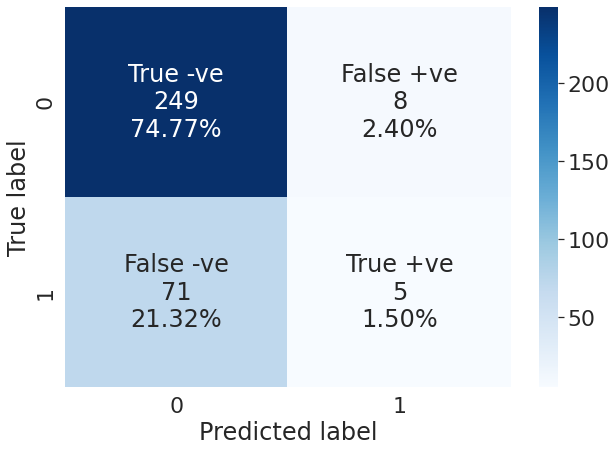

In [451]:
y_predict = logreg.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [452]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5173305345074749

In [453]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5173305345074749

Text(0.5, 0, 'False Positive Rate')

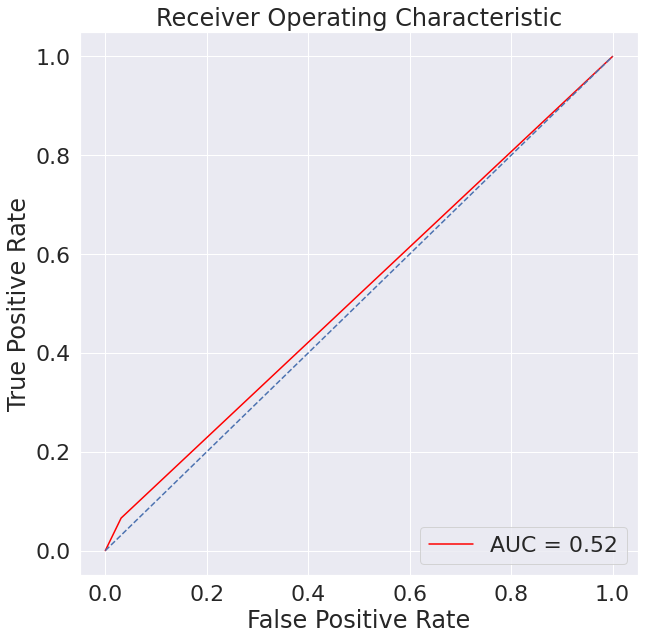

In [454]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [455]:
scores_l(logreg)

Accuracy on training set :  0.7638709677419355
Accuracy on test set :  0.7627627627627628

Recall on training set :  0.14
Recall on test set :  0.06578947368421052

Precision on training set :  0.717948717948718
Precision on test set :  0.38461538461538464

F1 on training set :  0.23430962343096237
F1 on test set :  0.11235955056179775


In [456]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_laptop, y_test_laptop)))


Accuracy of logistic regression classifier on test set: 0.76


## ADA Boost

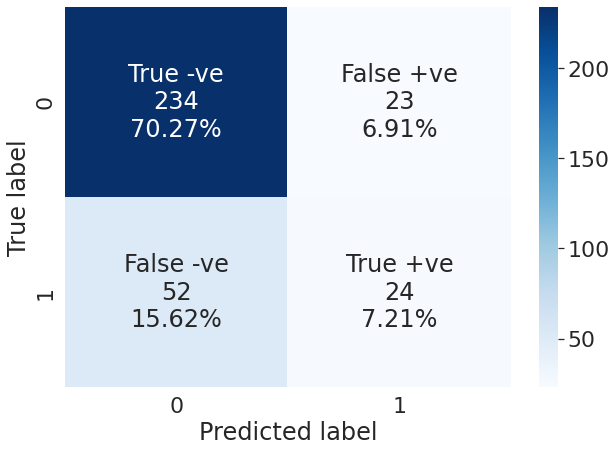

In [457]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_laptop, y_train_laptop)
y_pred = Ada_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_pred)

In [458]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5173305345074749

In [459]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5173305345074749

Text(0.5, 0, 'False Positive Rate')

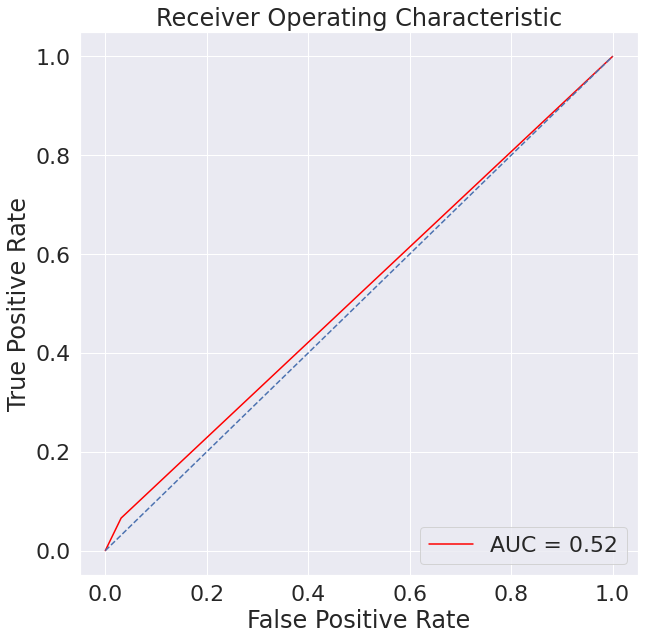

In [460]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [461]:
scores_l(Ada_boost)

Accuracy on training set :  0.8167741935483871
Accuracy on test set :  0.7747747747747747

Recall on training set :  0.425
Recall on test set :  0.3157894736842105

Precision on training set :  0.7589285714285714
Precision on test set :  0.5106382978723404

F1 on training set :  0.5448717948717948
F1 on test set :  0.39024390243902435


## Gradient Boost Classifier

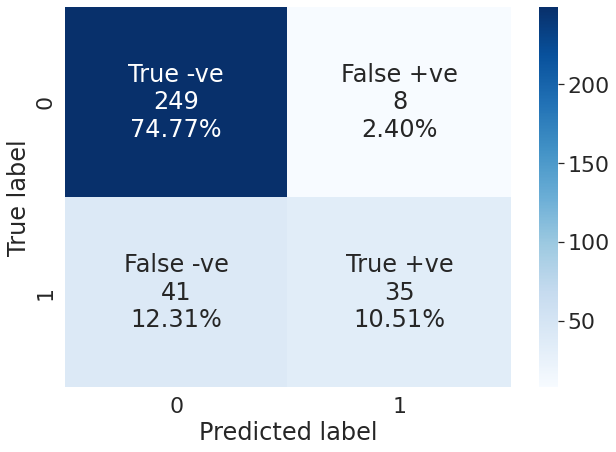

In [462]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [463]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7146989555601064

In [464]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7146989555601064

Text(0.5, 0, 'False Positive Rate')

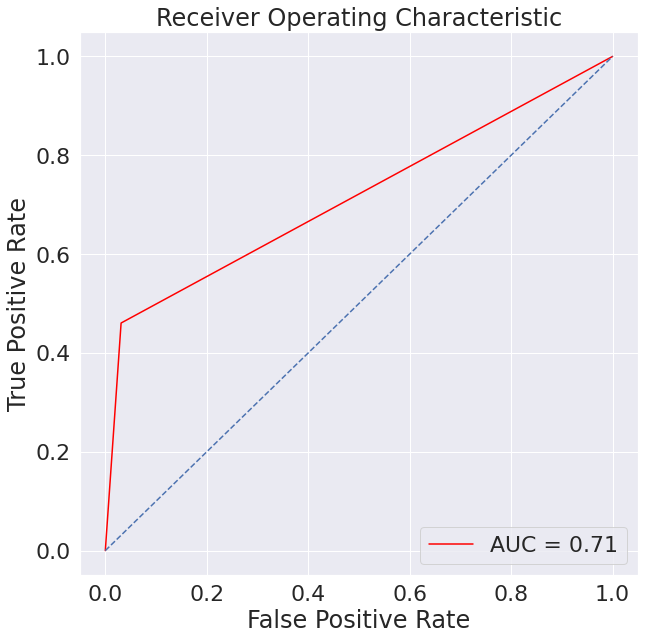

In [465]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [466]:
scores_l(Grad_boost)

Accuracy on training set :  0.9070967741935484
Accuracy on test set :  0.8528528528528528

Recall on training set :  0.675
Recall on test set :  0.4605263157894737

Precision on training set :  0.9507042253521126
Precision on test set :  0.813953488372093

F1 on training set :  0.7894736842105263
F1 on test set :  0.5882352941176471


## Gradient Boost with ADABoost classifier

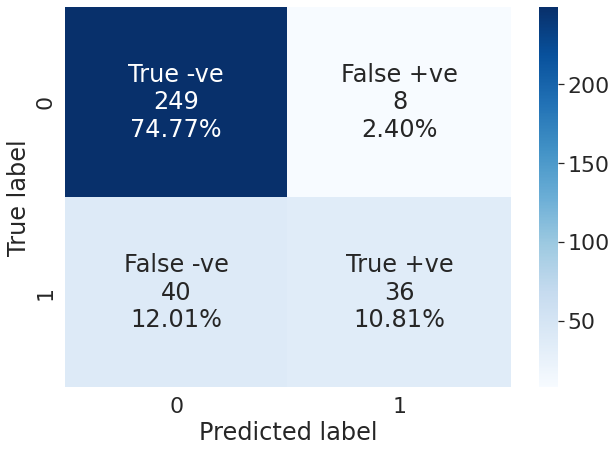

In [467]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost_ada.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [468]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7212779029285276

In [469]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7212779029285276

Text(0.5, 0, 'False Positive Rate')

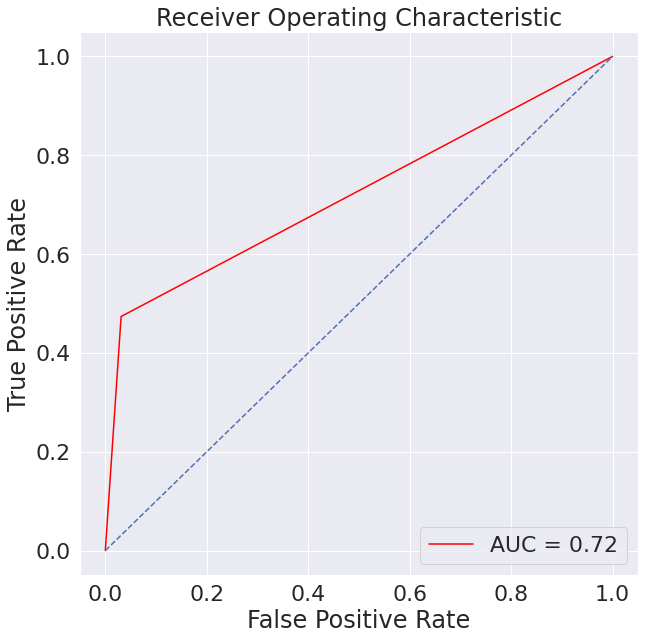

In [470]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [471]:
scores_l(Grad_boost_ada)

Accuracy on training set :  0.9135483870967742
Accuracy on test set :  0.8558558558558559

Recall on training set :  0.695
Recall on test set :  0.47368421052631576

Precision on training set :  0.9586206896551724
Precision on test set :  0.8181818181818182

F1 on training set :  0.8057971014492753
F1 on test set :  0.6


## Bagging Classifier

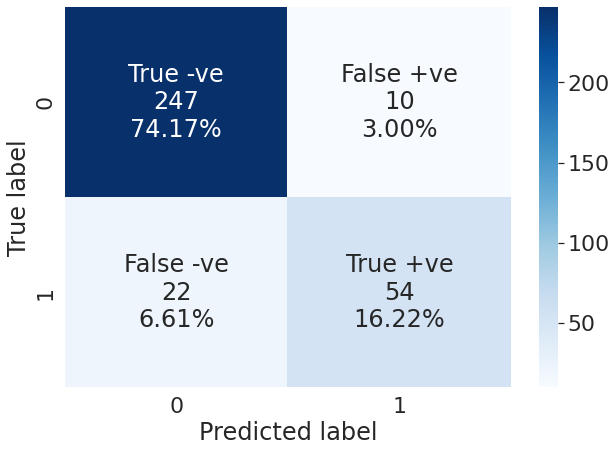

In [472]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_laptop, y_train_laptop)
y_predict = bagging.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [473]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8358079049764489

In [474]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8358079049764489

Text(0.5, 0, 'False Positive Rate')

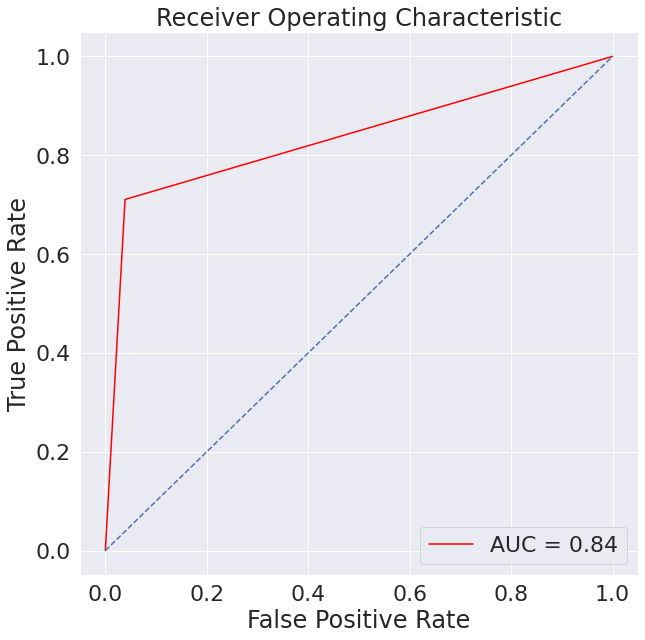

In [475]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [476]:
scores_l(bagging)

Accuracy on training set :  0.9896774193548387
Accuracy on test set :  0.9039039039039038

Recall on training set :  0.97
Recall on test set :  0.7105263157894737

Precision on training set :  0.9897959183673469
Precision on test set :  0.84375

F1 on training set :  0.9797979797979798
F1 on test set :  0.7714285714285714


### Hyperparameters for Bagging Classifier

In [477]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_laptop, y_train_laptop)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=30,
                  random_state=25)

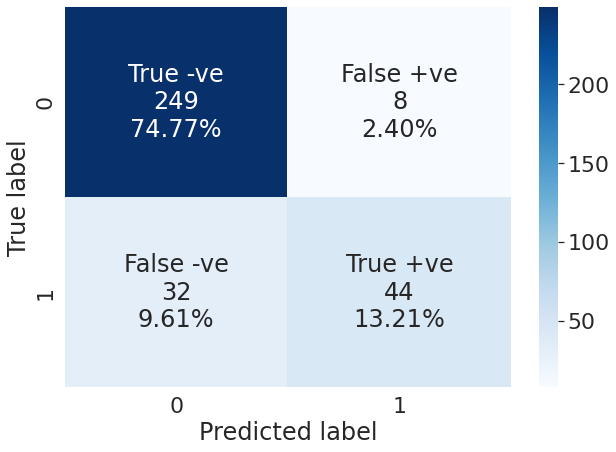

In [478]:
y_predict = bagging_estimator_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [479]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7739094818758959

In [480]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7739094818758959

Text(0.5, 0, 'False Positive Rate')

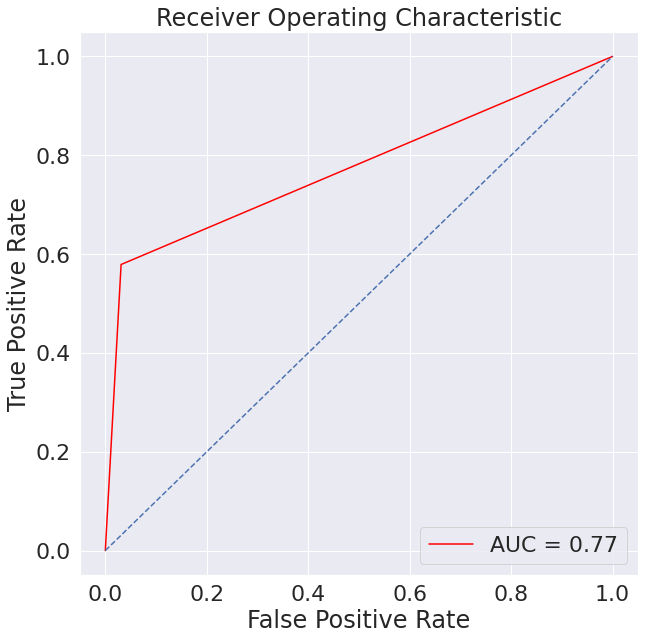

In [481]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [482]:
scores_l(bagging_estimator_tuned)

Accuracy on training set :  0.9870967741935484
Accuracy on test set :  0.8798798798798799

Recall on training set :  0.96
Recall on test set :  0.5789473684210527

Precision on training set :  0.9896907216494846
Precision on test set :  0.8461538461538461

F1 on training set :  0.9746192893401014
F1 on test set :  0.6875


## Linear Discriminant Analysis

In [483]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_laptop, y_train_laptop)

LinearDiscriminantAnalysis()

In [484]:
lda.explained_variance_ratio_

array([1.])

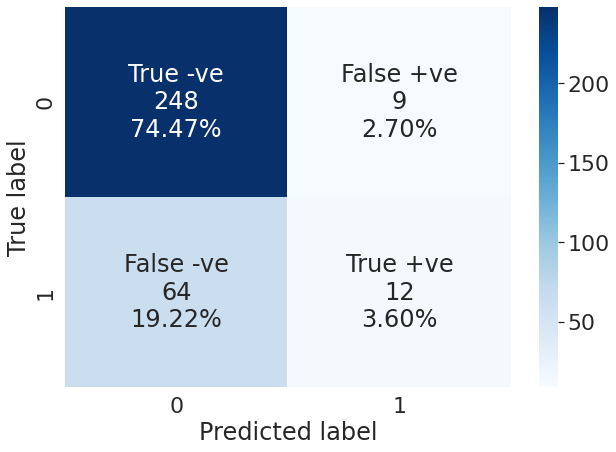

In [485]:
y_predict = lda.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [486]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5614376407945936

In [487]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5614376407945936

Text(0.5, 0, 'False Positive Rate')

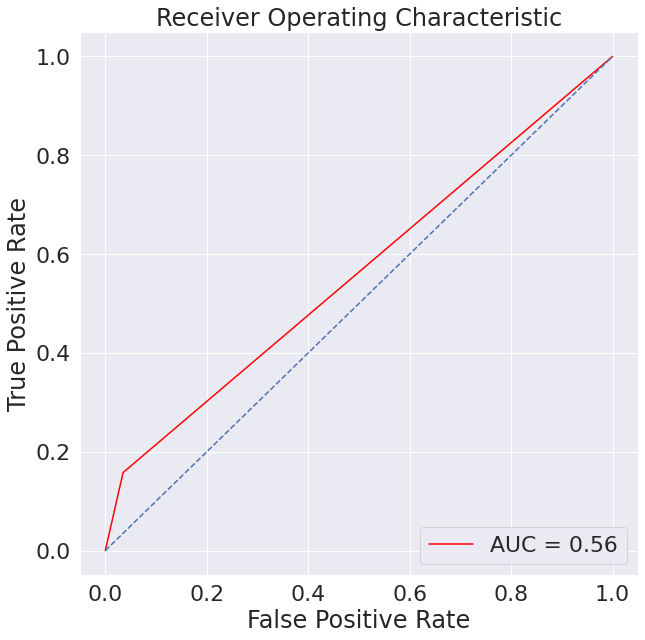

In [488]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [489]:
scores_l(lda)

Accuracy on training set :  0.7638709677419355
Accuracy on test set :  0.7807807807807807

Recall on training set :  0.175
Recall on test set :  0.15789473684210525

Precision on training set :  0.660377358490566
Precision on test set :  0.5714285714285714

F1 on training set :  0.2766798418972332
F1 on test set :  0.24742268041237112


## KNN Classifier

In [490]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_laptop, y_test_laptop) 


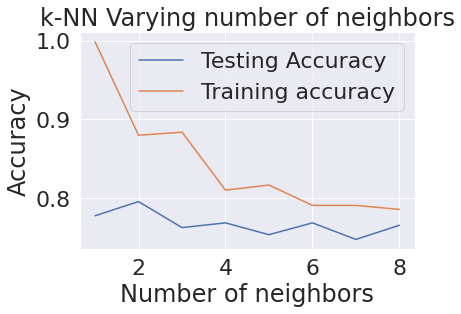

In [491]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [492]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [493]:
#Fit the model
knn.fit(X_train_laptop,y_train_laptop)

KNeighborsClassifier(n_neighbors=7)

In [494]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_laptop,y_test_laptop)

0.7477477477477478

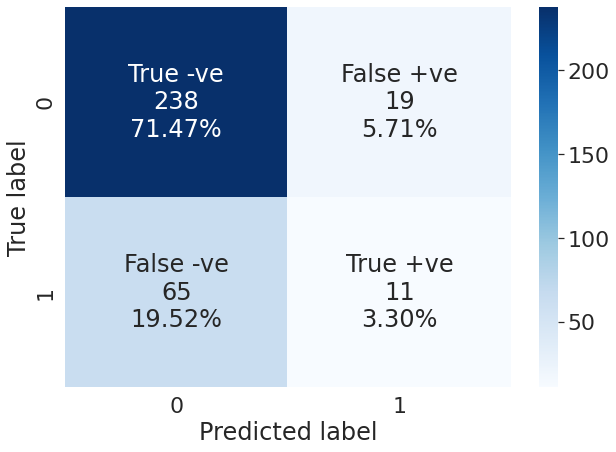

In [495]:
y_predict = knn.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [496]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5354034405078846

In [497]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5354034405078846

Text(0.5, 0, 'False Positive Rate')

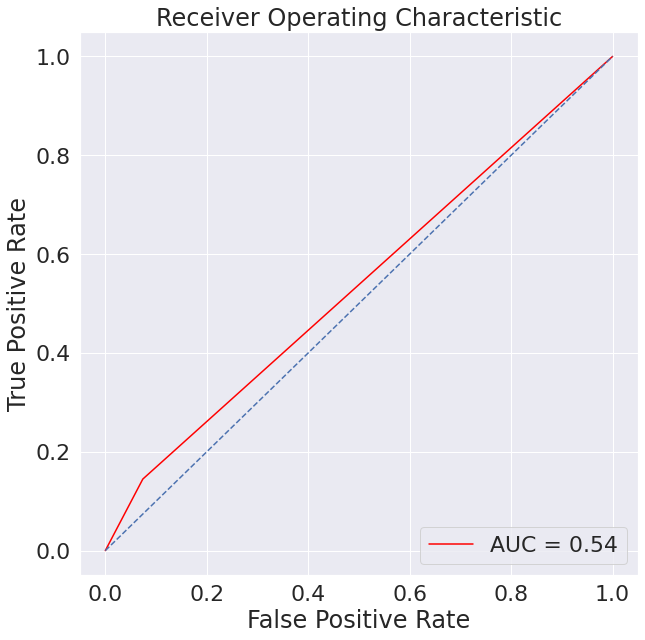

In [498]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [499]:
scores_l(knn)

Accuracy on training set :  0.7909677419354839
Accuracy on test set :  0.7477477477477478

Recall on training set :  0.315
Recall on test set :  0.14473684210526316

Precision on training set :  0.7159090909090909
Precision on test set :  0.36666666666666664

F1 on training set :  0.4375
F1 on test set :  0.2075471698113208


## Naive Bayes Classifier

In [500]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_laptop, y_train_laptop)

GaussianNB()

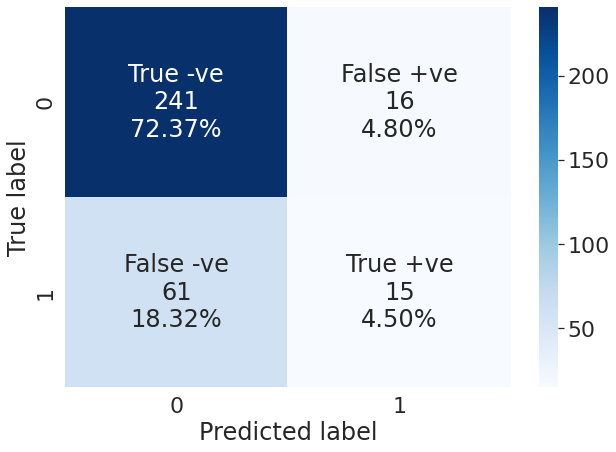

In [501]:
y_predict = gnb.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [502]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5675558058570551

In [503]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5675558058570551

Text(0.5, 0, 'False Positive Rate')

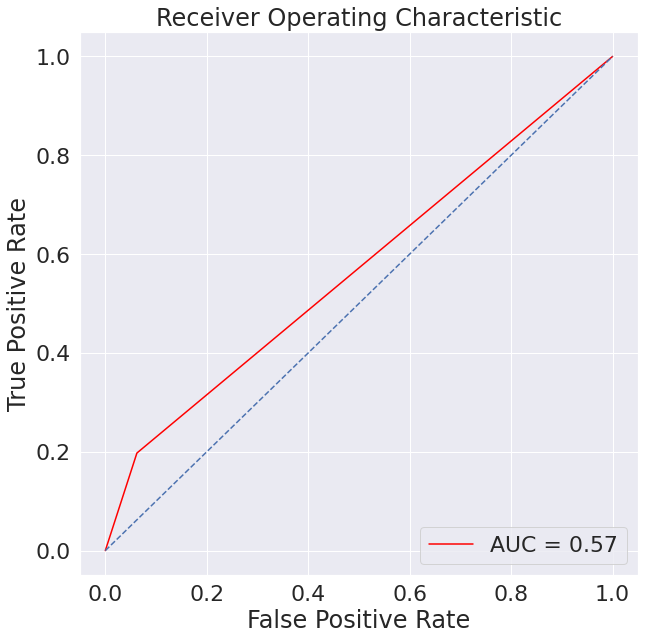

In [504]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [505]:
scores_l(gnb)

Accuracy on training set :  0.76
Accuracy on test set :  0.7687687687687688

Recall on training set :  0.22
Recall on test set :  0.19736842105263158

Precision on training set :  0.5945945945945946
Precision on test set :  0.4838709677419355

F1 on training set :  0.32116788321167883
F1 on test set :  0.2803738317757009


In [507]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores_l(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [508]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  ...  Train_F1-Score  Test_F1-Score
2                Random Forest        0.998710  ...        0.997494       0.800000
9                      Bagging        0.989677  ...        0.979798       0.771429
0                Decision Tree        0.998710  ...        0.997494       0.693333
10     Bagging estimator tuned        0.987097  ...        0.974619       0.687500
8       Gradient and Ada Boost        0.913548  ...        0.805797       0.600000
7               Gradient boost        0.907097  ...        0.789474       0.588235
4     Tuned XGBoost Classifier        0.916129  ...        0.819945       0.580153
3           XGBoost Classifier        0.880000  ...        0.713846       0.542373
1          Tuned Decision Tree        0.587097  ...        0.541547       0.444444
6                    Ada boost        0.816774  ...        0.544872       0.390244
13      Naive Bayes Classifier        0.760000  ...        0.321168       0.280374
11  Linear Discrimant Analysis        0.763871  ...        0.276680       0.247423
12                         KNN        0.790968  ...        0.437500       0.207547
5          Logistic Regression        0.763871  ...        0.234310       0.112360

[14 rows x 5 columns]

In [509]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Train_Accuracy  ...  Train_F1-Score  Test_F1-Score
2                Random Forest        0.998710  ...        0.997494       0.800000
9                      Bagging        0.989677  ...        0.979798       0.771429
10     Bagging estimator tuned        0.987097  ...        0.974619       0.687500
0                Decision Tree        0.998710  ...        0.997494       0.693333
8       Gradient and Ada Boost        0.913548  ...        0.805797       0.600000
7               Gradient boost        0.907097  ...        0.789474       0.588235
3           XGBoost Classifier        0.880000  ...        0.713846       0.542373
4     Tuned XGBoost Classifier        0.916129  ...        0.819945       0.580153
11  Linear Discrimant Analysis        0.763871  ...        0.276680       0.247423
6                    Ada boost        0.816774  ...        0.544872       0.390244
13      Naive Bayes Classifier        0.760000  ...        0.321168       0.280374
5          Logistic Regression        0.763871  ...        0.234310       0.112360
12                         KNN        0.790968  ...        0.437500       0.207547
1          Tuned Decision Tree        0.587097  ...        0.541547       0.444444

[14 rows x 5 columns]